## Import the dataset

In [6]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
import os
sns.set(color_codes=True)  

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [8]:
os.chdir(r'C:\Users\User\Desktop\Credit Risk Analysis\Credit Risk Analysis file')
application_train = pd.read_csv('application_data.csv')


# Task 1 - Exploring the Data

In [9]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [10]:
application_train.shape

(307511, 122)

In [11]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
application_train.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [14]:
application_train.iloc[:,100:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_DOCUMENT_6             307511 non-null  int64  
 1   FLAG_DOCUMENT_7             307511 non-null  int64  
 2   FLAG_DOCUMENT_8             307511 non-null  int64  
 3   FLAG_DOCUMENT_9             307511 non-null  int64  
 4   FLAG_DOCUMENT_10            307511 non-null  int64  
 5   FLAG_DOCUMENT_11            307511 non-null  int64  
 6   FLAG_DOCUMENT_12            307511 non-null  int64  
 7   FLAG_DOCUMENT_13            307511 non-null  int64  
 8   FLAG_DOCUMENT_14            307511 non-null  int64  
 9   FLAG_DOCUMENT_15            307511 non-null  int64  
 10  FLAG_DOCUMENT_16            307511 non-null  int64  
 11  FLAG_DOCUMENT_17            307511 non-null  int64  
 12  FLAG_DOCUMENT_18            307511 non-null  int64  
 13  FLAG_DOCUMENT_

# Task 2 - Missing Values Analysis

### Calculating the Percentage of Missing values

In [15]:

train_missing = application_train.count() / len(application_train)
train_missing = (1 - train_missing) * 100
train_missing.sort_values(ascending=False).head(60)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

## Missing value treatment

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns.

## Removing the Columns with more the 50% missing values

In [16]:
train = application_train.loc[:, train_missing < 50]

In [17]:
train_missing_2 = train.count() / len(train)

train_missing_2 = (1 - train_missing_2) * 100

train_missing_2[train_missing_2 > 0].sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [18]:
# OCCUPATION_TYPE                 31.345545
# EXT_SOURCE_3                    19.825307
# AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
# AMT_REQ_CREDIT_BUREAU_QRT       13.501631
# AMT_REQ_CREDIT_BUREAU_MON       13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
# AMT_REQ_CREDIT_BUREAU_DAY       13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
# NAME_TYPE_SUITE                  0.420148
# DEF_30_CNT_SOCIAL_CIRCLE         0.332021
# OBS_60_CNT_SOCIAL_CIRCLE         0.332021
# DEF_60_CNT_SOCIAL_CIRCLE         0.332021
# OBS_30_CNT_SOCIAL_CIRCLE         0.332021
# EXT_SOURCE_2                     0.214626
# AMT_GOODS_PRICE                  0.090403
# AMT_ANNUITY                      0.003902
# CNT_FAM_MEMBERS                  0.000650
# DAYS_LAST_PHONE_CHANGE           0.000325

Let's analylize these columns one by one

Column: DAYS_BIRTH

This column represents the client's age in days relative to the application date, displayed as negative values. For clarity and ease of understanding, we are converting these values into years. We use the -round() function to transform the negative values into positive ones. We plan to apply the same transformation method to other date-related data.

In [19]:
train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [20]:
train['DAYS_BIRTH'] = -round(train['DAYS_BIRTH'] / 365, 0)
train['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [21]:
train['DAYS_REGISTRATION'] = -round(train['DAYS_REGISTRATION'] / 365, 0)
train['DAYS_REGISTRATION'].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [22]:
train['DAYS_ID_PUBLISH'] = -round(train['DAYS_ID_PUBLISH'] / 365, 0)
train['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [23]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

Calculating the ratio


In [24]:
(train['TARGET'] == 0).sum() / (train['TARGET'] == 1).sum()

np.float64(11.387150050352467)

Too much data imbalance

# Task 3 - Analysing Categorical and Numerical data.


### Analysing categorical data
Since due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists.

In [25]:

train_0 = train.loc[train['TARGET'] == 0]

train_1 = train.loc[train['TARGET'] == 1]

We utilized three distinct plots for analysis:

**Pie plot**:
- This displays all the values present in a column as percentages, where the sum of these percentages equals 100.

**Countplot**:
- Here, we depicted the count of different categories. Consequently, Target=0 will typically have a higher count than Target=1.

**Barplot**:
- To create this plot, we initially divided the dataset into two subsets based on the target variable: Target=0 and Target=1. Next, we further subdivided each subset into different categories. We then plotted these categories as percentages. Notably, you'll observe that the values for Target=0 and Target=1 are mostly equal. For a deeper understanding, please refer to the code of this plot.

In [26]:
def plotting(train, train0, train1, column):
   

    
    train = train
    train_0 = train0
    train_1 = train1
    col = column


    fig = plt.figure(figsize=(13,10))


    ax1 = plt.subplot(221)

    train[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: ' + column)

 
    ax2 = plt.subplot(222)

    sns.countplot(x=column, hue='TARGET', data=train, ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    ax3 = plt.subplot(223)

    df = pd.DataFrame()
    df['0'] = ((train_0[col].value_counts())/len(train_0))
    df['1'] = ((train_1[col].value_counts())/len(train_1))

    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout()


    plt.show()

In [27]:
train_categorical = train.select_dtypes(include=['object']).columns

In [28]:
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

# Task 4 - Univariate Analysis of the Categorical data

**Visualising Data Distribution**

Take, for instance, the column "NAME_CONTRACT_TYPE". The visualisations produced offer insightful data distributions:

Pie Chart (First Plot):

- It reveals that 90% of the entries are 'Cash loans', while the remaining 10% are 'Revolving loans'. This chart provides a straightforward view of the overall category proportions within the column.

Count Plot (Second Plot):

- This visualization differentiates between 'Cash loans' and 'Revolving loans' based on the TARGET variable. For TARGET=0 (no default), there are approximately 250,000 'Cash loans' and around 2,500 'Revolving loans'. The plot offers a similar breakdown for TARGET=1 (default), enabling a comparison of counts between the two TARGET categories.

Percentage Bar Plot (Third Plot):

- In this plot, the data is presented in terms of percentage, focusing on the relative distribution within each TARGET category. The 'Cash loans' and 'Revolving loans' are stacked (in blue for TARGET=0 and orange for TARGET=1), with the sum of the percentages for each loan type within a TARGET category equating to 100%. This plot emphasizes the proportionate representation of each loan type within the groups defined by the TARGET variable.

Plotting  NAME_CONTRACT_TYPE


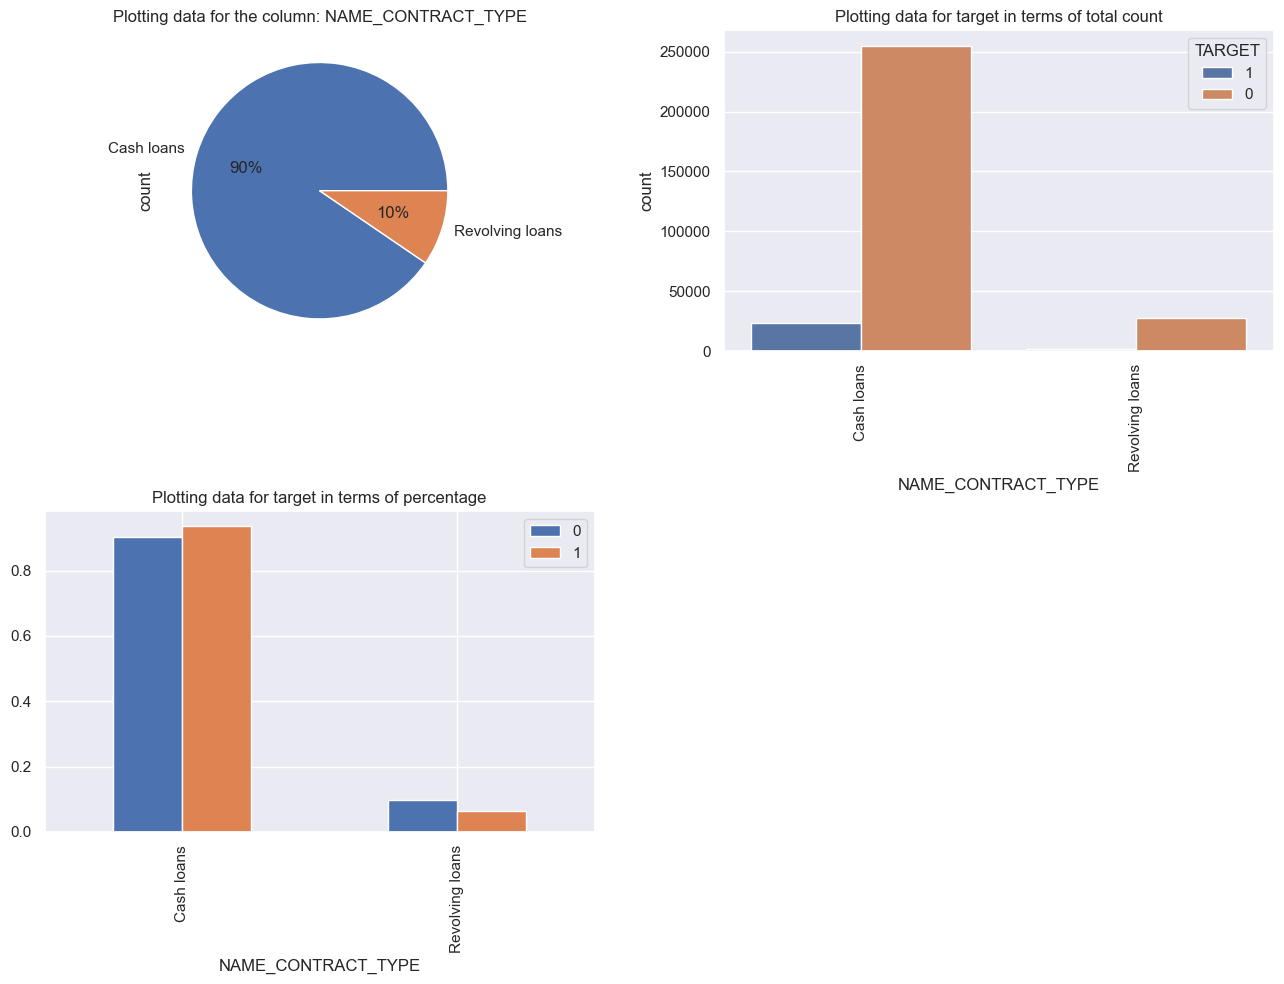

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


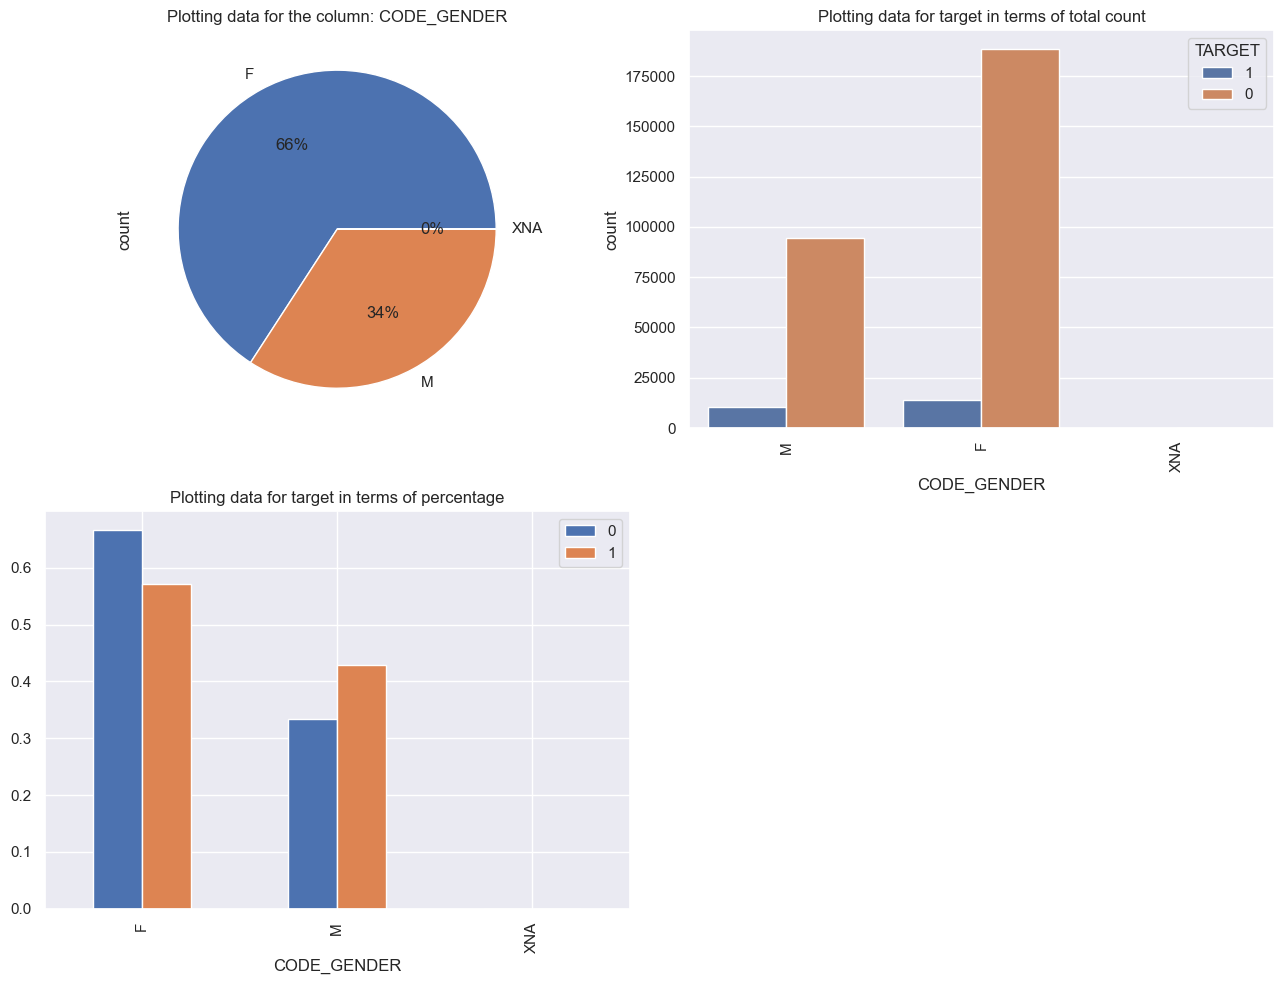

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


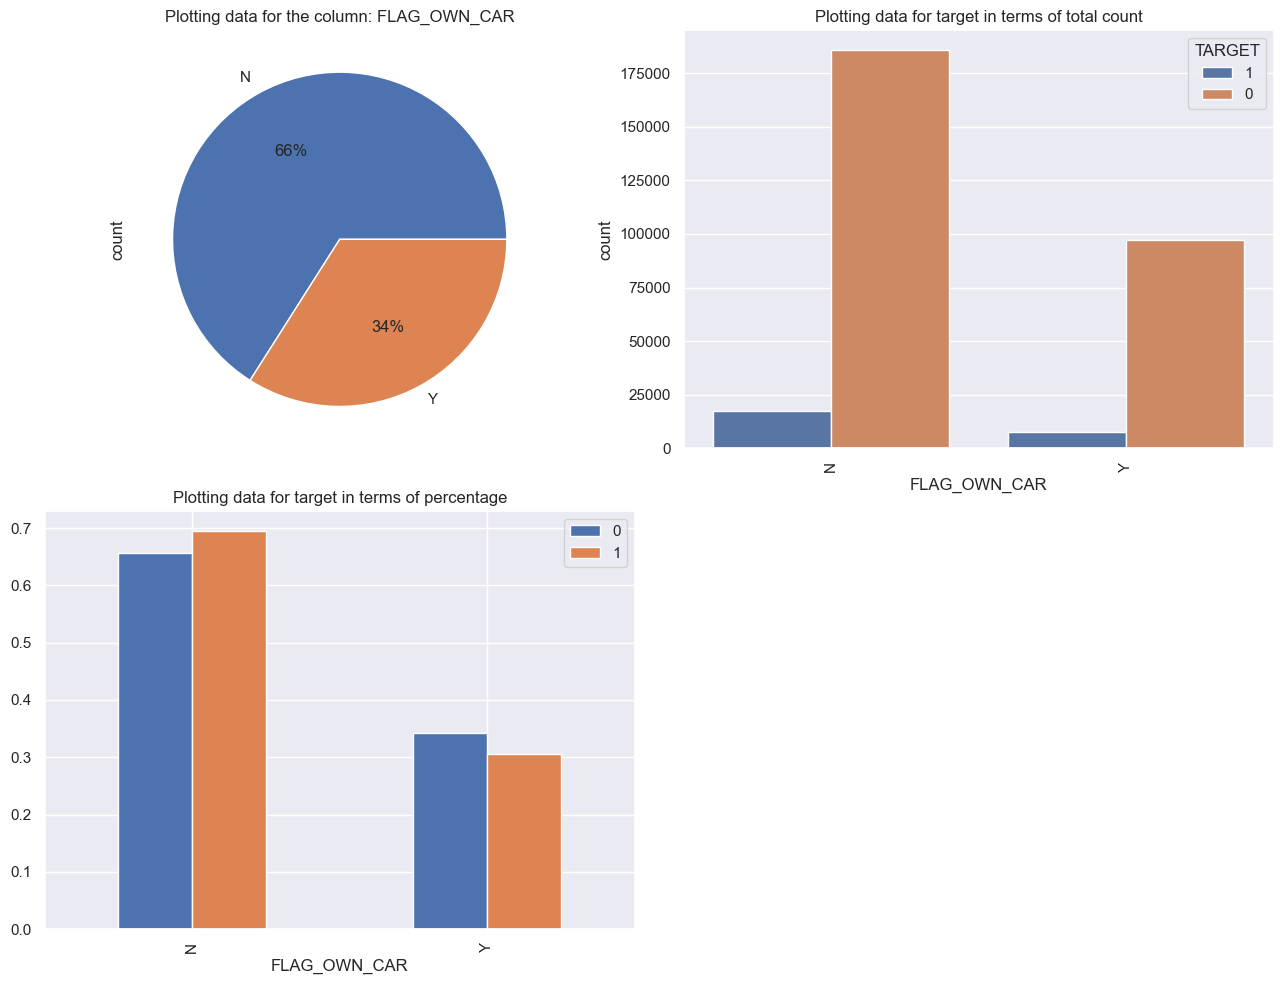

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


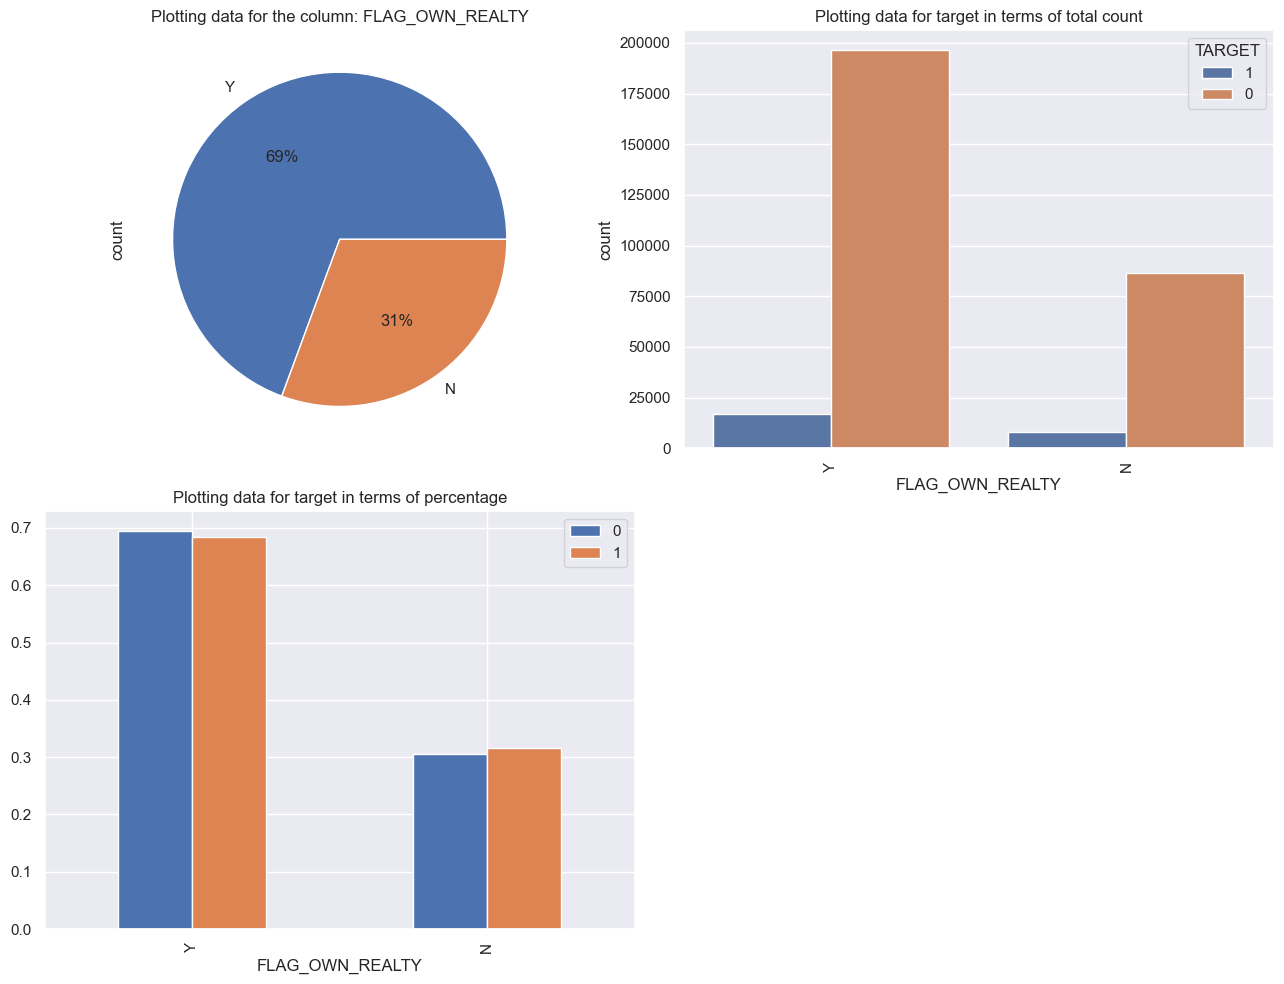

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


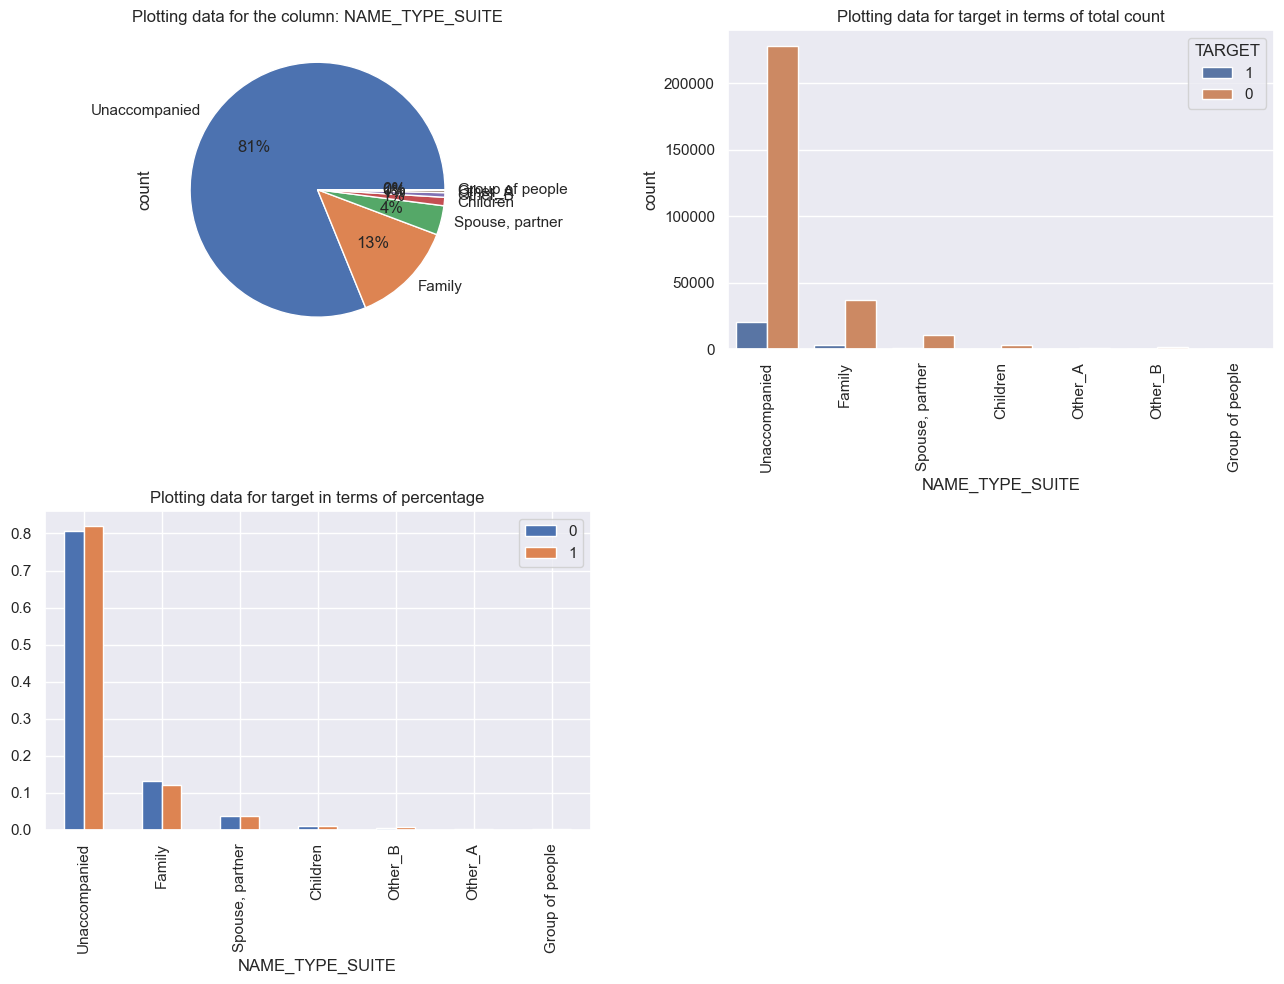

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


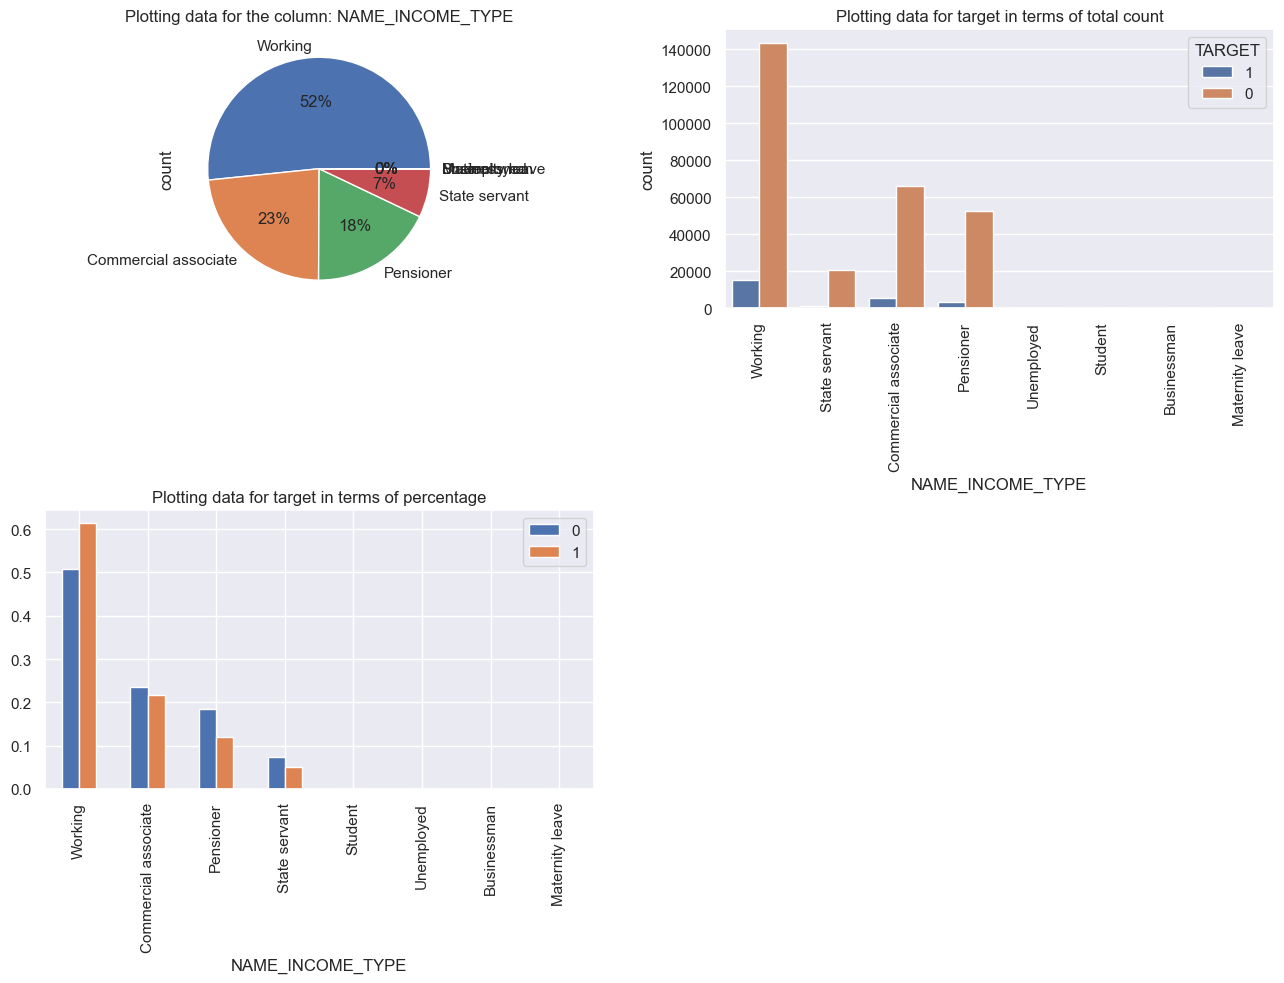

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


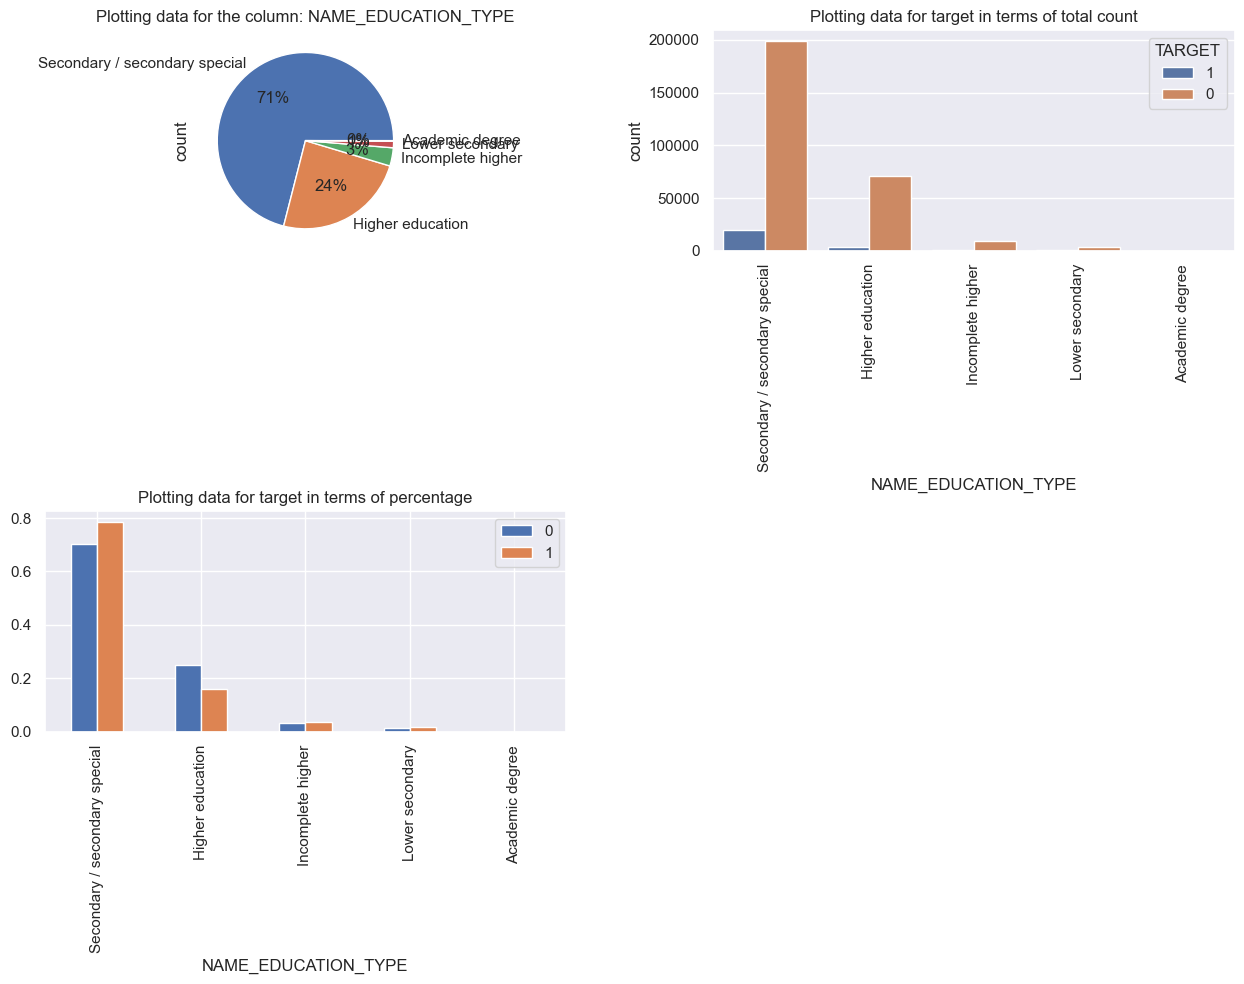

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


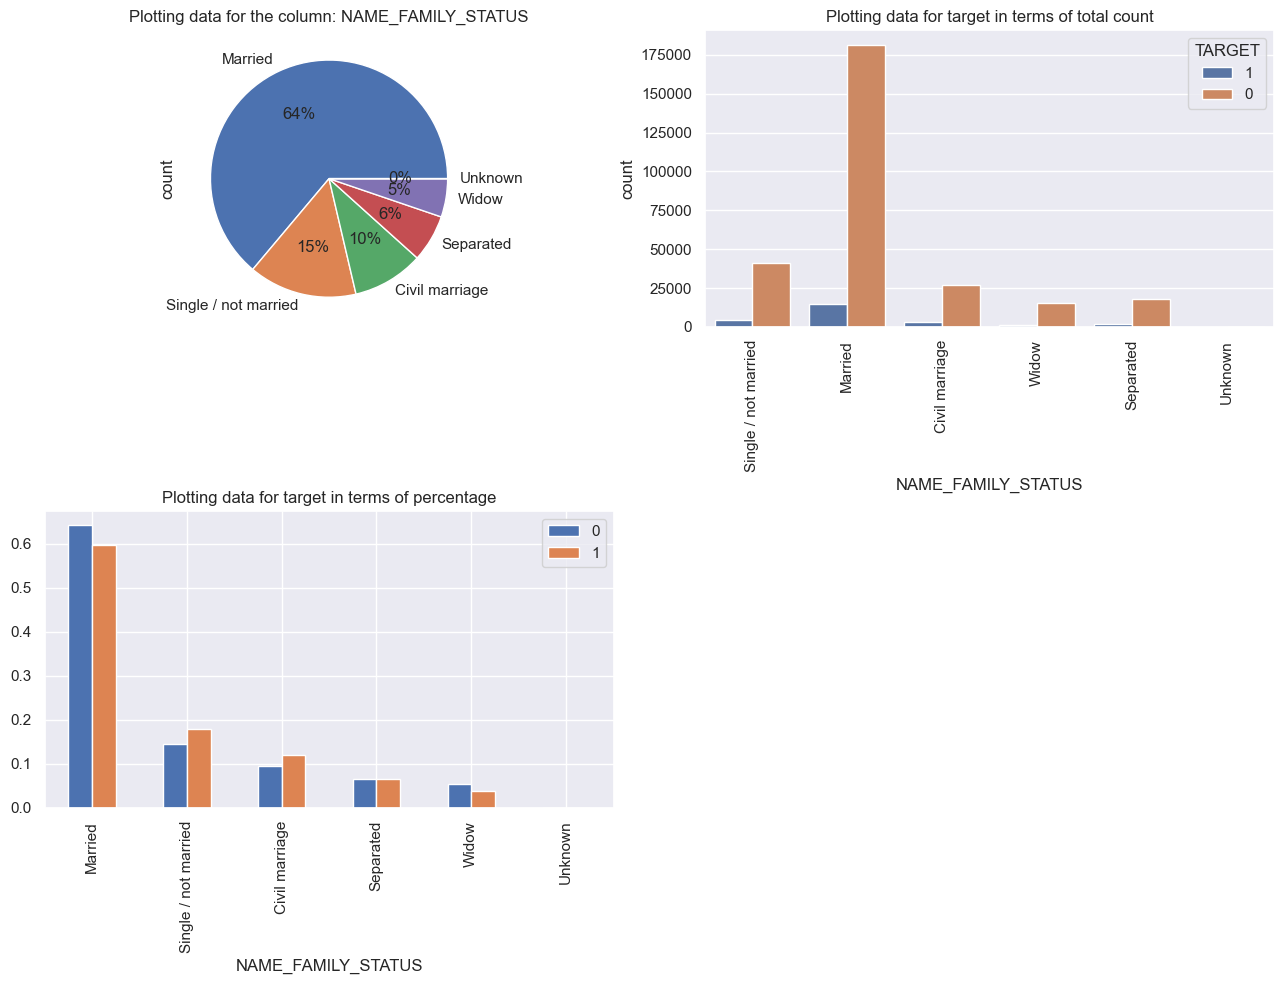

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


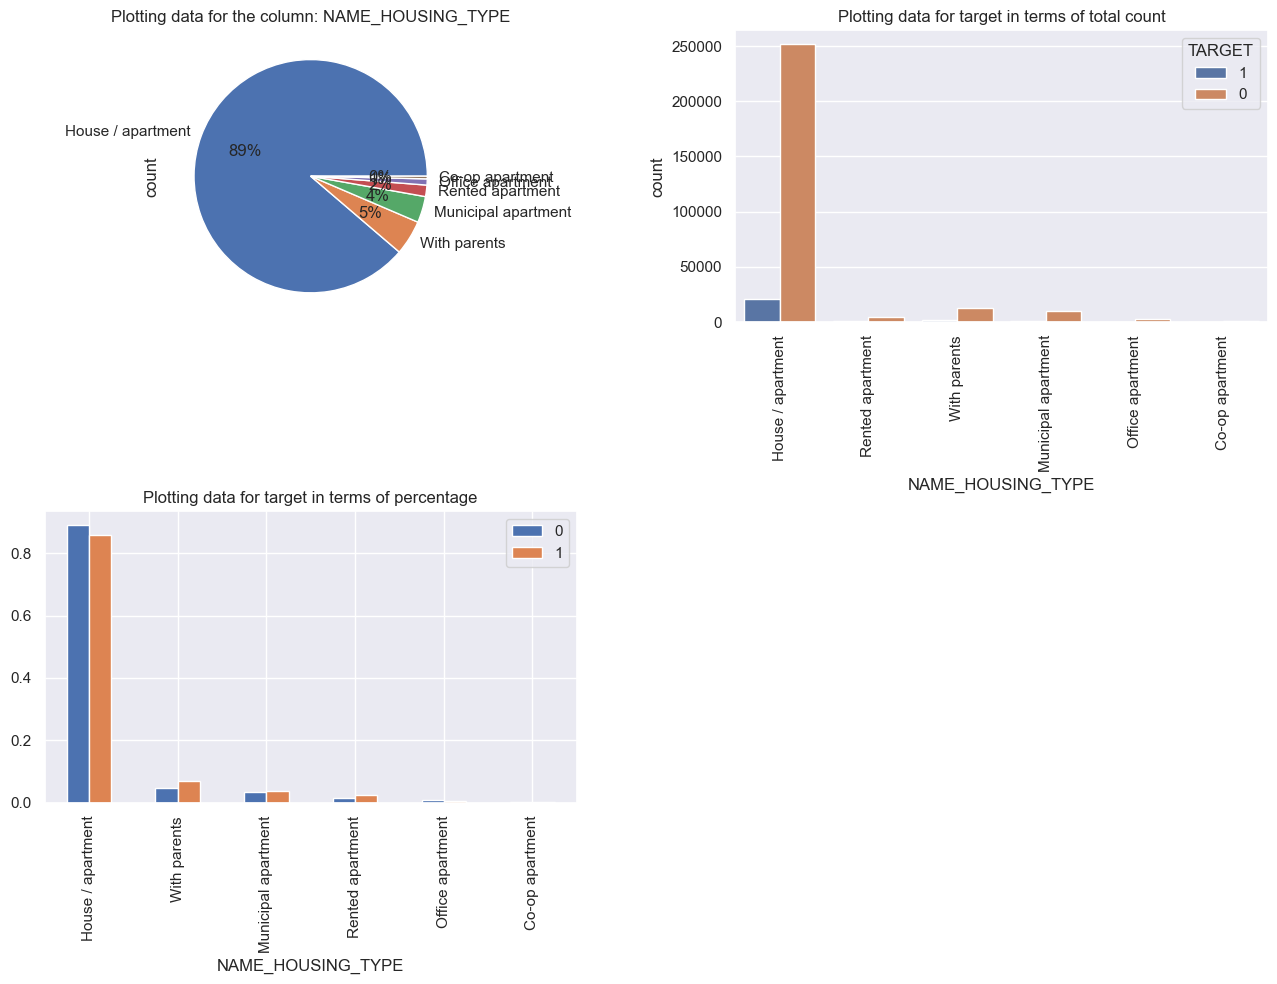

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


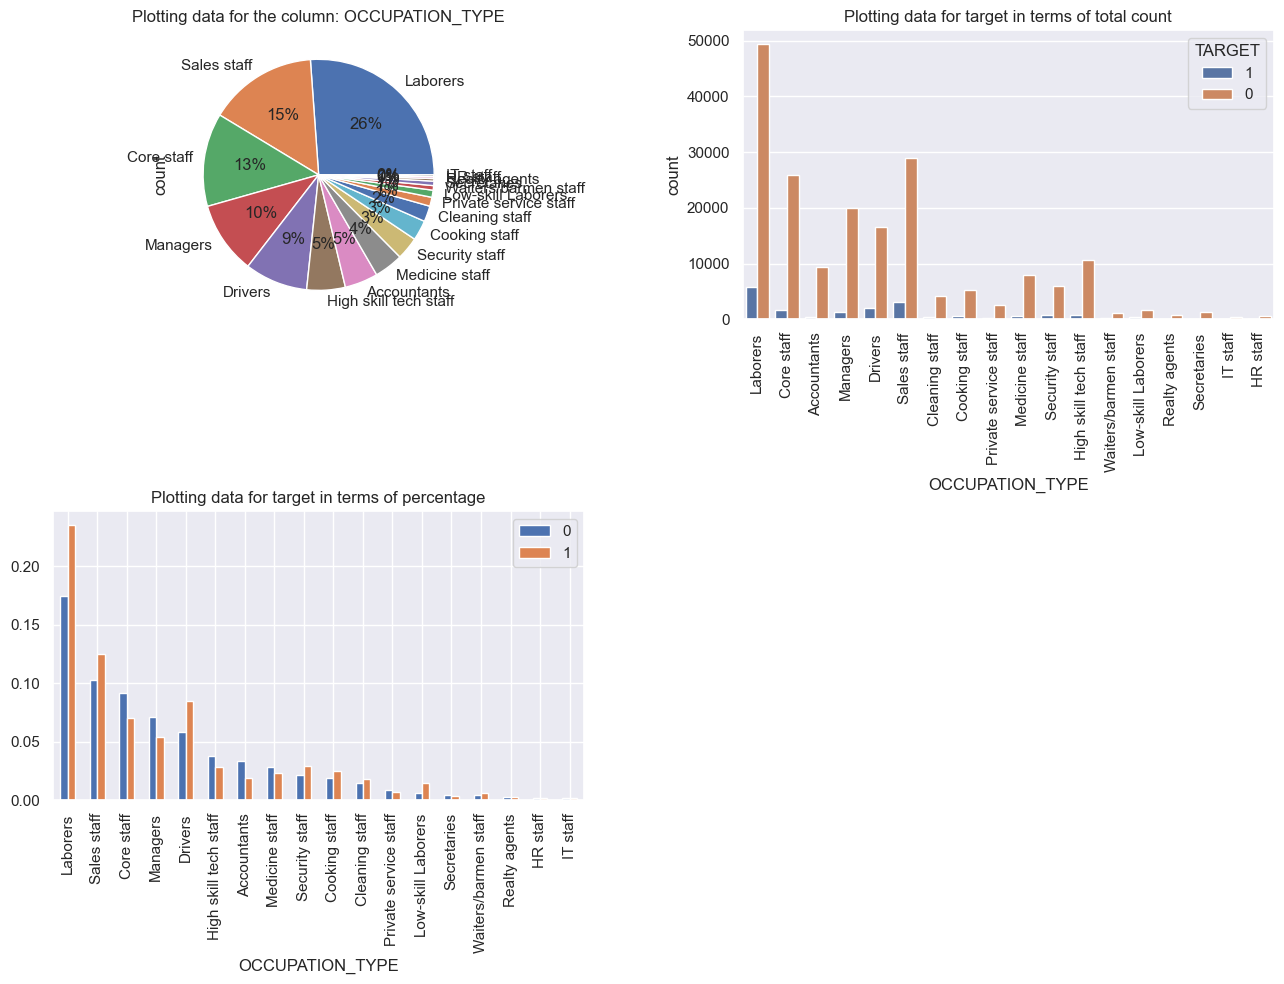

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


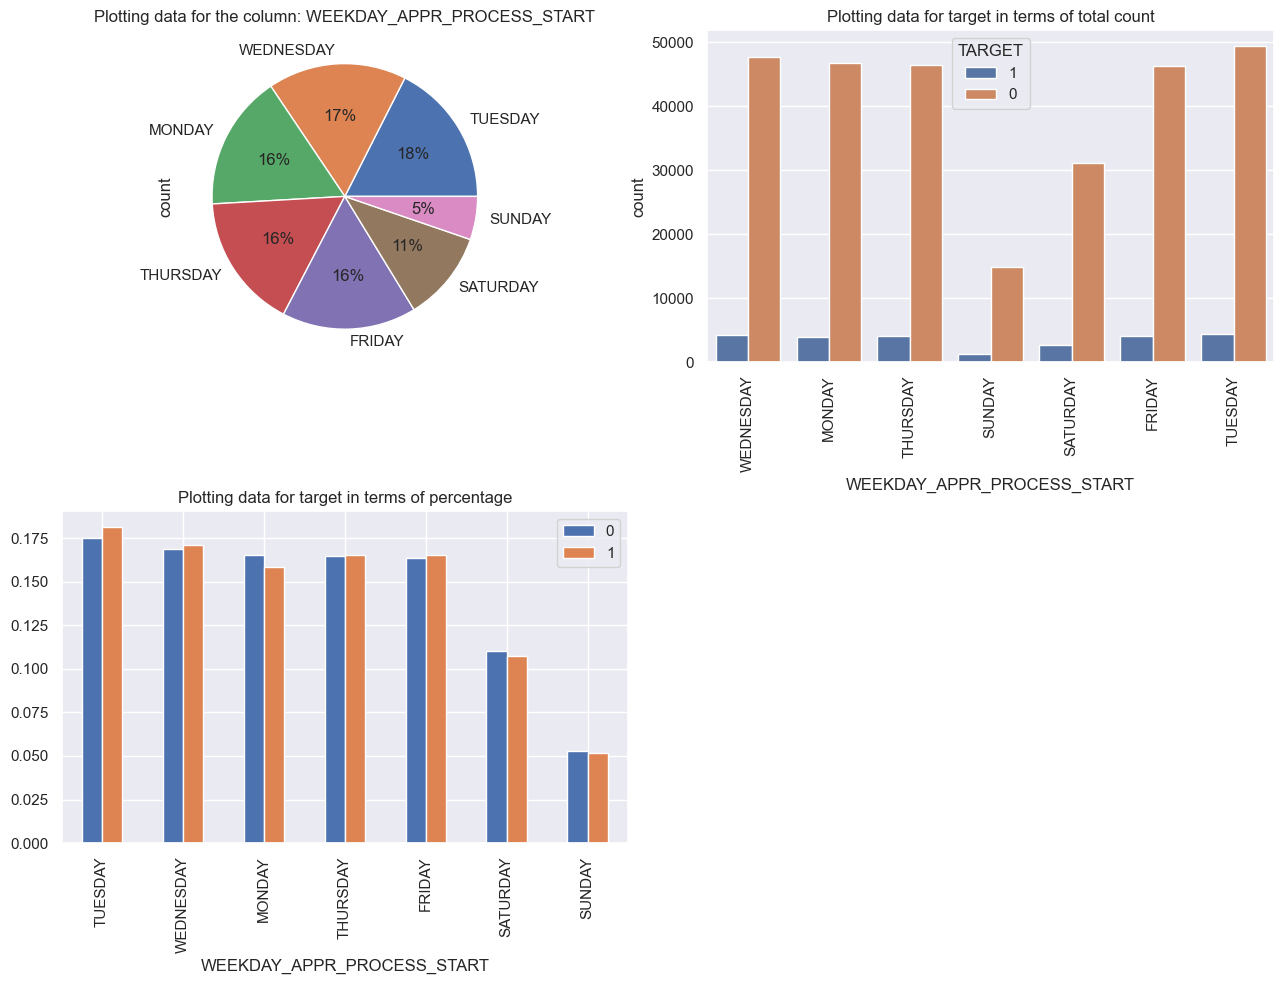

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


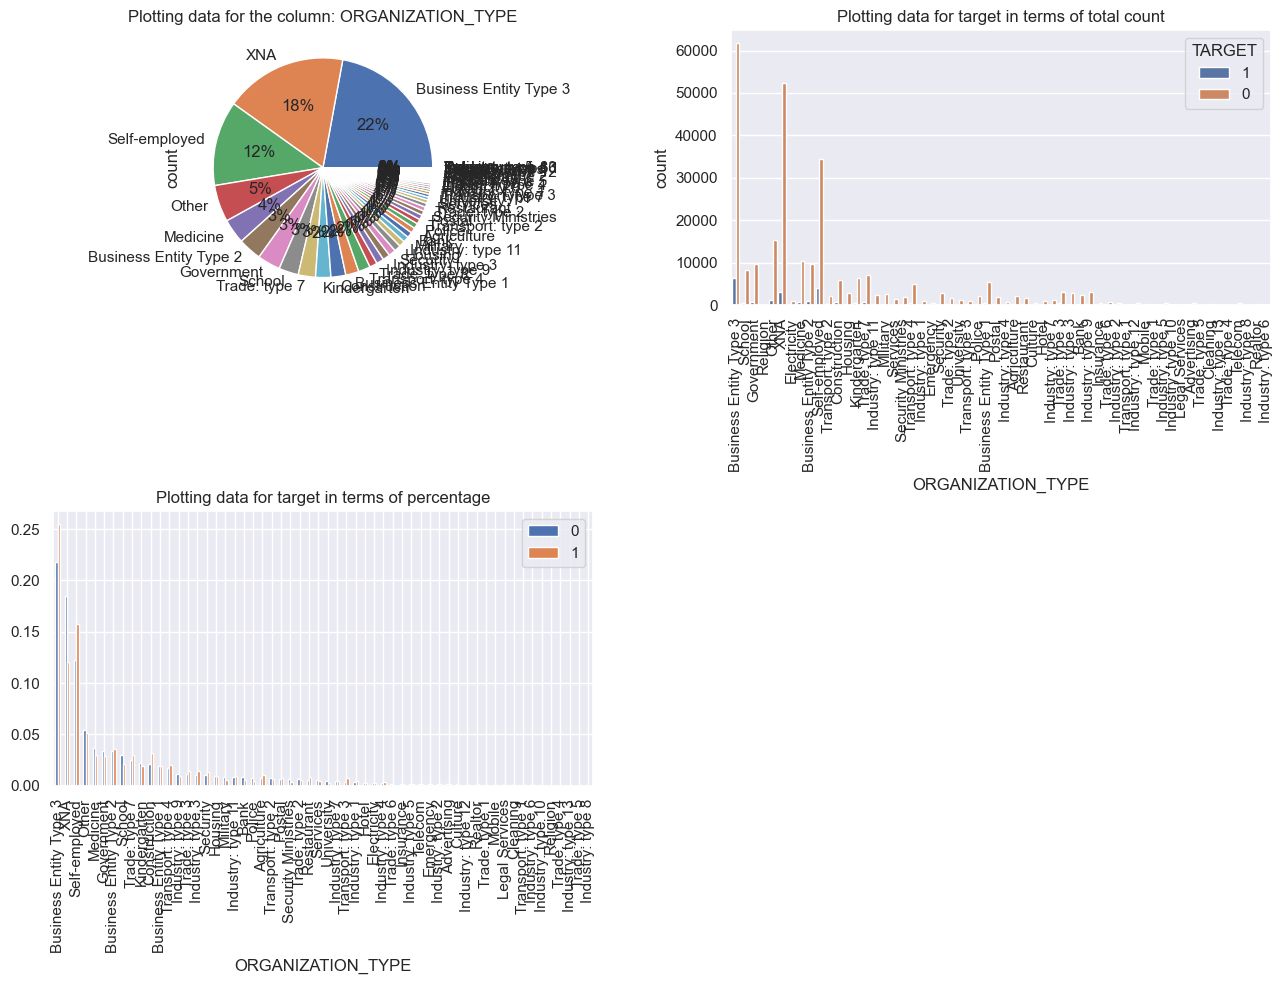

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


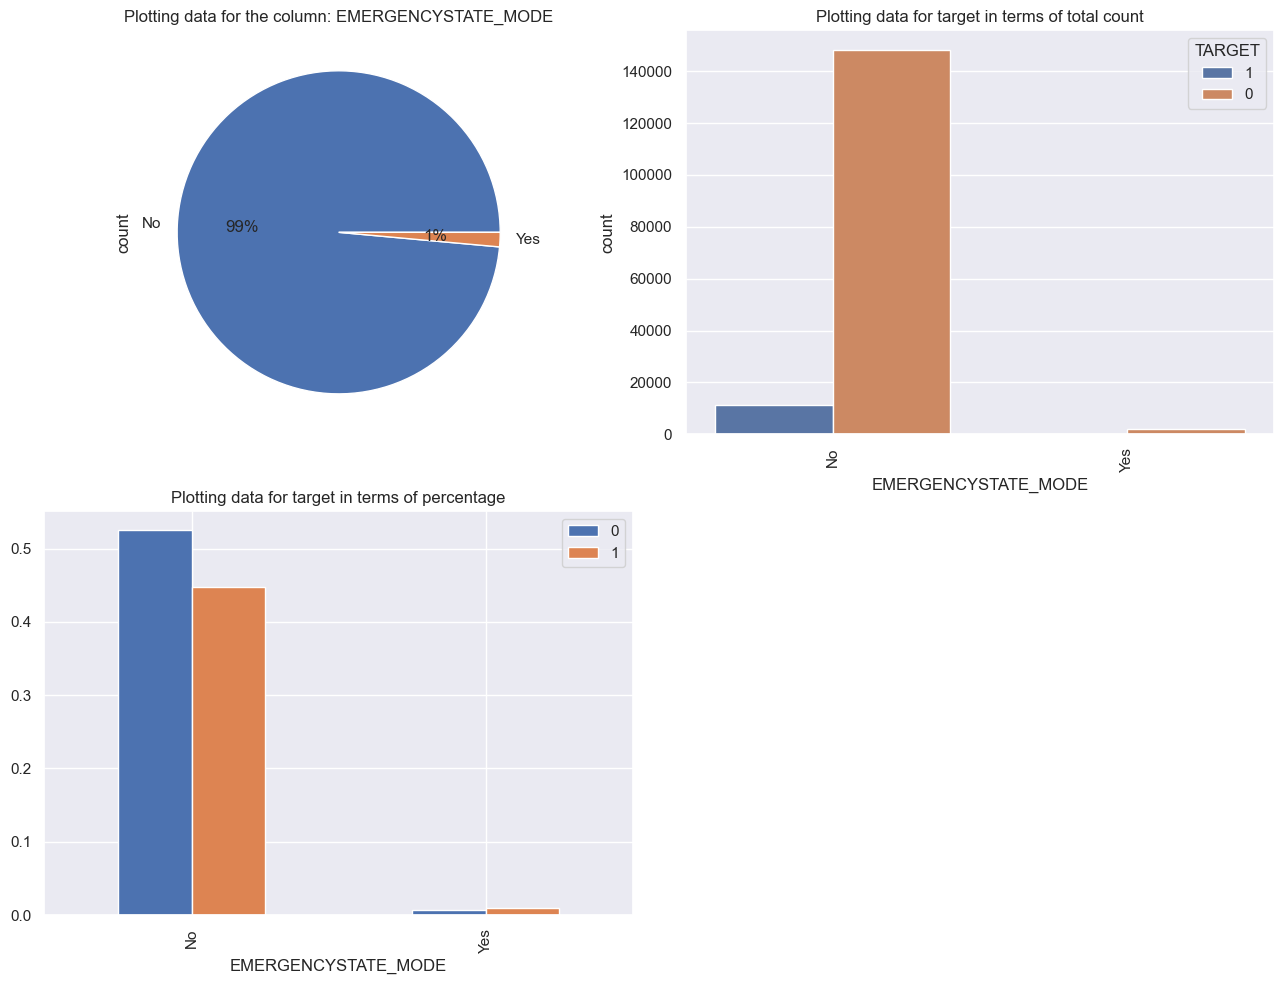

----------------------------------------------------------------------------------------------


In [29]:

train['TARGET'] = train['TARGET'].astype(str)

train['NAME_CONTRACT_TYPE'] = train['NAME_CONTRACT_TYPE'].astype('category')


for column in train_categorical:

    print("Plotting ", column)


    plotting(train, train_0, train_1, column)

    print('----------------------------------------------------------------------------------------------')


The analysis identifies several key variables that significantly influence loan behavior and default rates:

CODE_GENDER:
- Although loans are less frequently taken by males, the data indicates that the proportion of male defaulters is notably higher compared to females. This suggests gender as a potential factor in assessing loan risk.

NAME_INCOME_TYPE:
- Pensioners show a lower default rate, implying that despite a potentially fixed or lower income, they maintain a higher reliability in repaying loans.

NAME_EDUCATION_TYPE:
- Loans are predominantly sought for secondary education, followed by higher education. However, the default rate among borrowers with secondary education is substantially higher than those with higher education credentials. This points to education level as a significant determinant of loan repayment capacity.

NAME_FAMILY_STATUS:
- Married individuals are the most common applicants for loans and tend to have lower default rates. In contrast, singles and those in civil marriages exhibit higher default rates, highlighting the influence of marital status on loan repayment behavior.

OCCUPATION_TYPE:
- Laborers and various staff categories are the most frequent loan applicants, yet managers and high-skilled tech staff prove to be the most reliable in terms of repayment. This underscores the role of occupation type in predicting loan default risk.

Analysing Numerical columns through box plot.

In [30]:
train_categorical = train.select_dtypes(include=['int64', 'float64']).columns

# Task 5 - Analysis for the outliers

Potting the numerial data based on the index and analysing if there are outliers in any of the column.

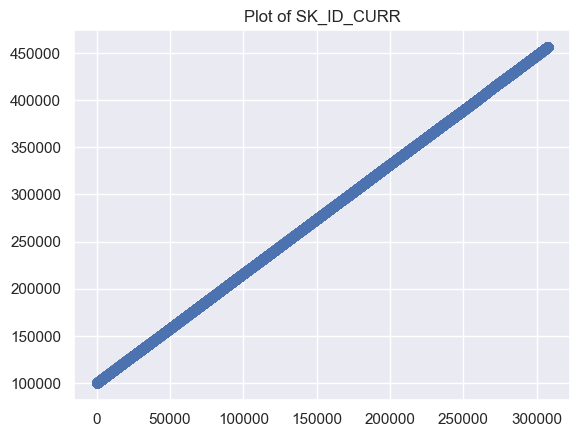

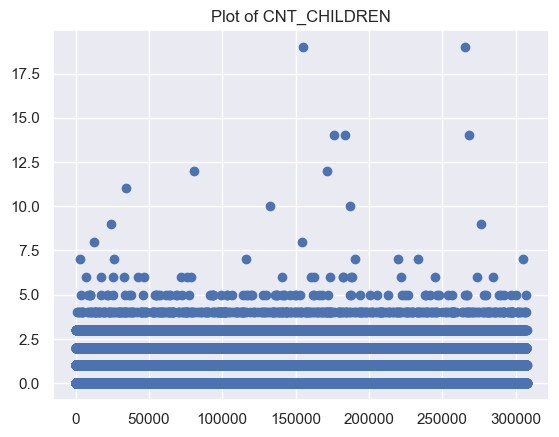

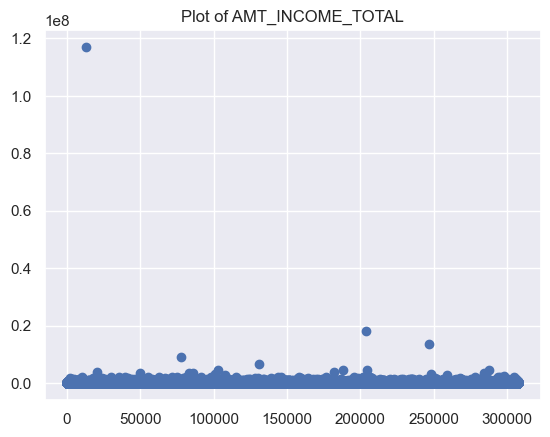

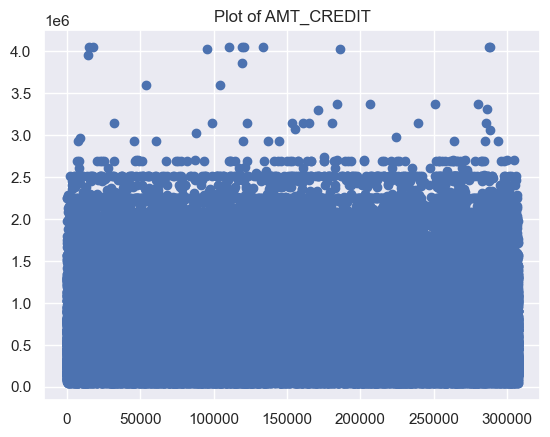

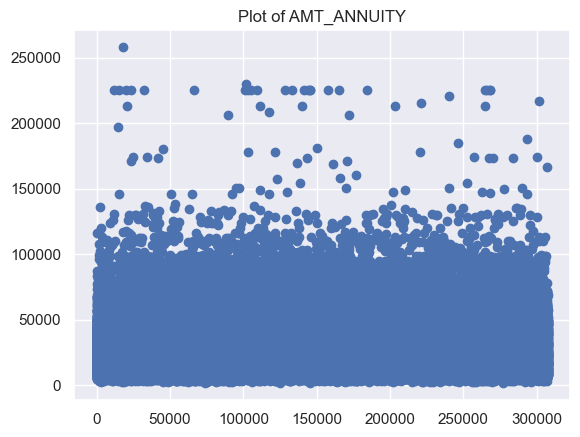

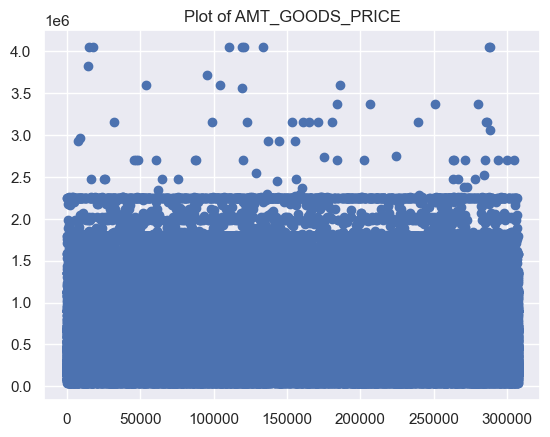

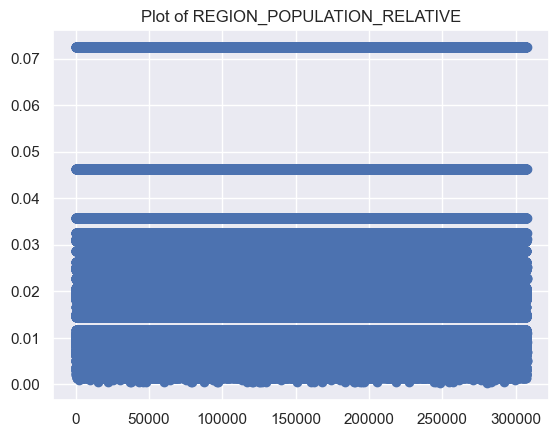

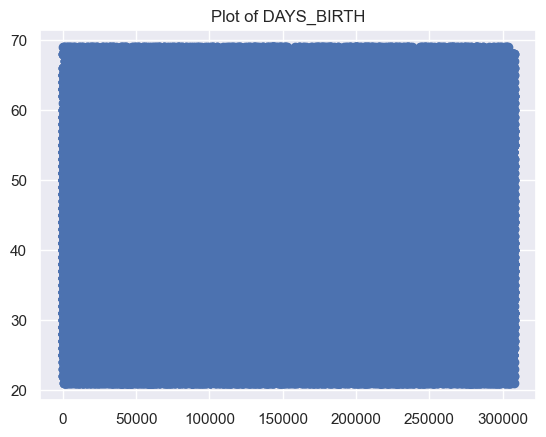

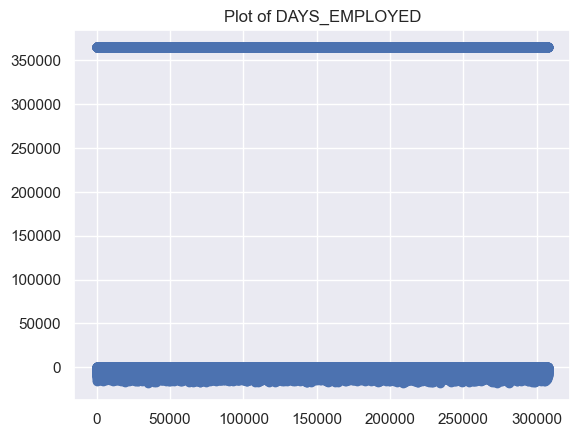

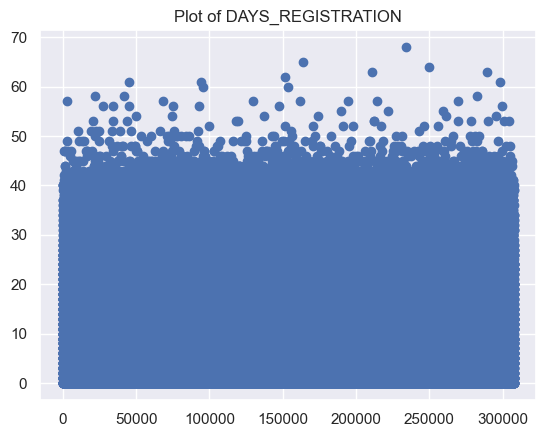

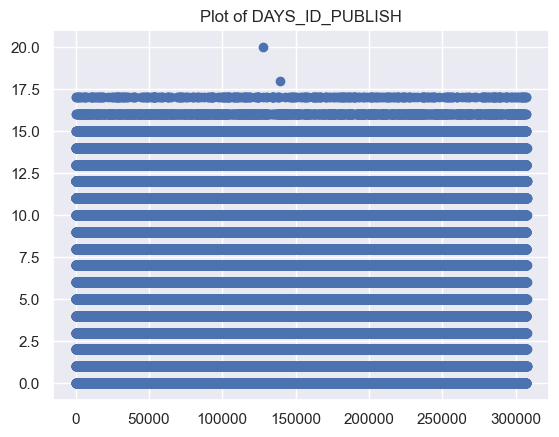

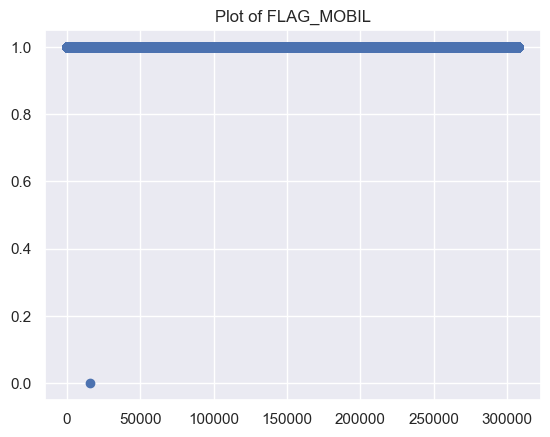

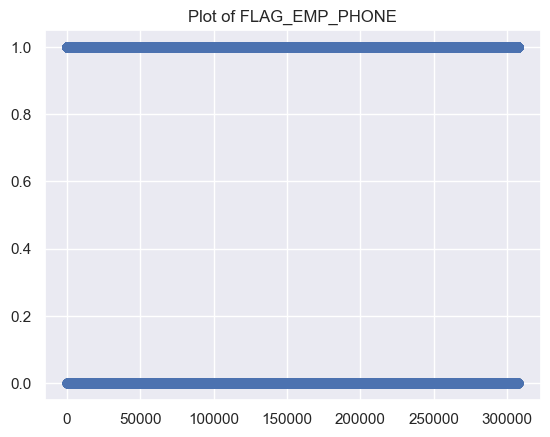

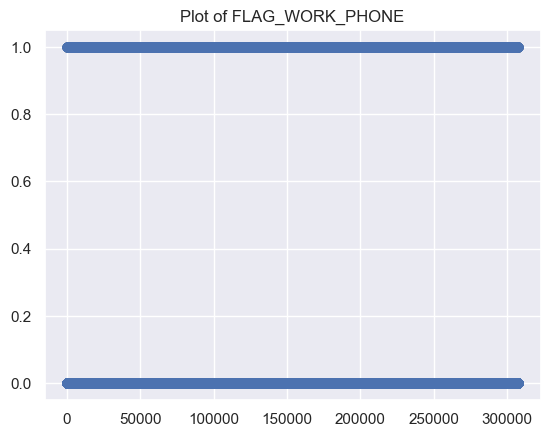

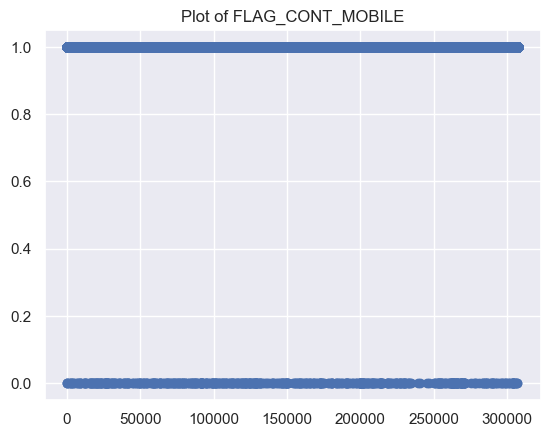

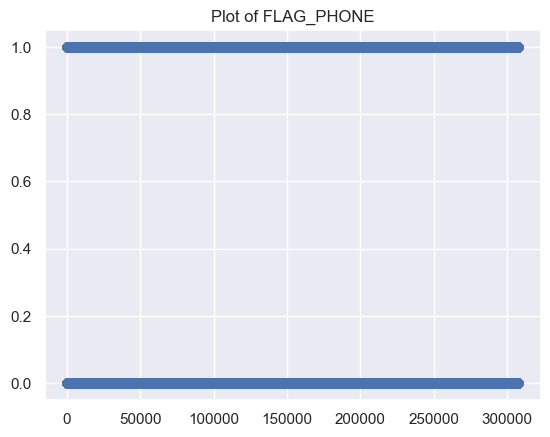

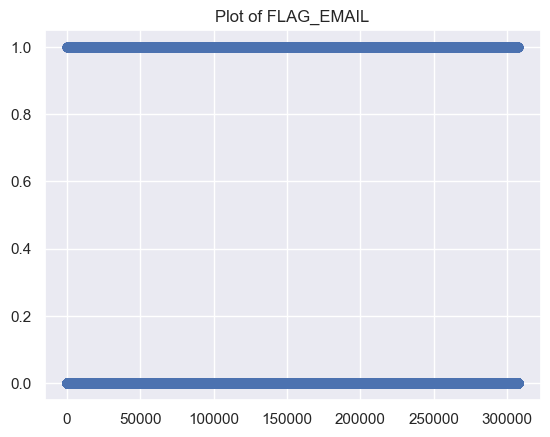

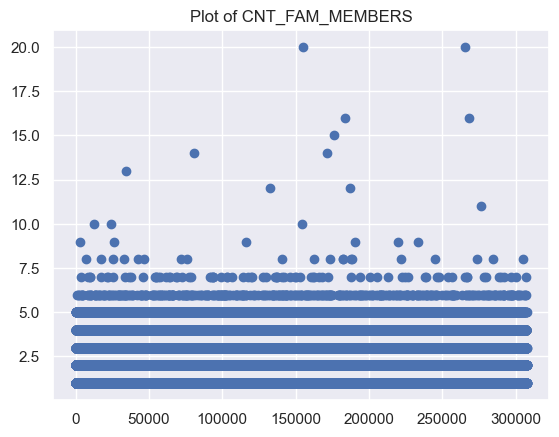

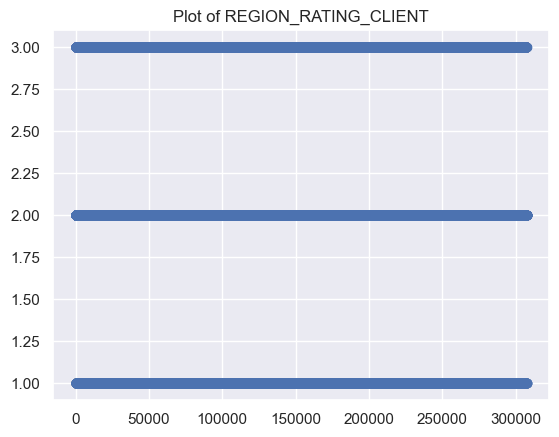

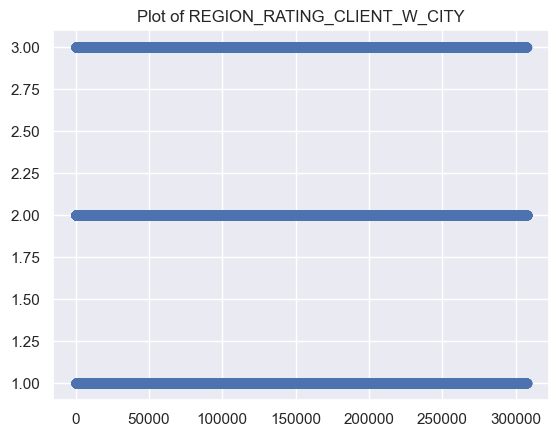

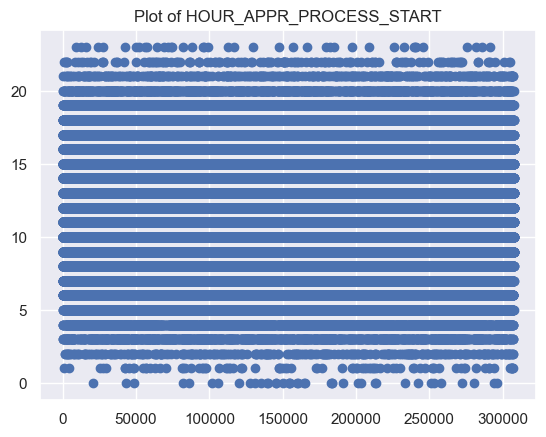

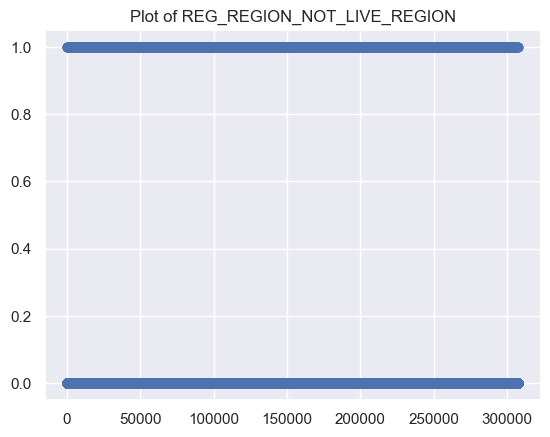

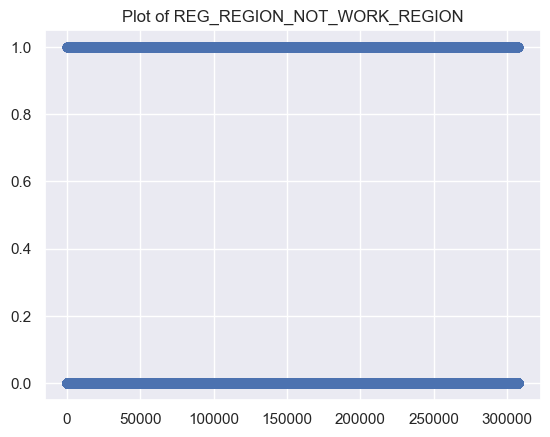

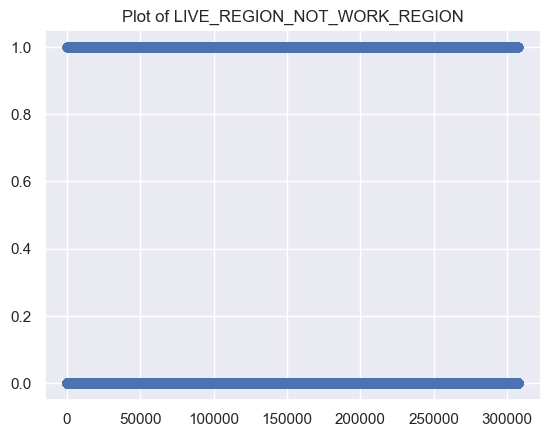

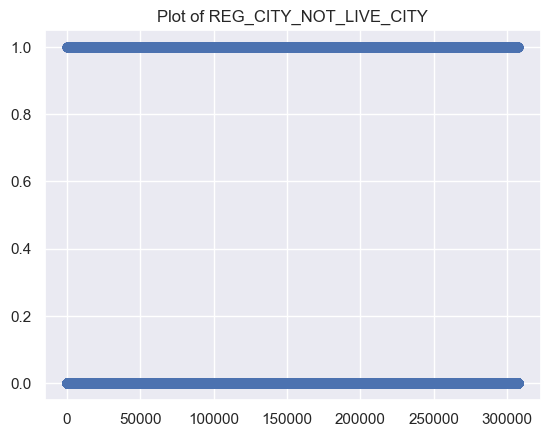

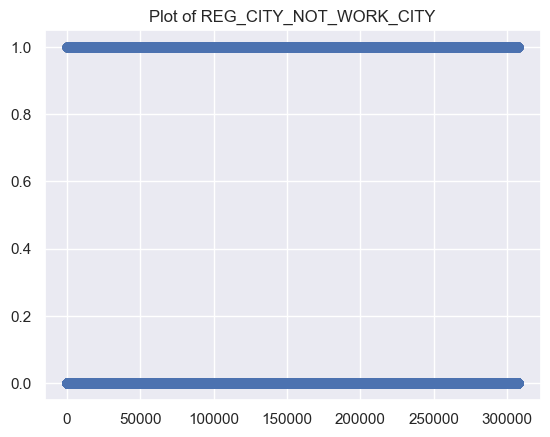

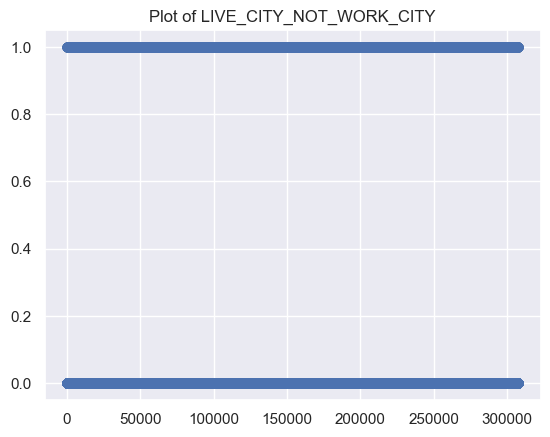

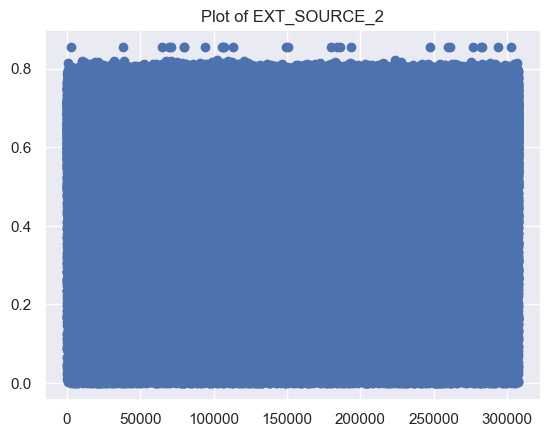

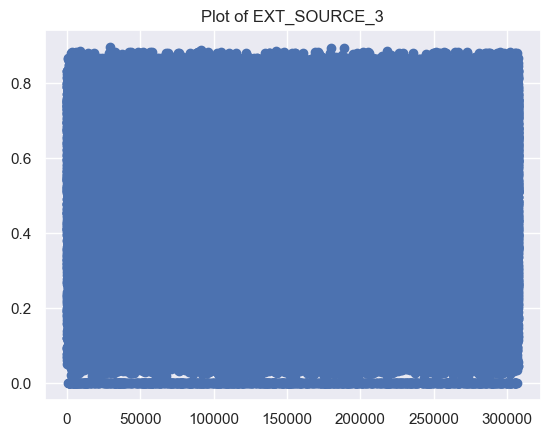

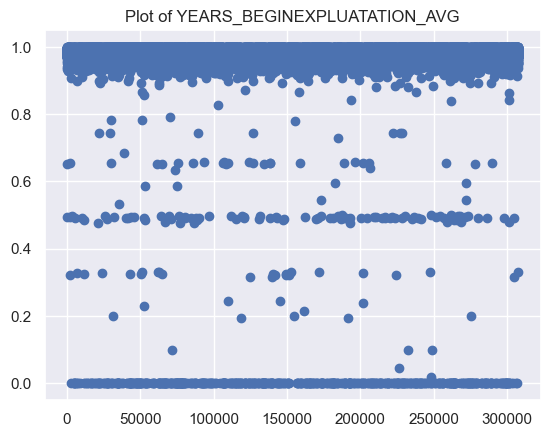

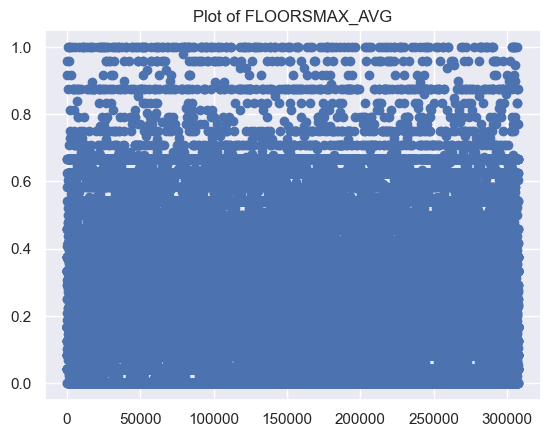

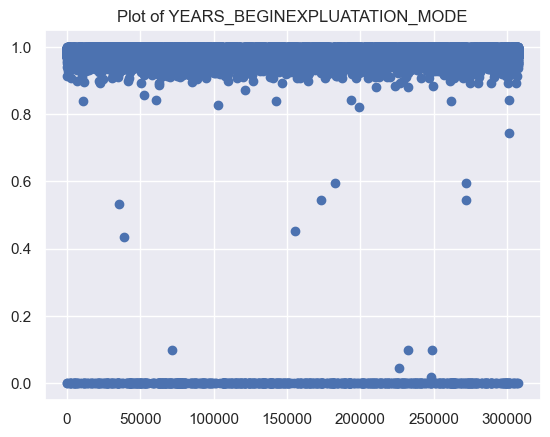

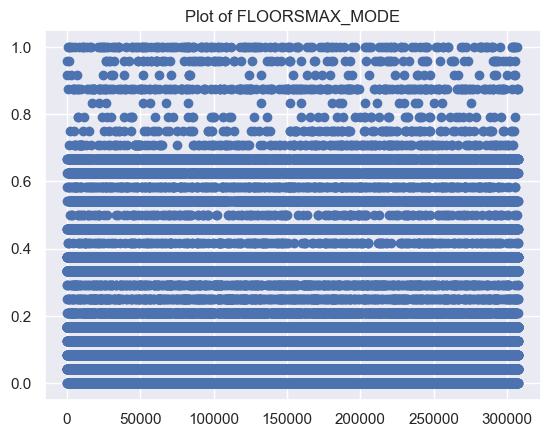

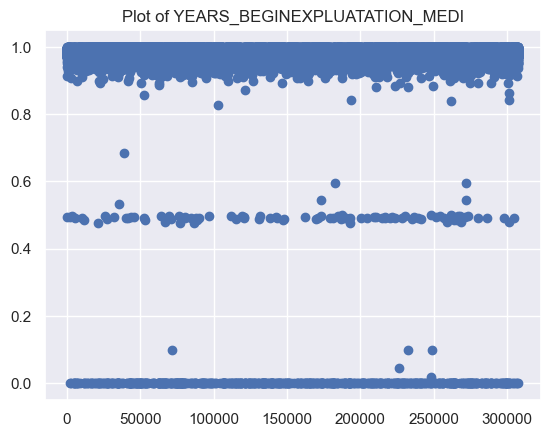

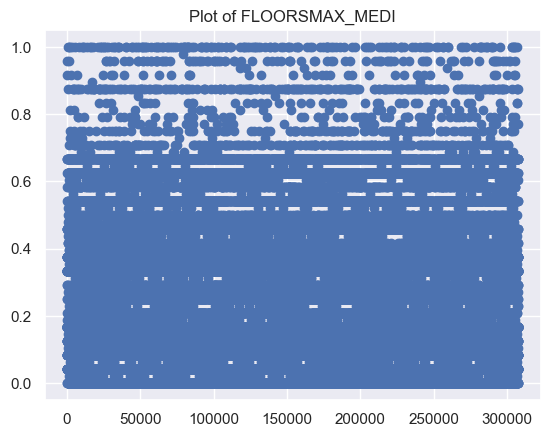

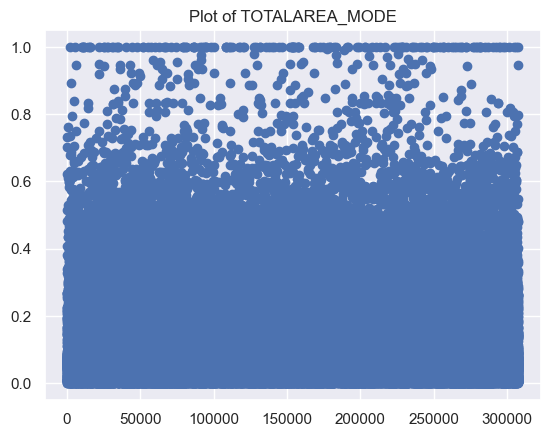

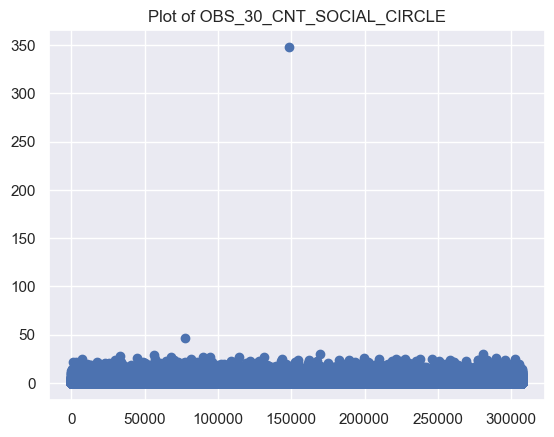

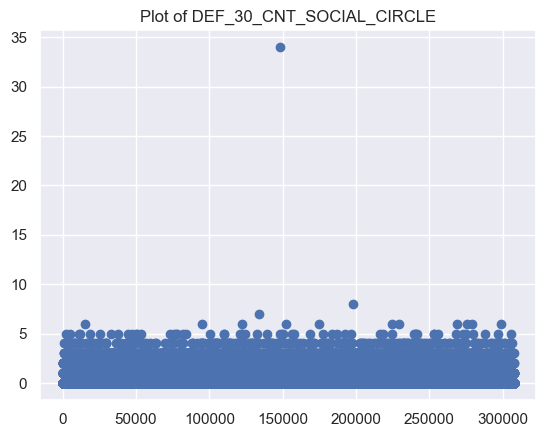

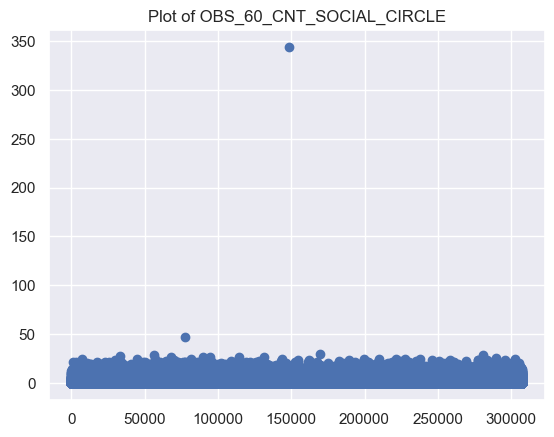

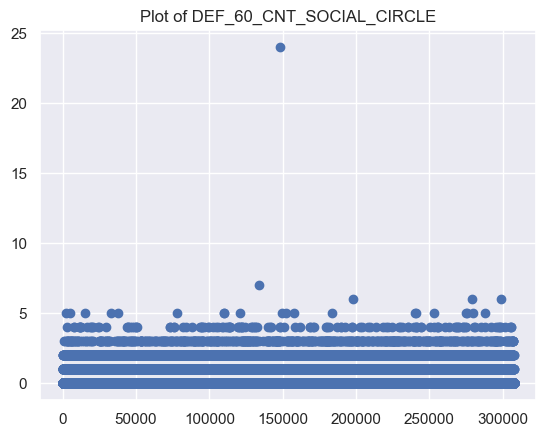

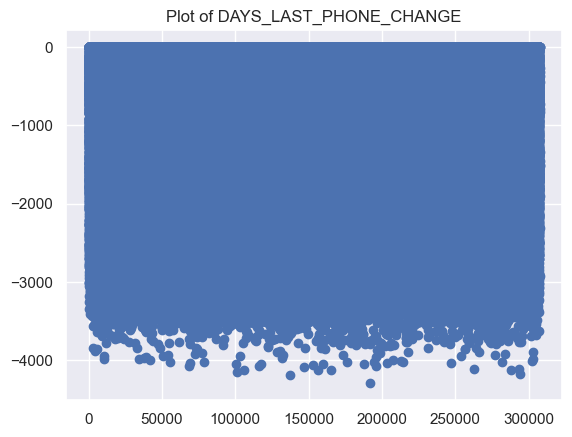

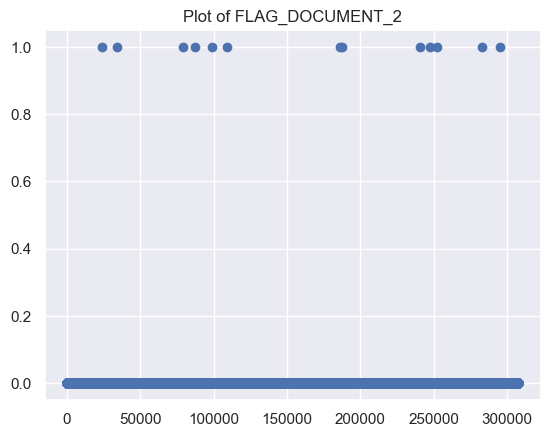

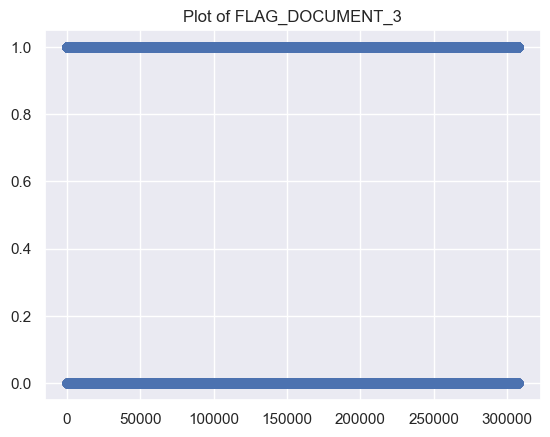

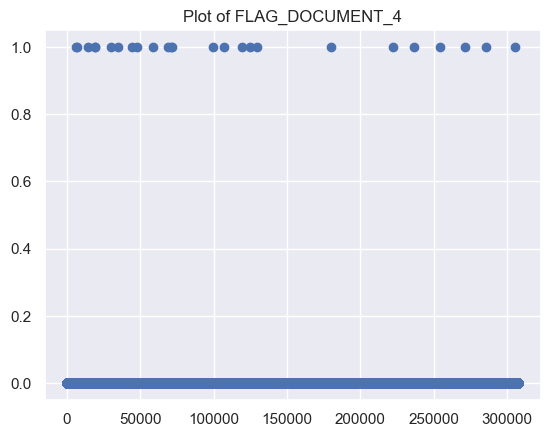

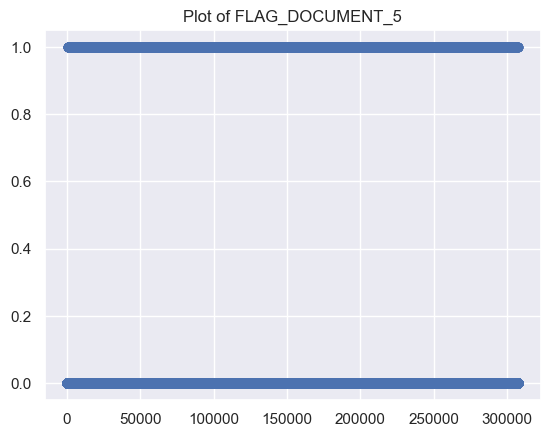

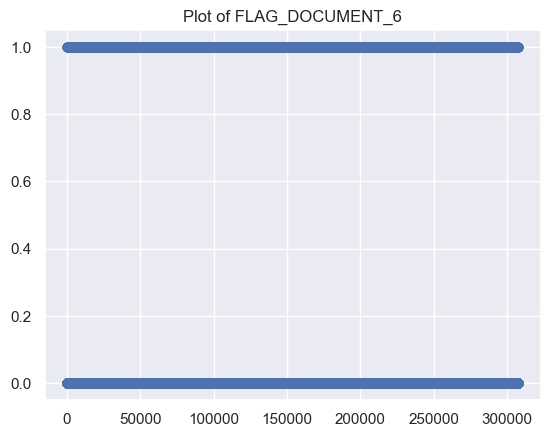

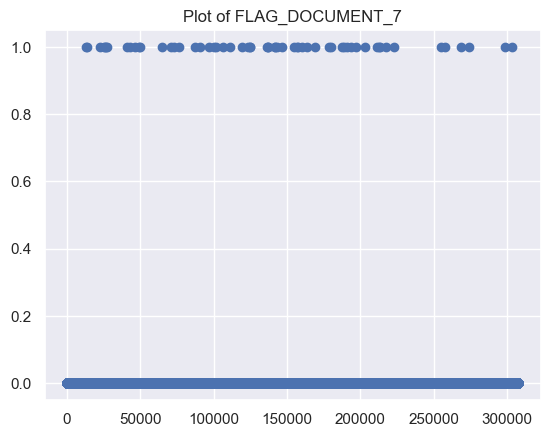

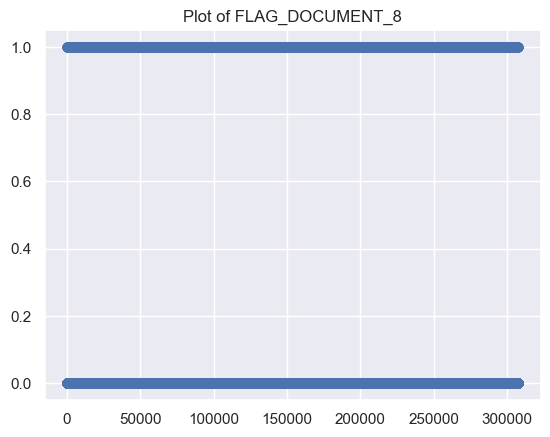

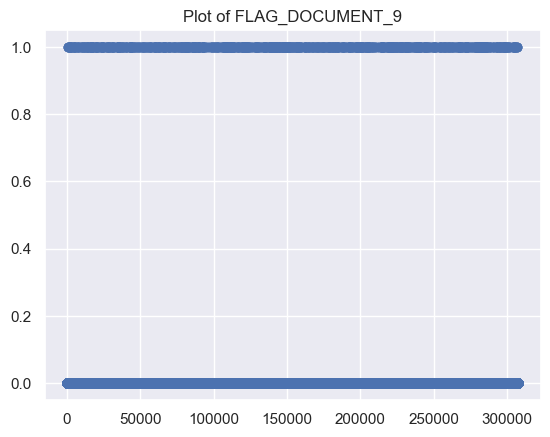

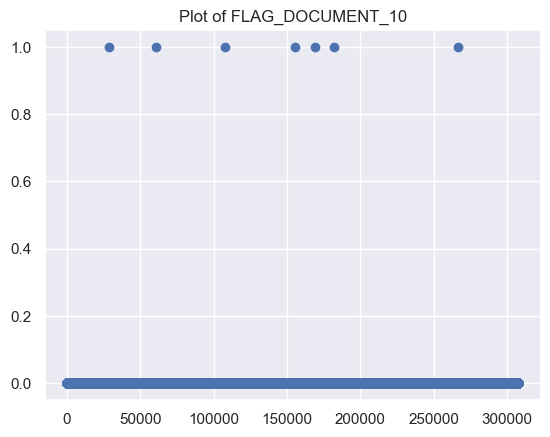

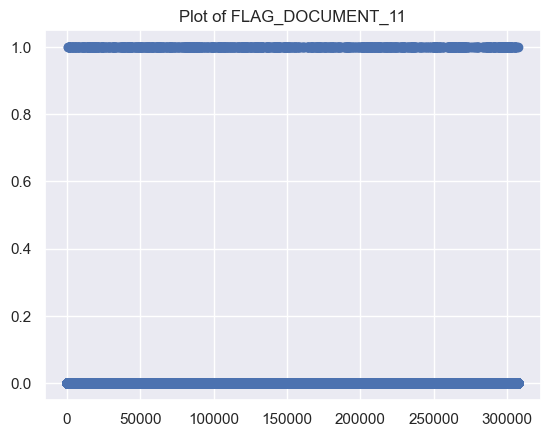

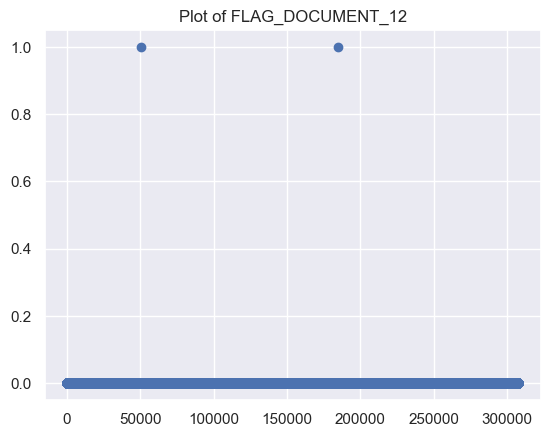

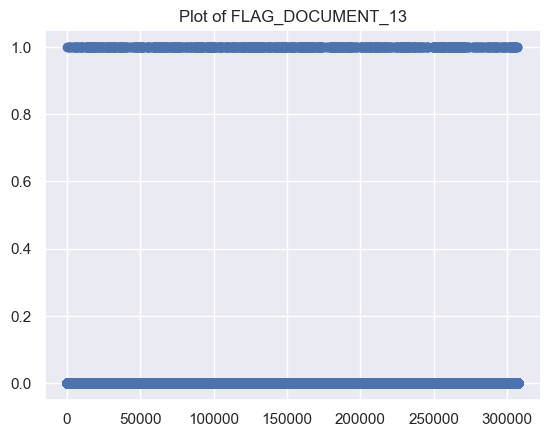

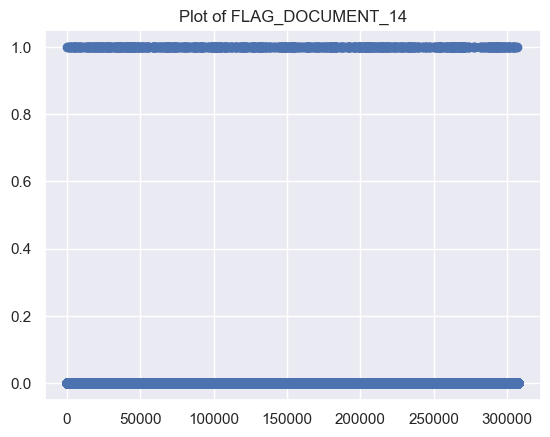

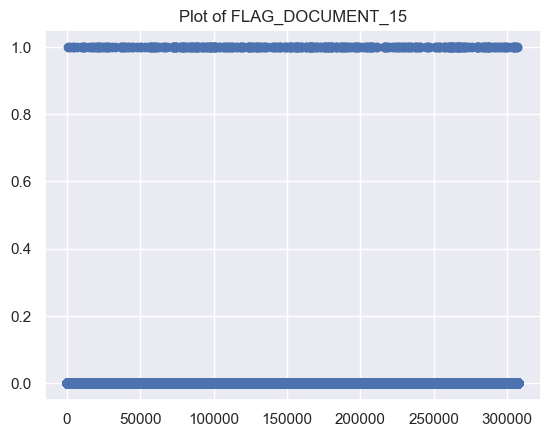

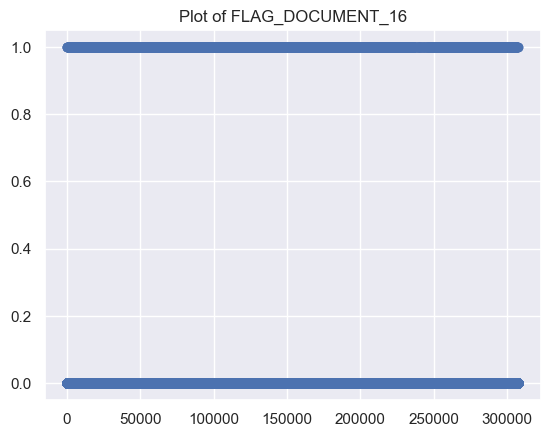

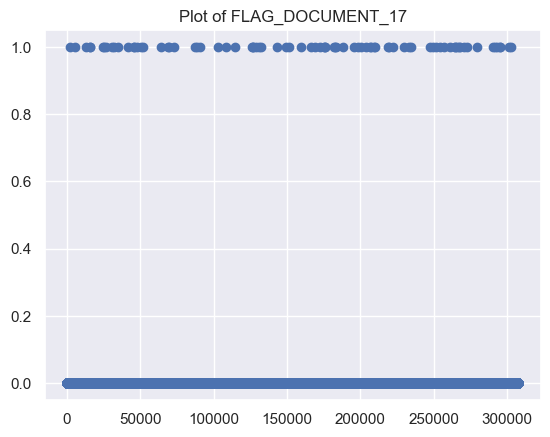

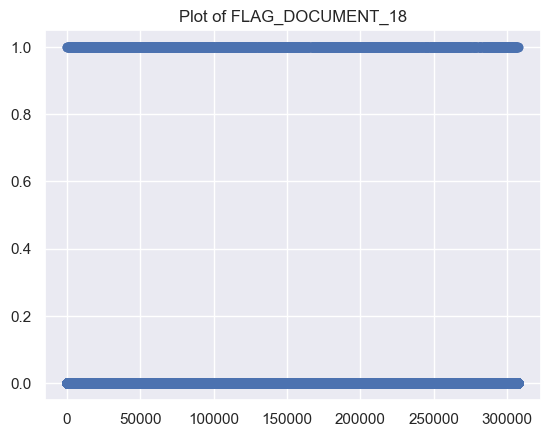

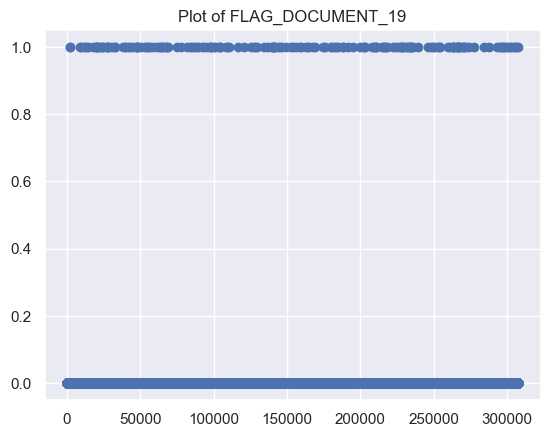

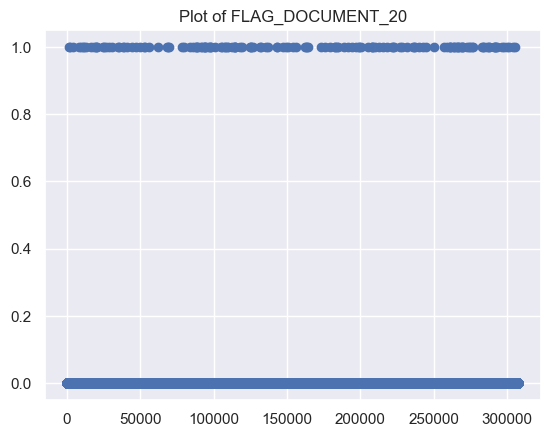

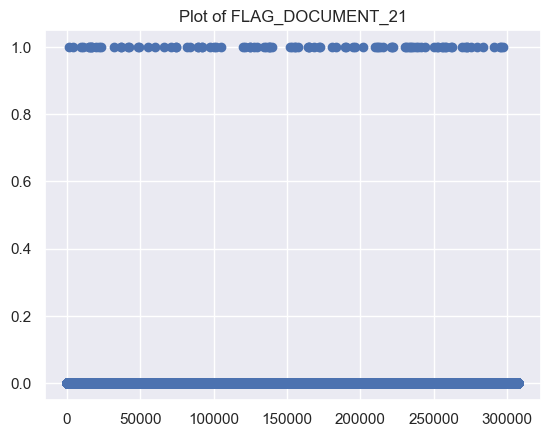

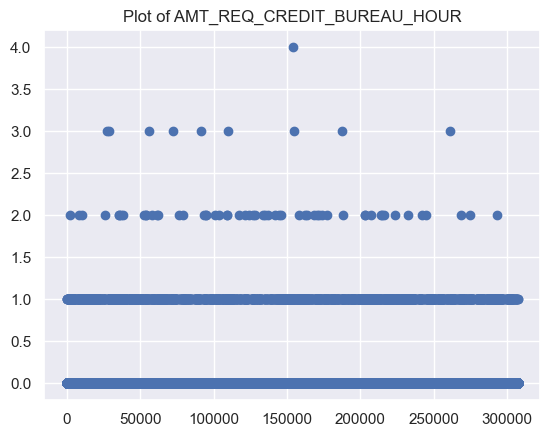

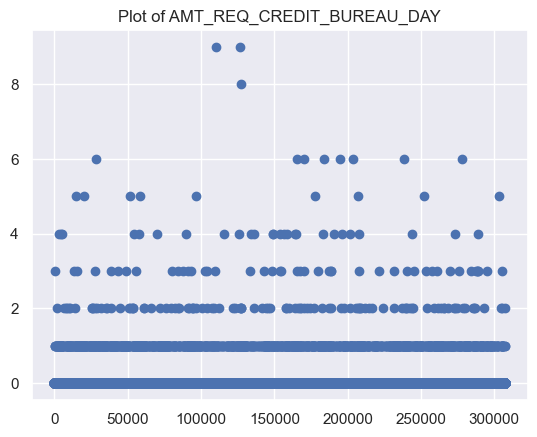

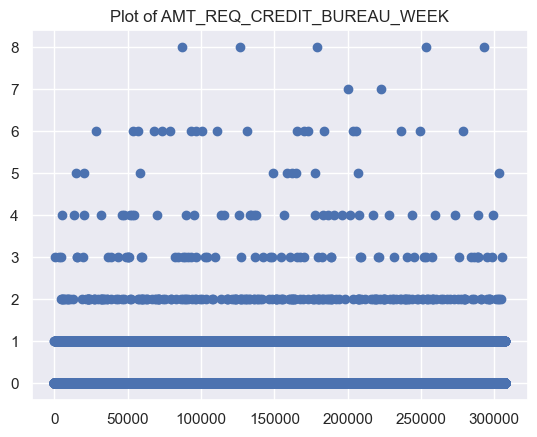

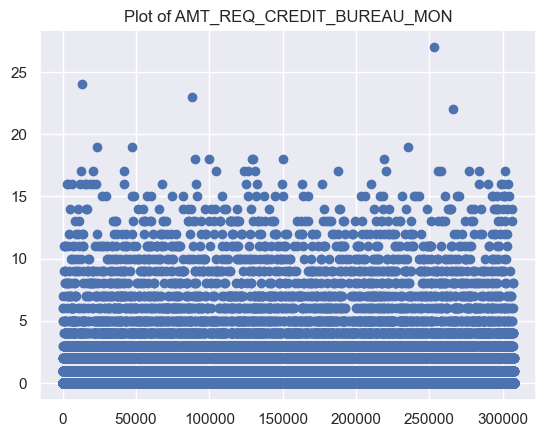

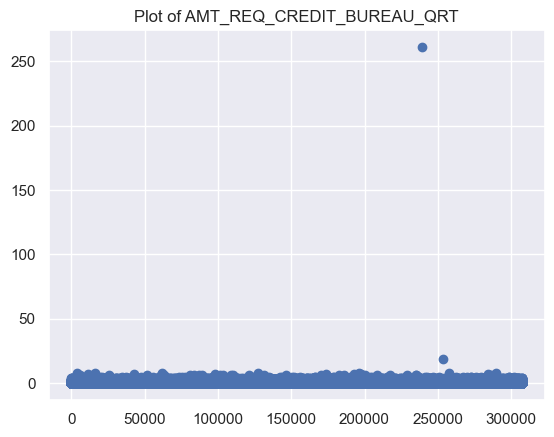

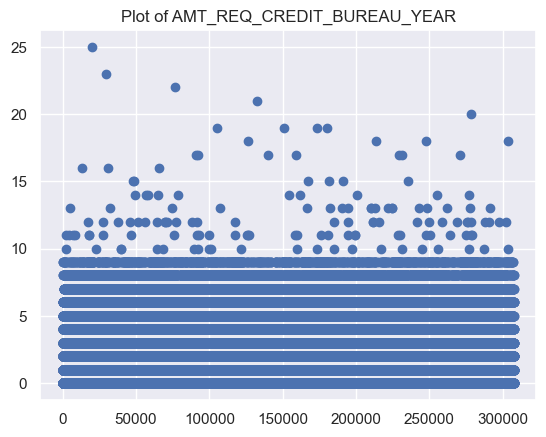

In [31]:
for column in train_categorical:
    title = "Plot of " + column
    plt.scatter(train.index, train[column])
    plt.title(title)
    plt.show()

The examination of outliers primarily hinges on the specifics of the business problem. Assuming the data is error-free, the decision to exclude any extreme values is dictated by business requirements. A review of various plots indicates the data reporting appears accurate. Hence, rather than eliminating these points, we will highlight the columns containing extreme values for further analysis.

Columns warranting further investigation include:

**CNT_CHILDREN**:
- This denotes the number of children a client has. Instances of clients with more than 10 children are considered extreme.

**AMT_INCOME_TOTAL**:
- This represents the client's income. A particular value around 1.2e8 is notably distant from the rest, suggesting it may be an outlier suitable for removal.

**FLAG_MOBILE**:
- This identifies whether a client possesses a mobile phone. Its absence may or may not be considered an outlier.
Other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, and OBS_60_CNT_SOCIAL_CIRCLE also merit attention.

## Converting a numerial data to categorical for analysis

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

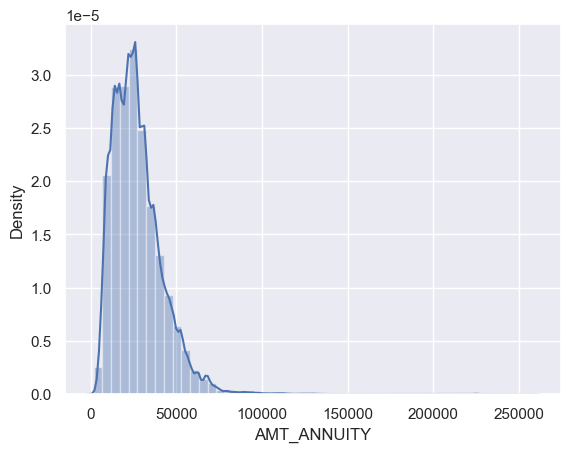

In [32]:
sns.distplot(train['AMT_ANNUITY'].dropna())

In [33]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <= 50000:
        return 'medium'
    elif x > 50000 and x <= 100000:
        return 'high'
    else:
        return 'very high'

train['amt_annuity_categorical'] = train['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

<Axes: xlabel='amt_annuity_categorical', ylabel='count'>

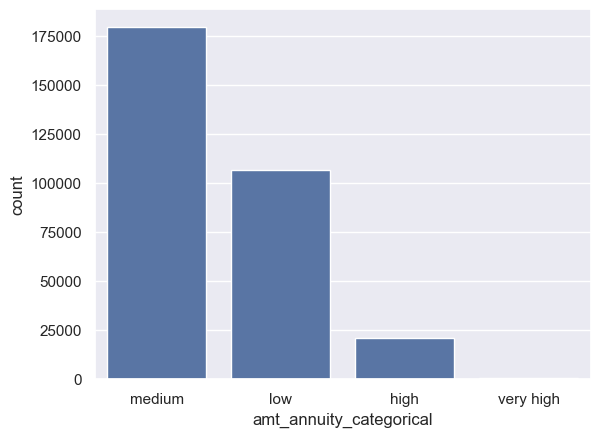

In [34]:
sns.countplot(x='amt_annuity_categorical', data=train)

# Task 6 - Univariate Analysis for numerical data

For univariate analysis of the numerical columns, we will plot the histogram and the distribution plot.

Plot of SK_ID_CURR


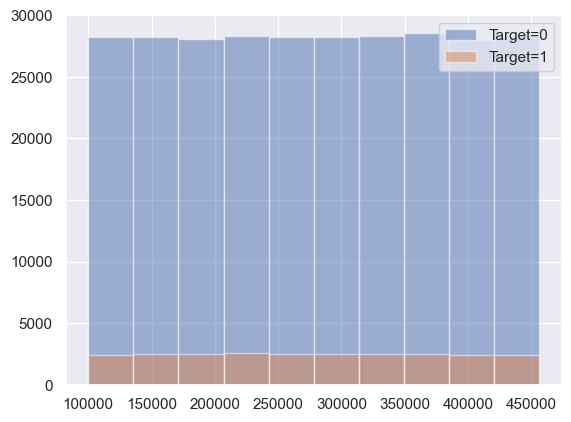

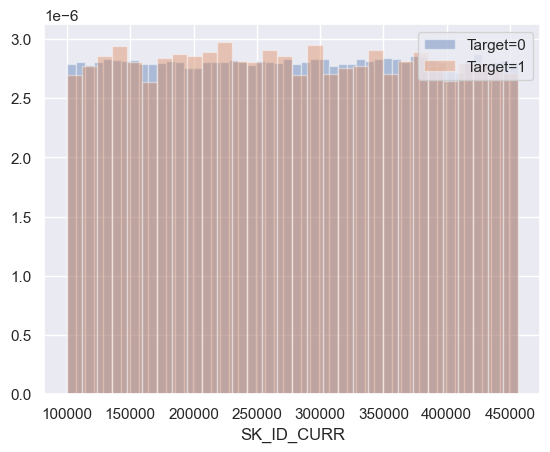

------------------------------------------------------------------------
Plot of CNT_CHILDREN


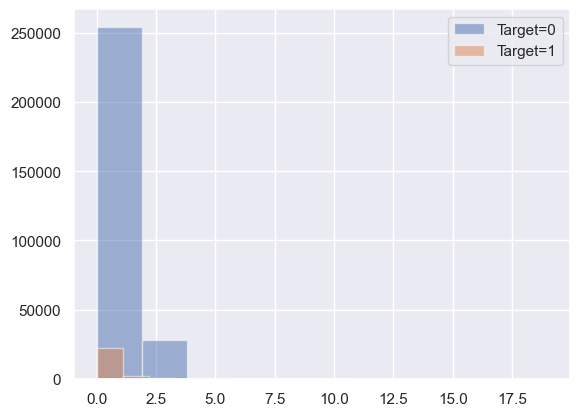

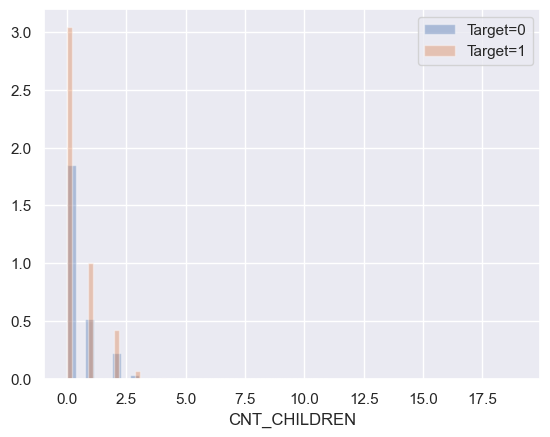

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


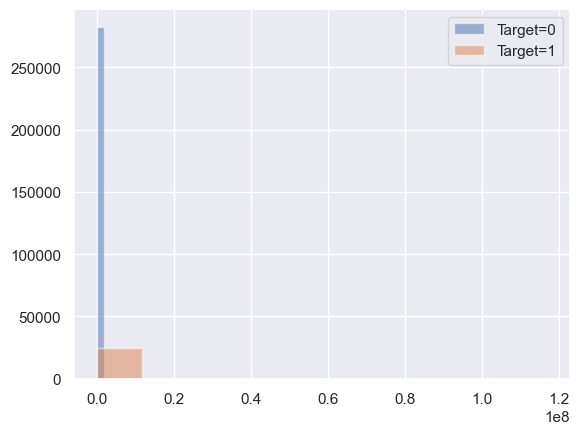

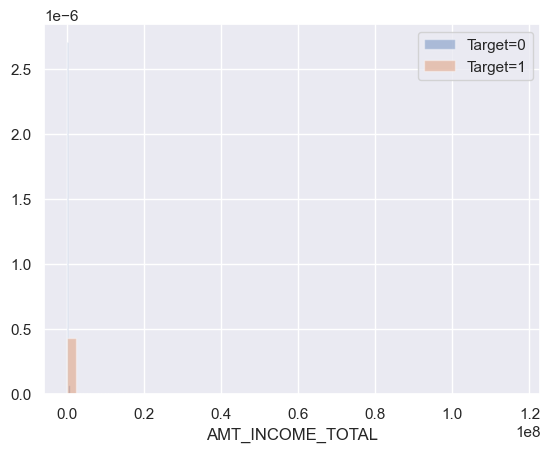

------------------------------------------------------------------------
Plot of AMT_CREDIT


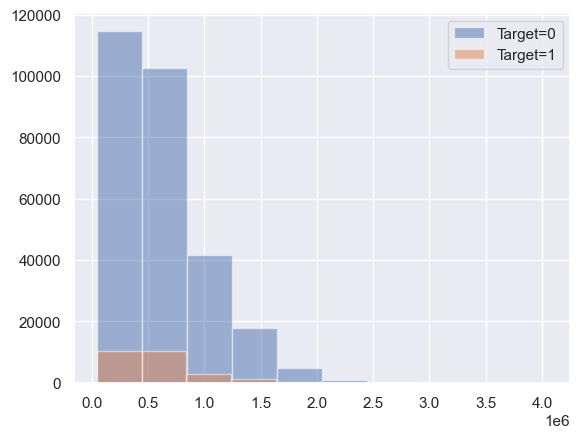

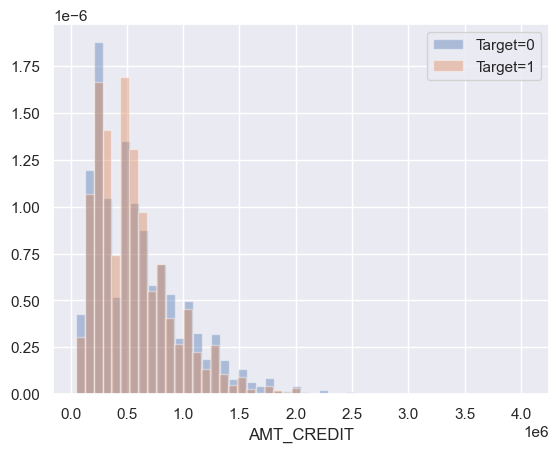

------------------------------------------------------------------------
Plot of AMT_ANNUITY


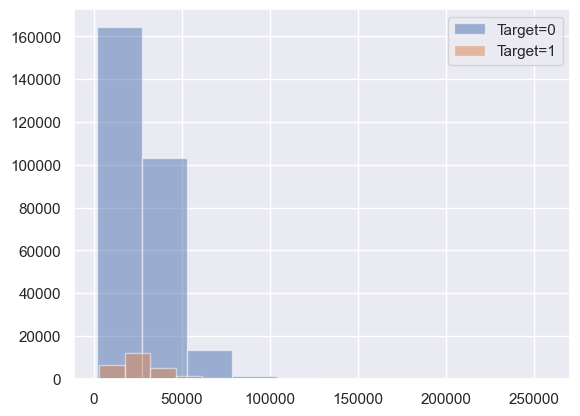

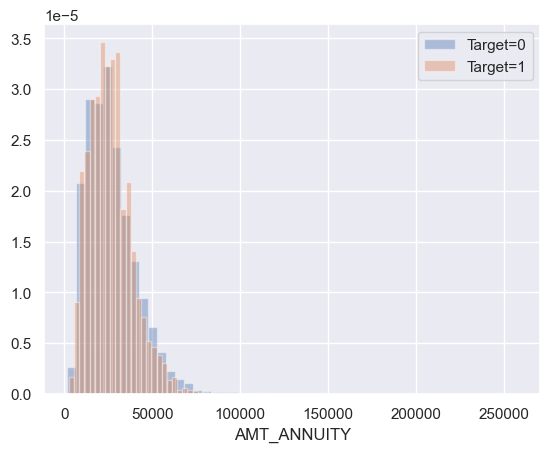

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


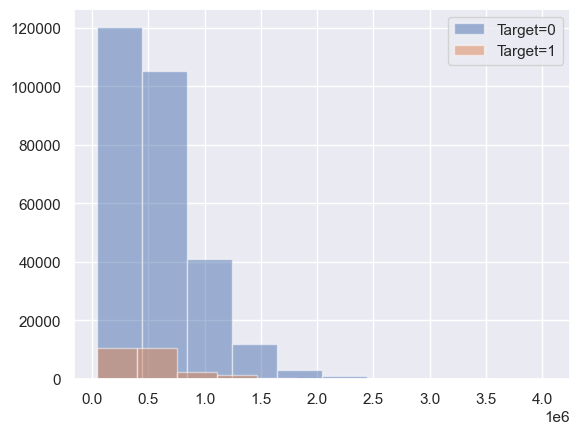

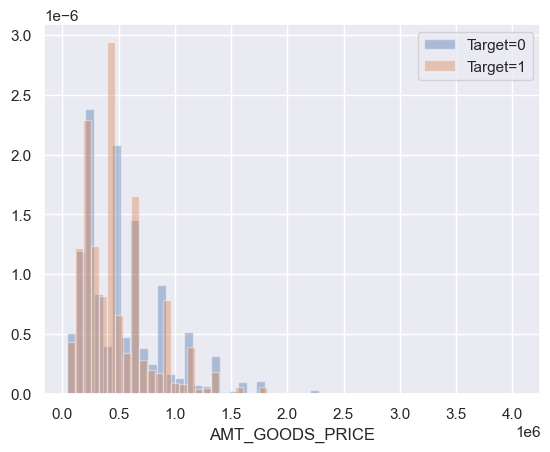

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


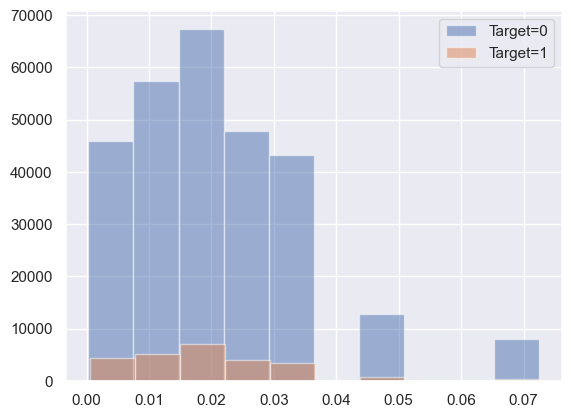

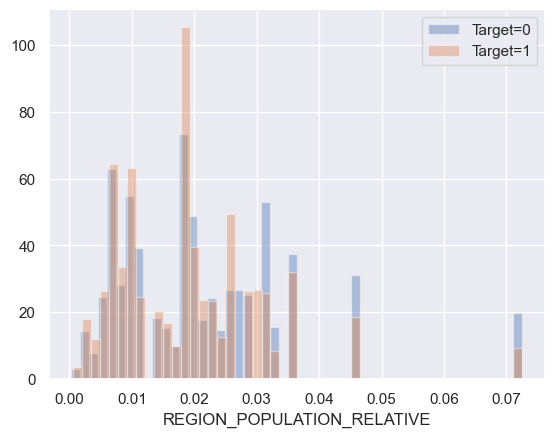

------------------------------------------------------------------------
Plot of DAYS_BIRTH


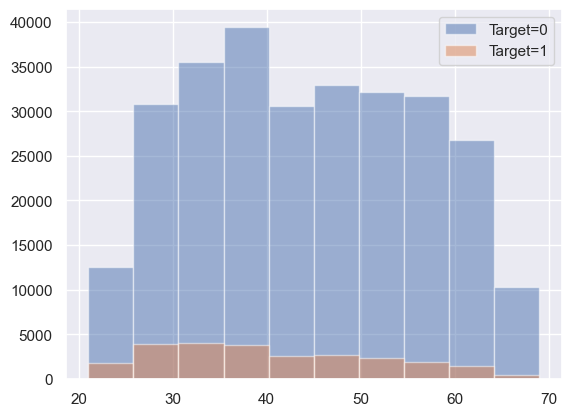

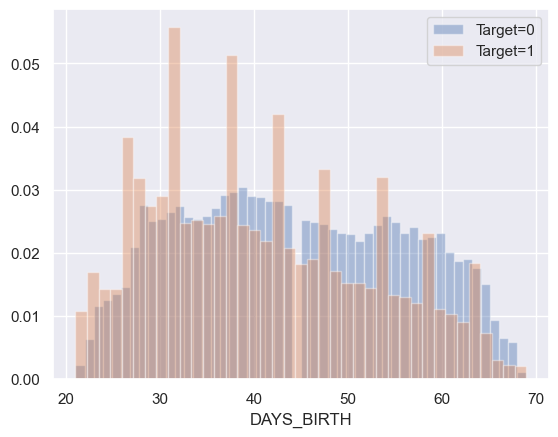

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


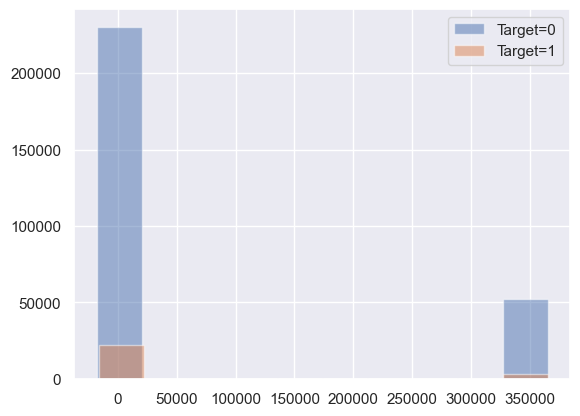

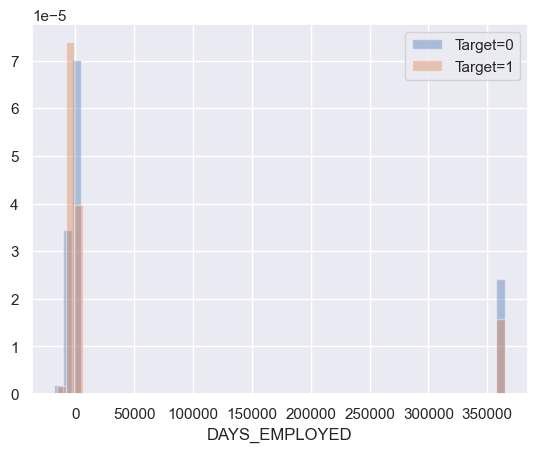

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


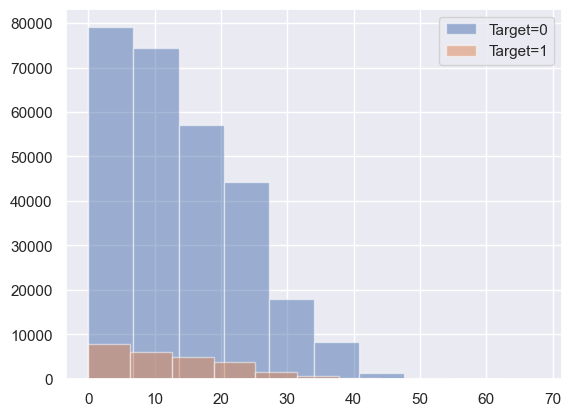

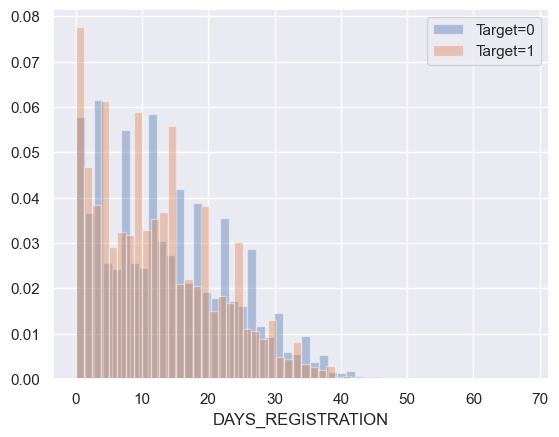

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


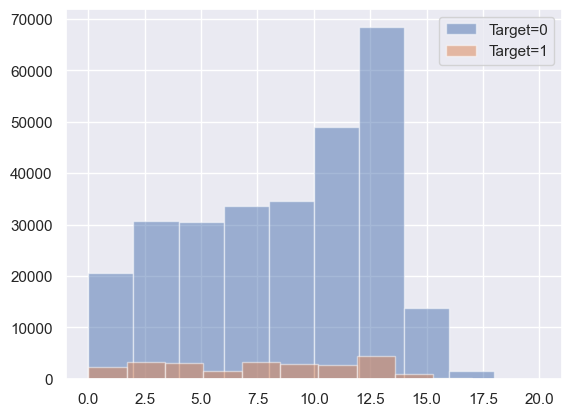

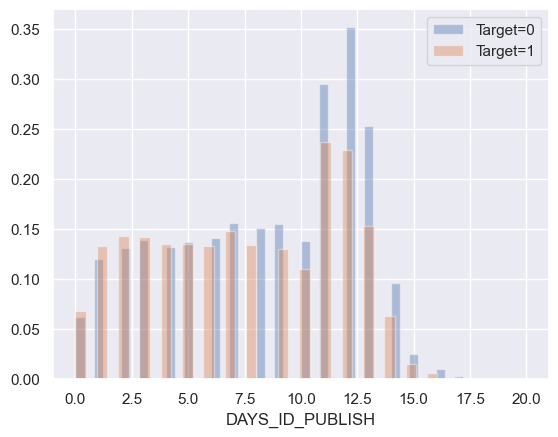

------------------------------------------------------------------------
Plot of FLAG_MOBIL


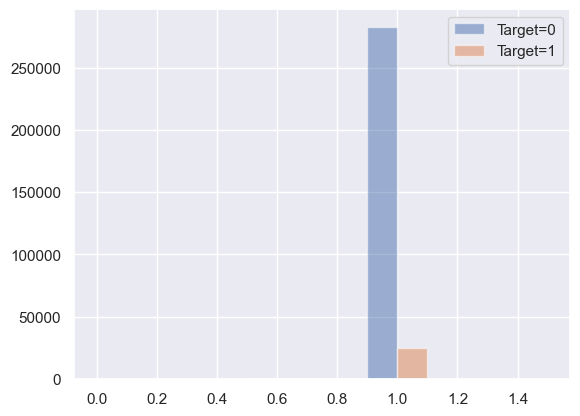

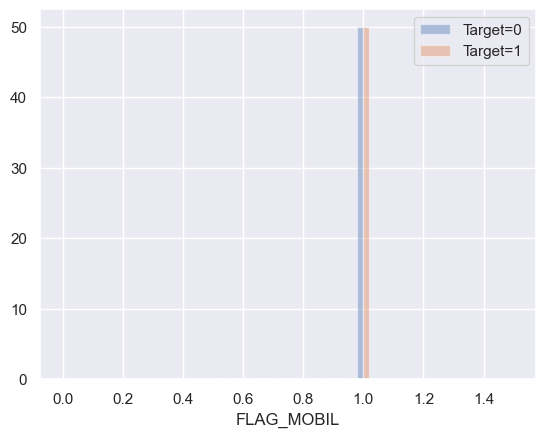

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


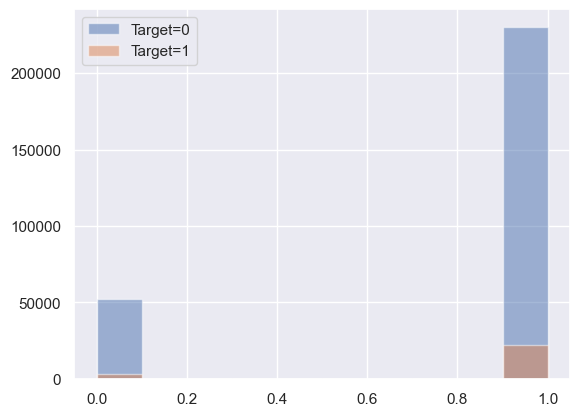

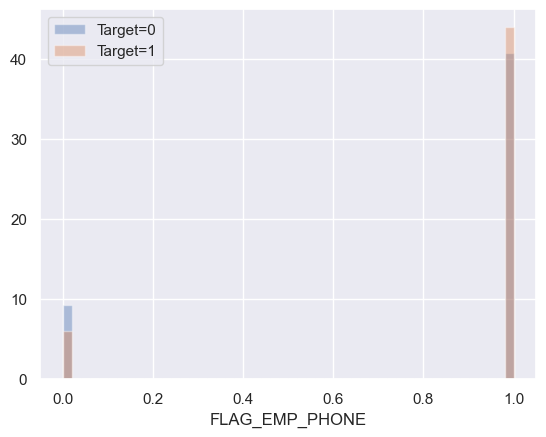

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


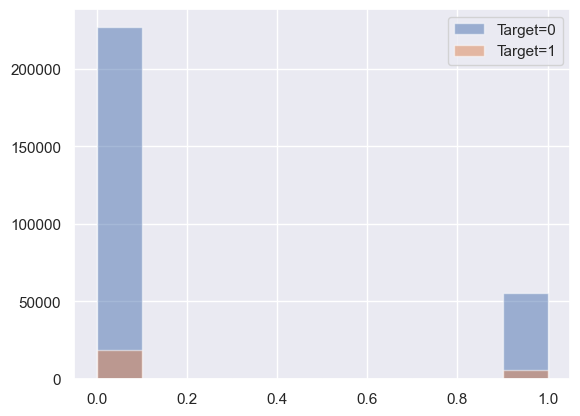

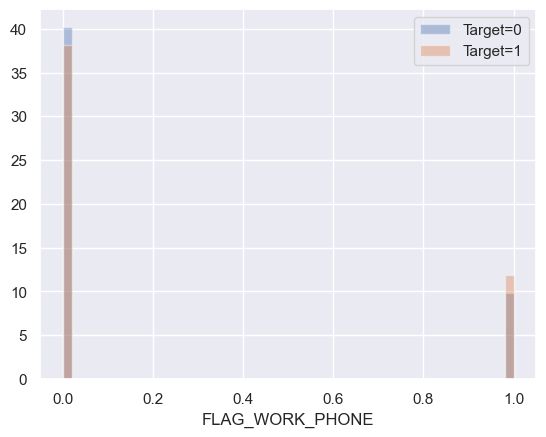

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


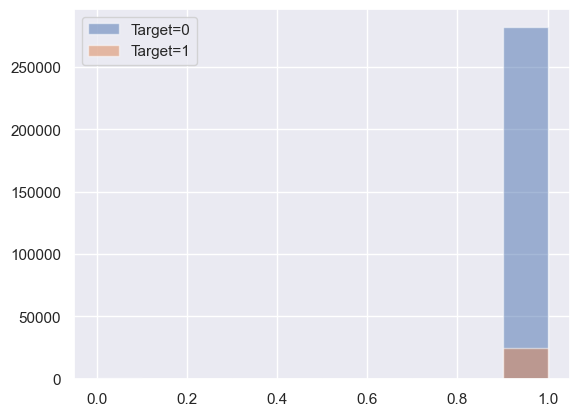

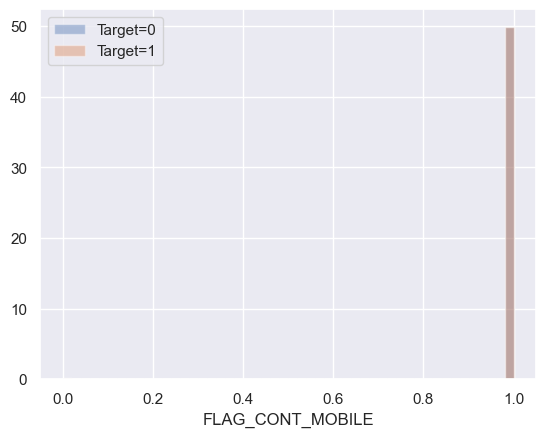

------------------------------------------------------------------------
Plot of FLAG_PHONE


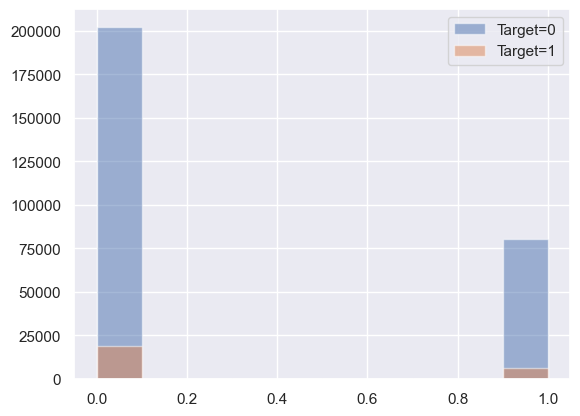

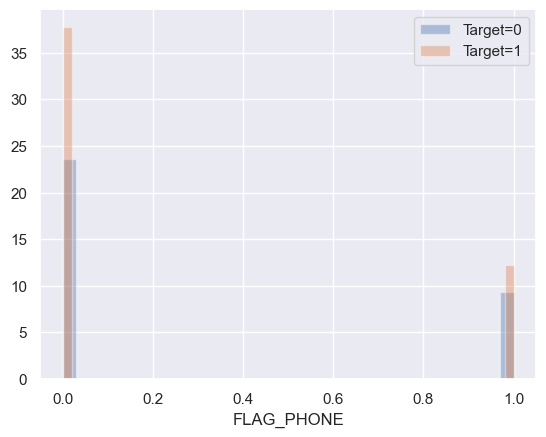

------------------------------------------------------------------------
Plot of FLAG_EMAIL


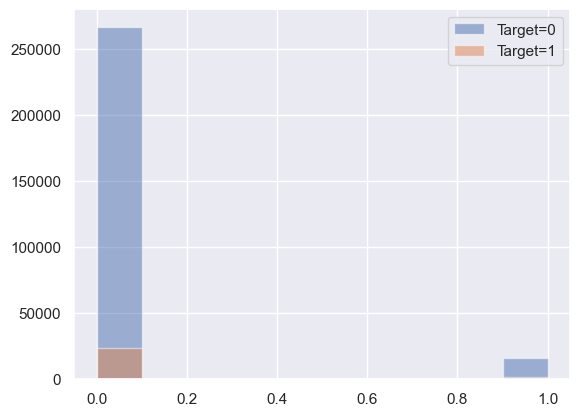

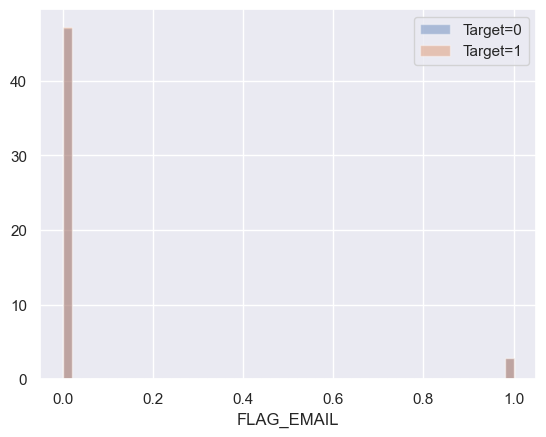

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


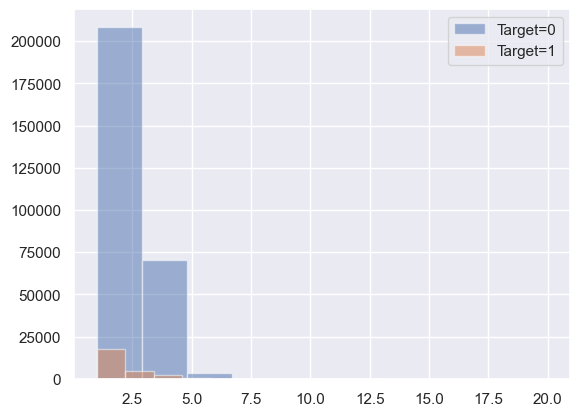

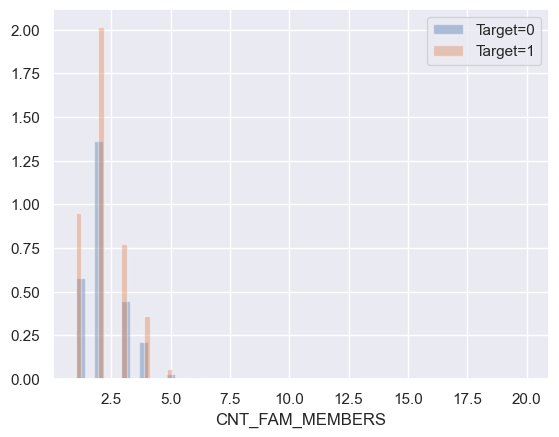

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


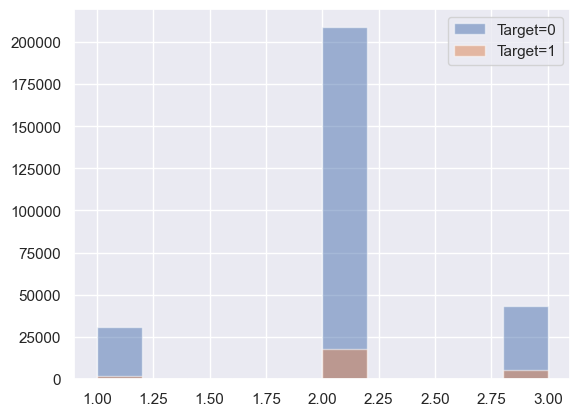

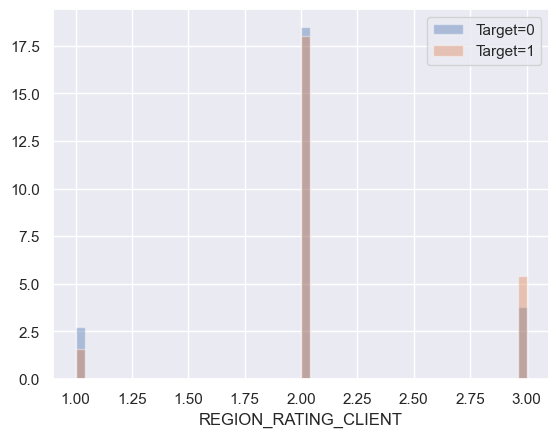

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


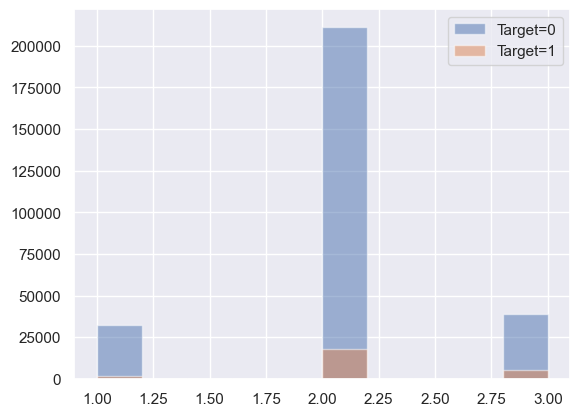

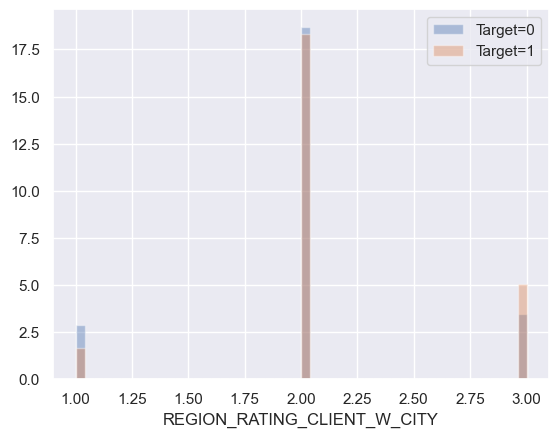

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


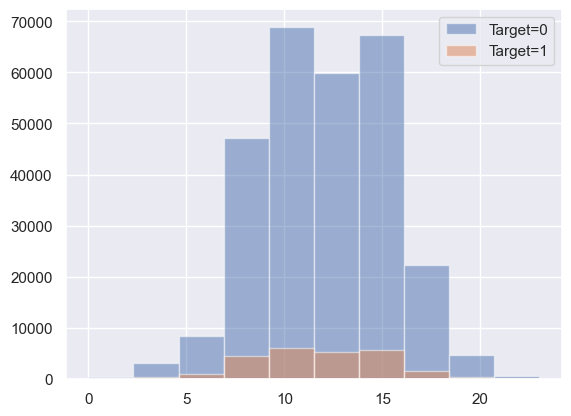

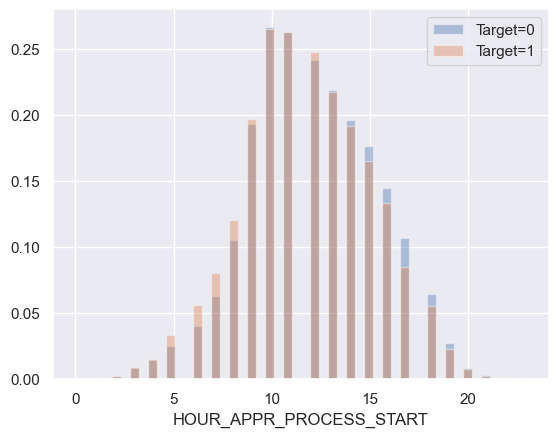

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


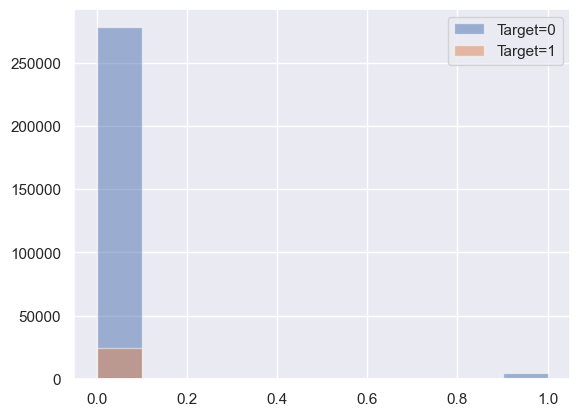

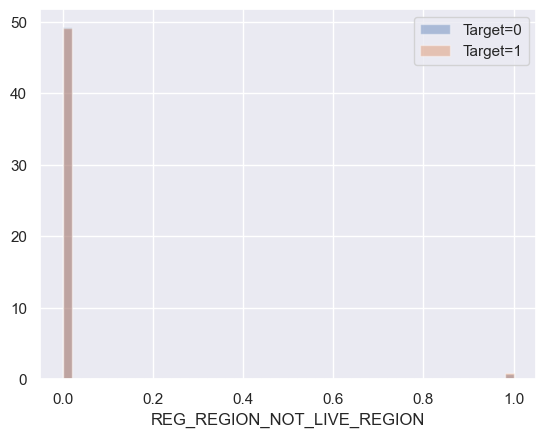

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


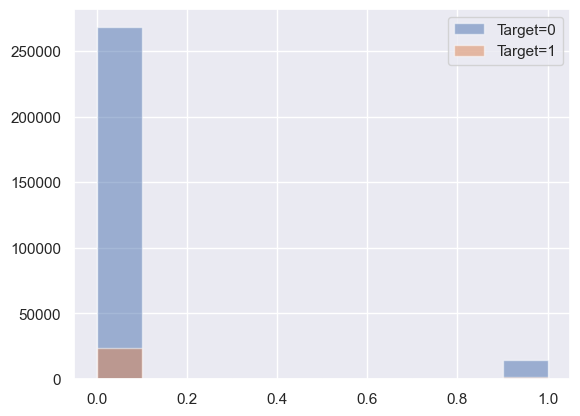

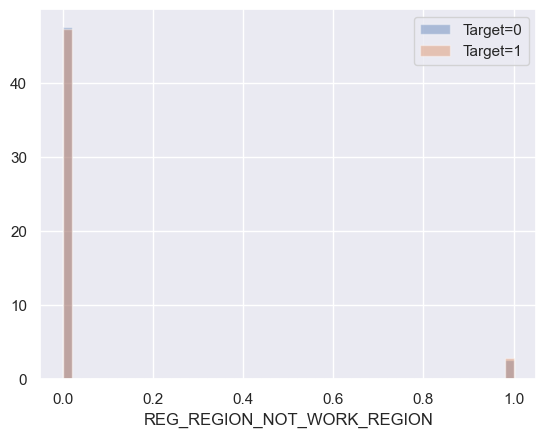

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


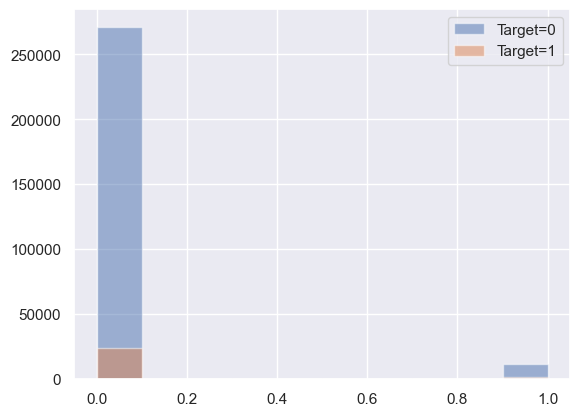

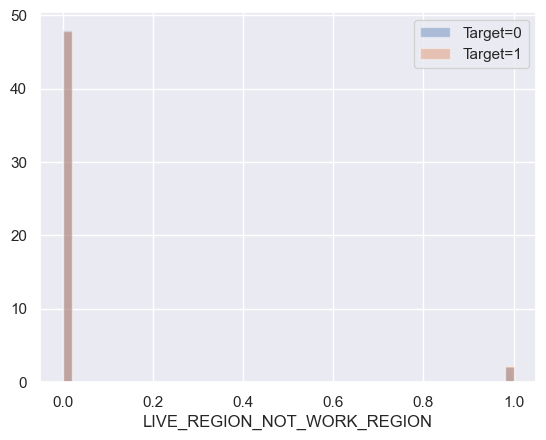

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


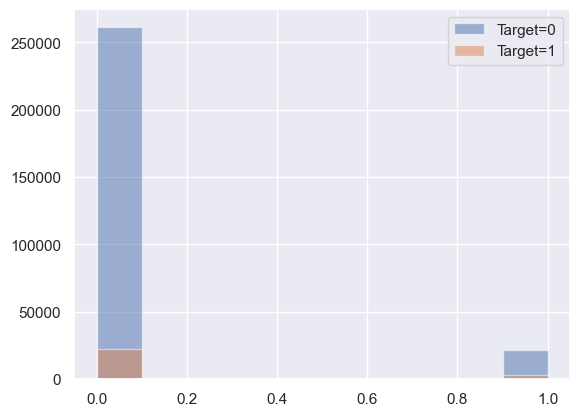

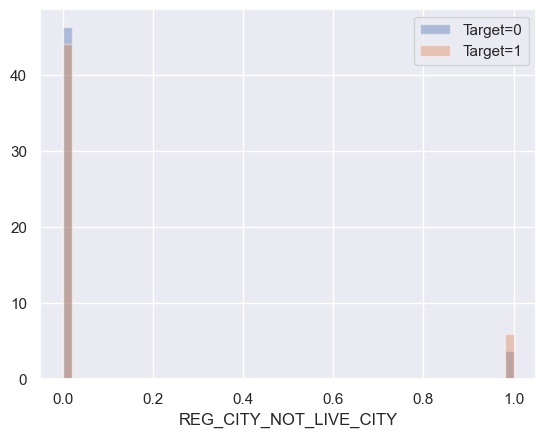

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


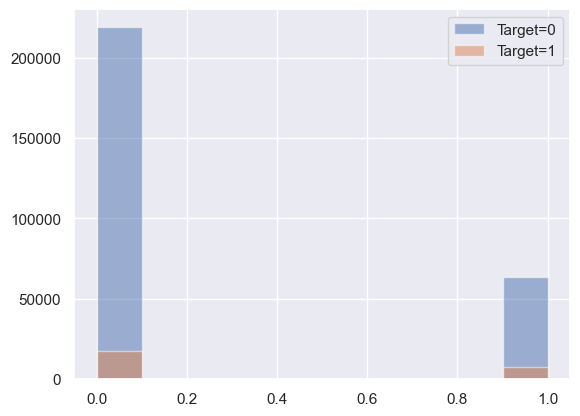

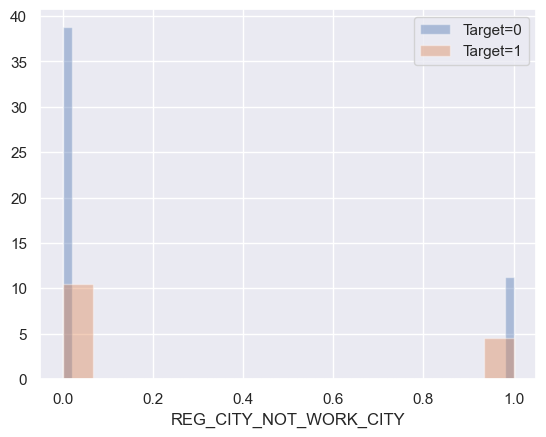

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


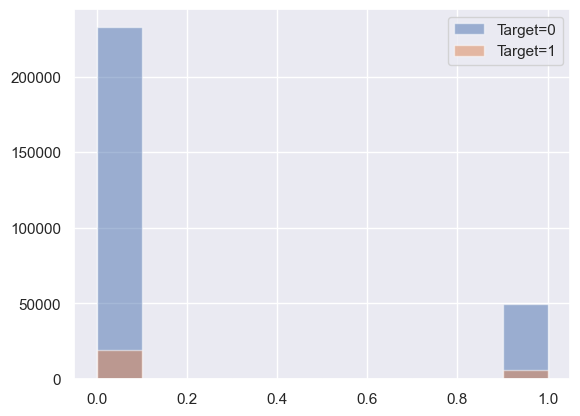

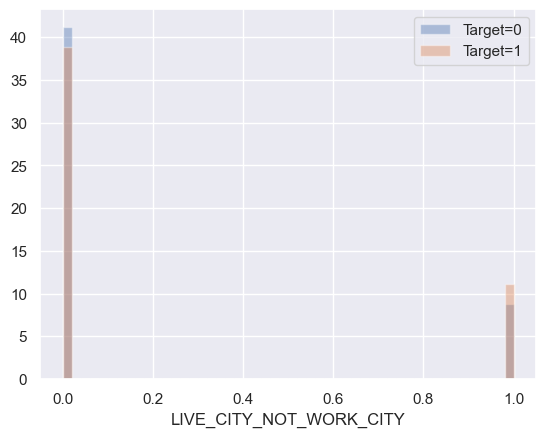

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


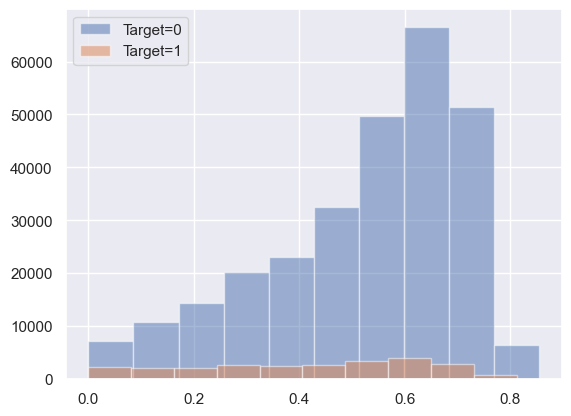

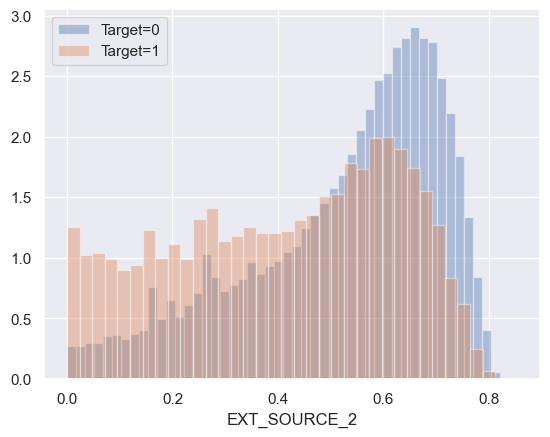

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


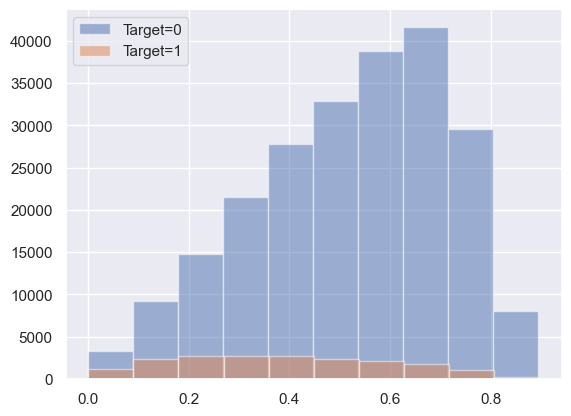

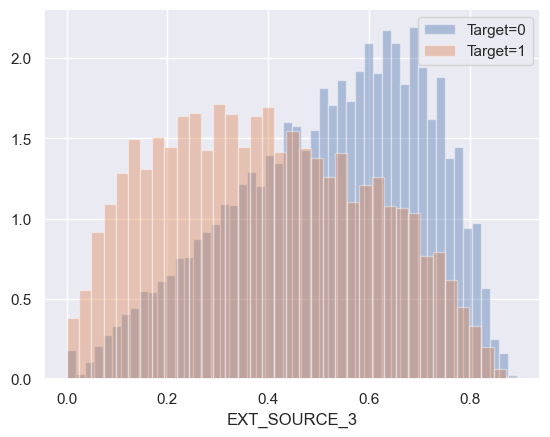

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


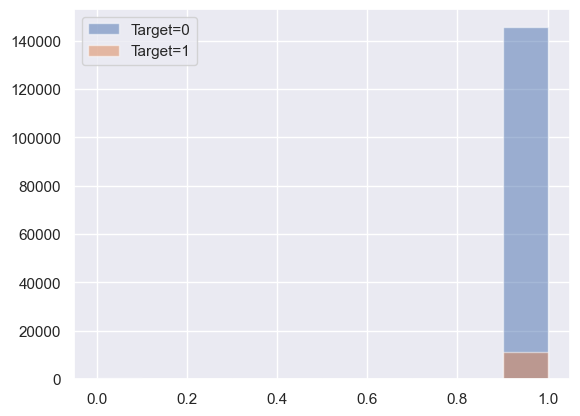

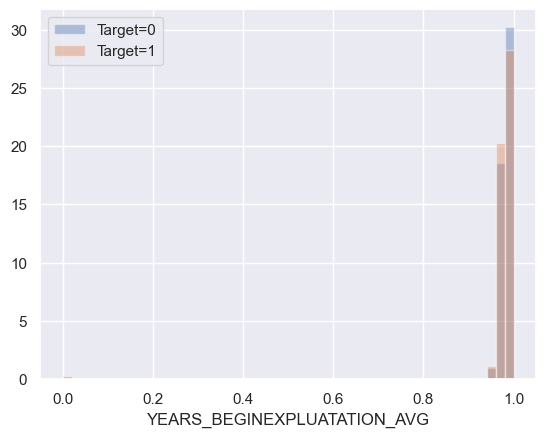

------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


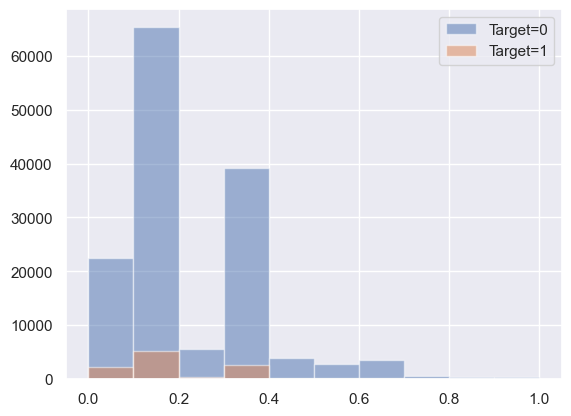

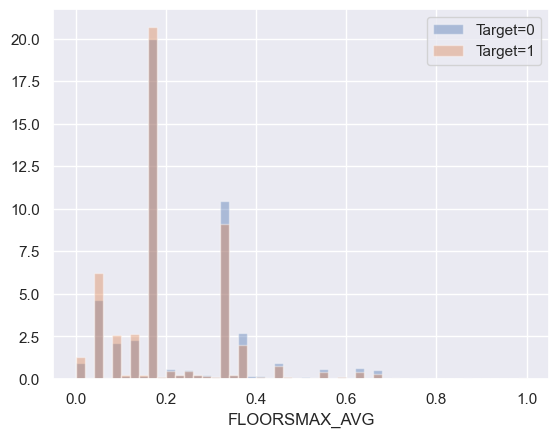

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


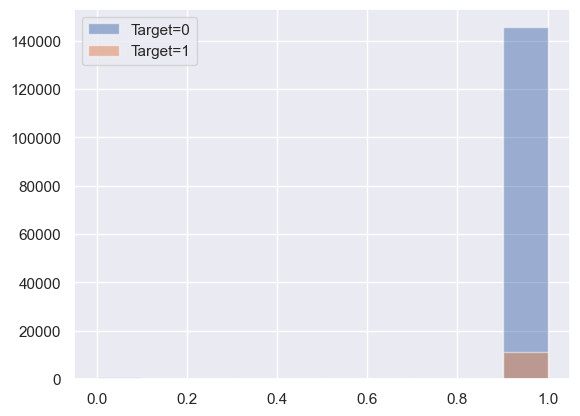

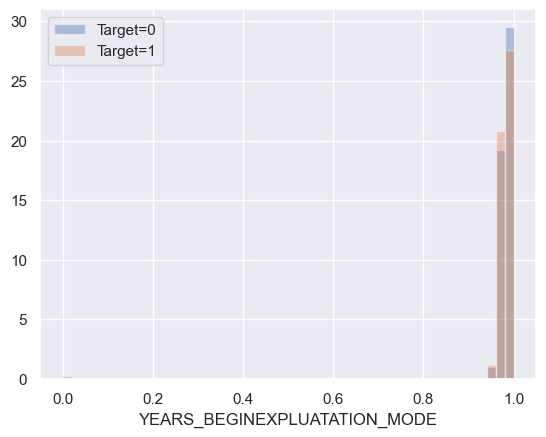

------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


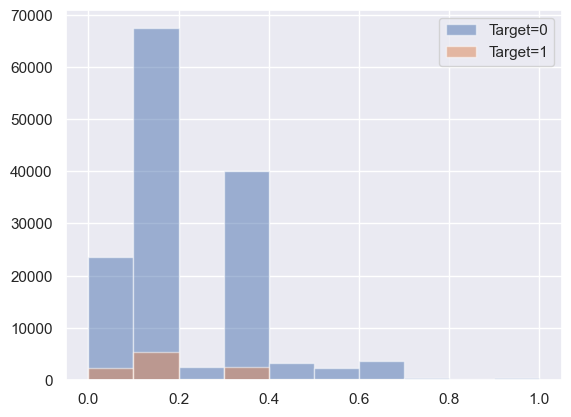

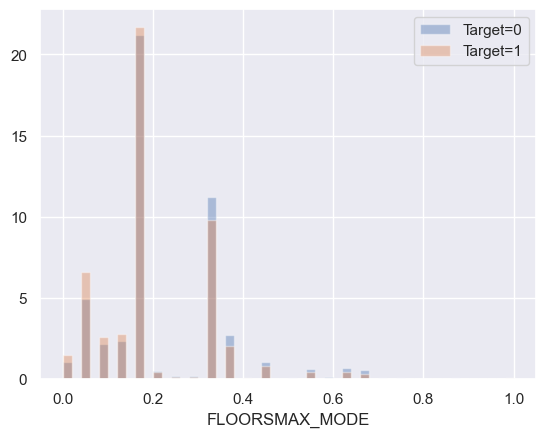

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


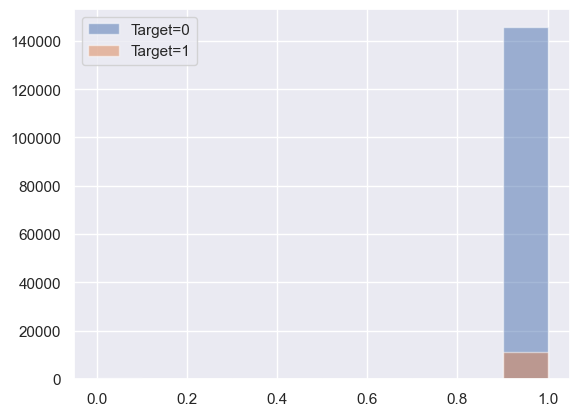

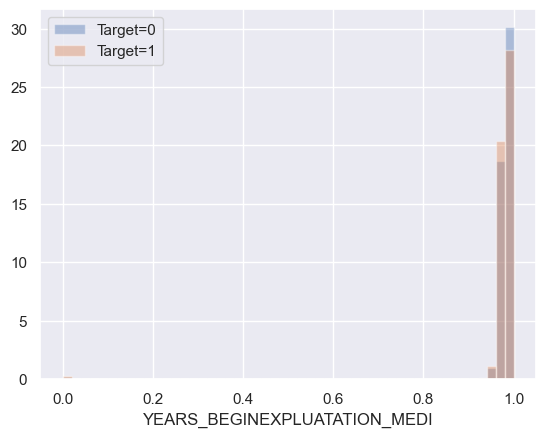

------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


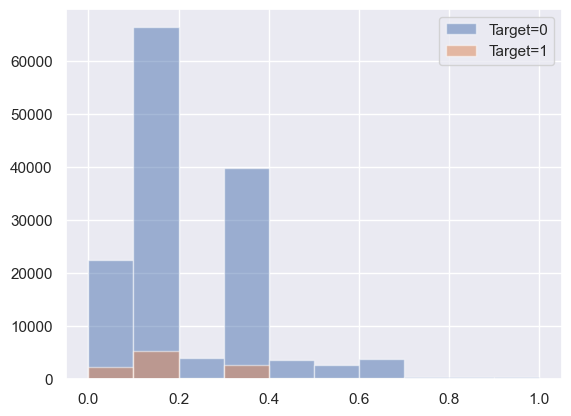

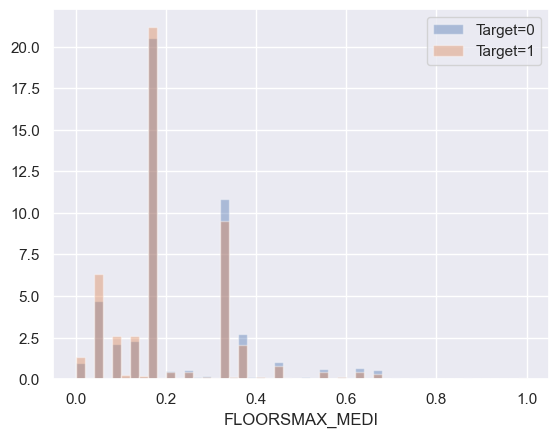

------------------------------------------------------------------------
Plot of TOTALAREA_MODE


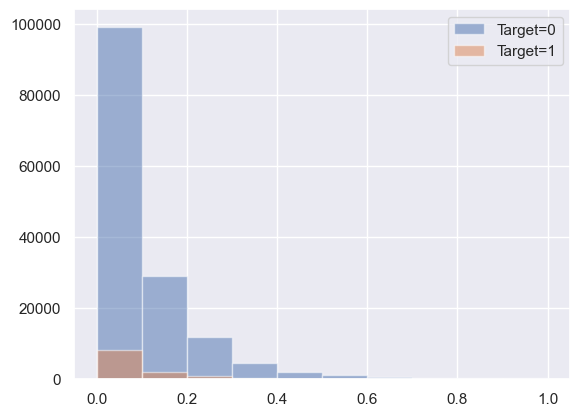

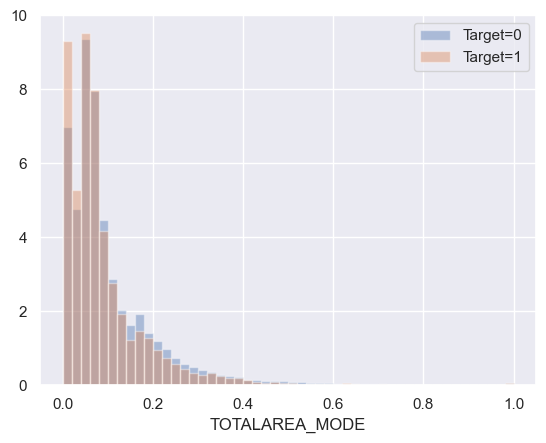

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


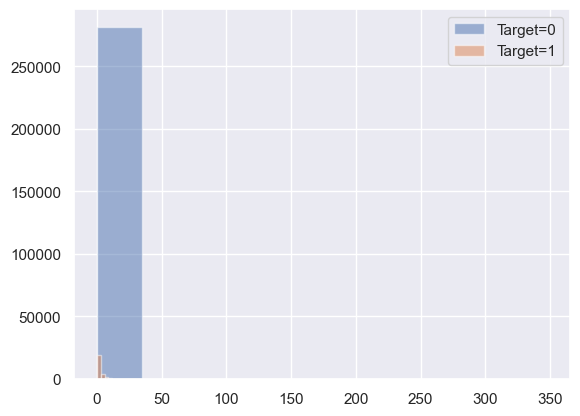

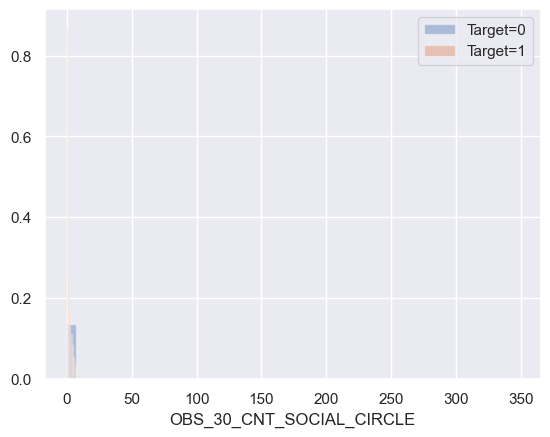

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


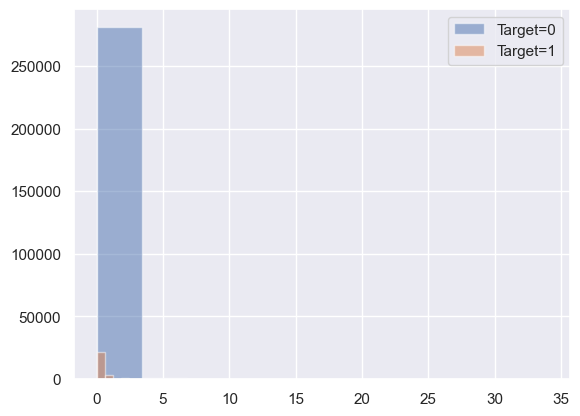

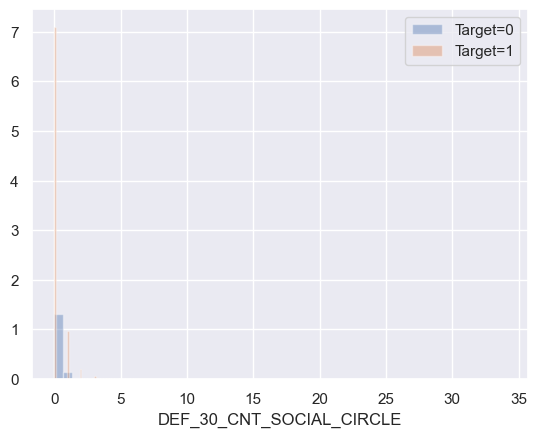

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


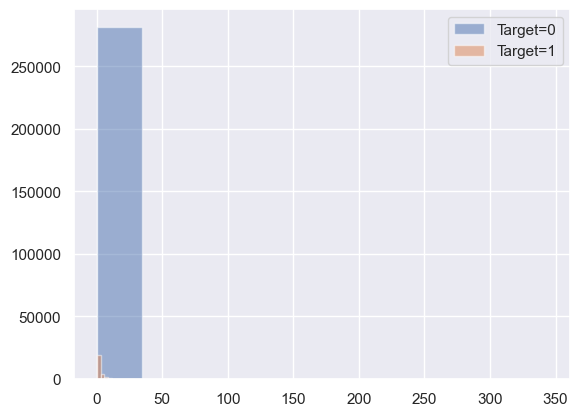

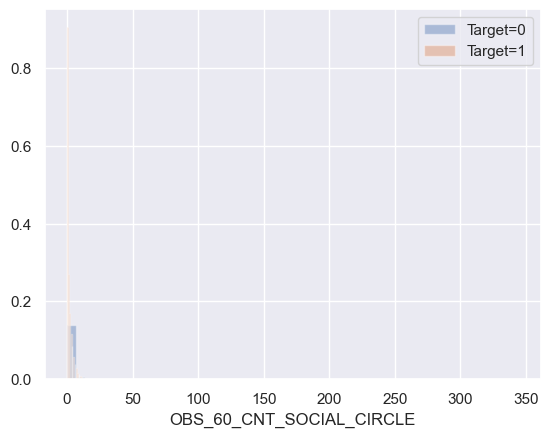

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


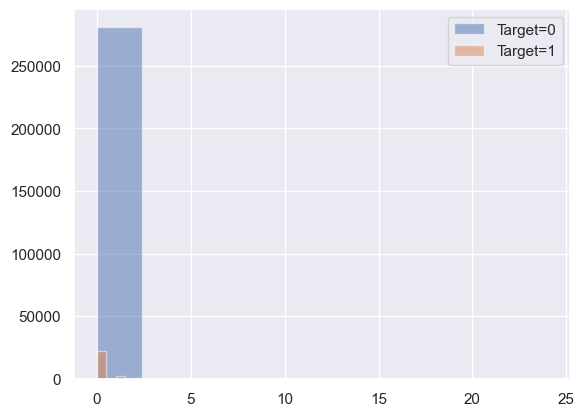

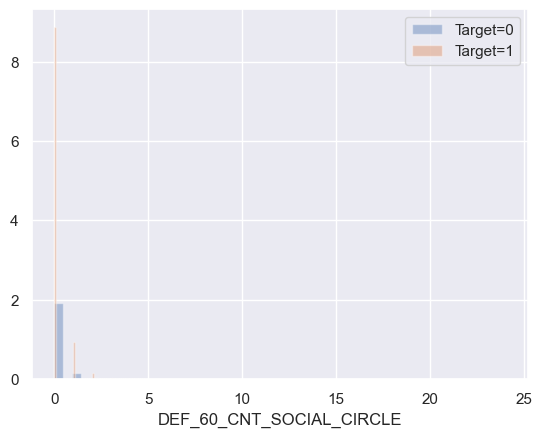

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


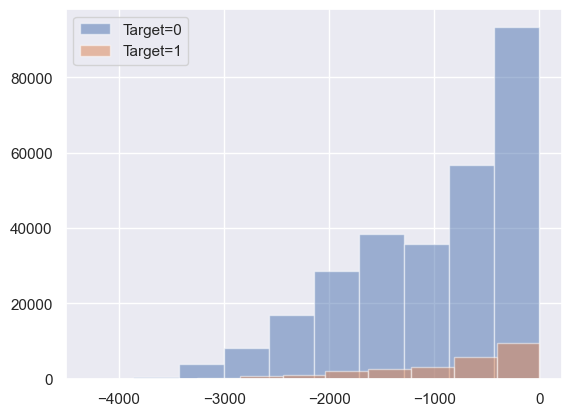

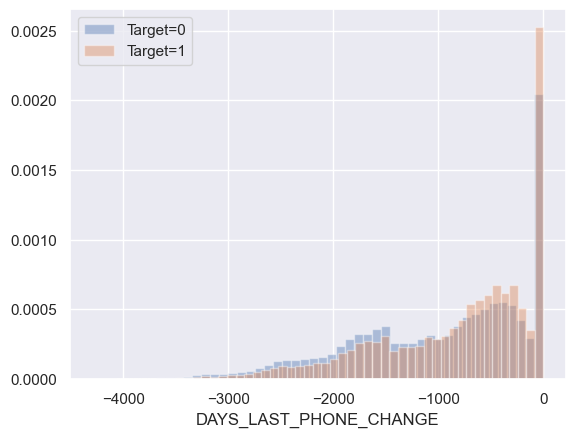

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


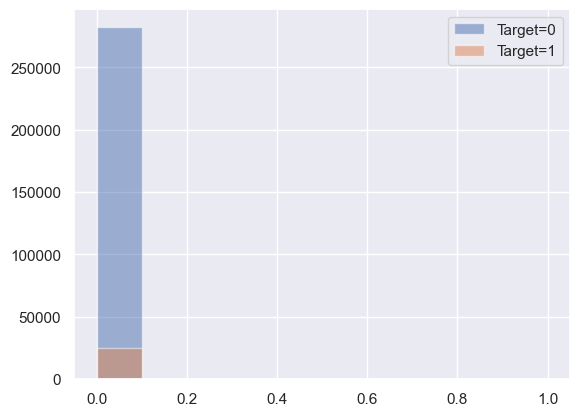

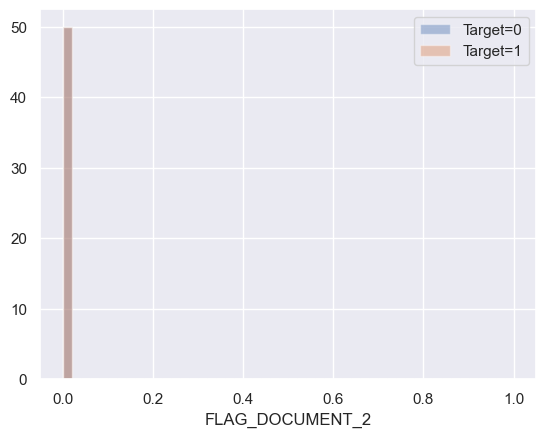

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


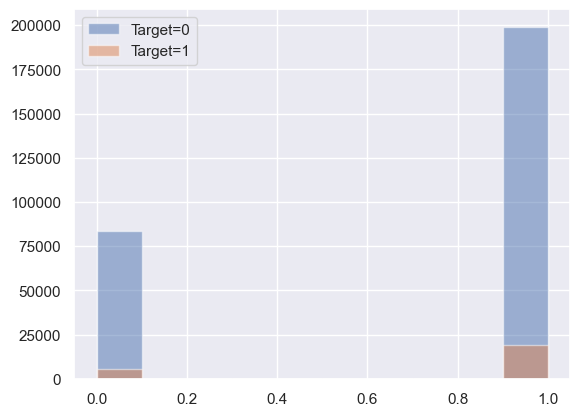

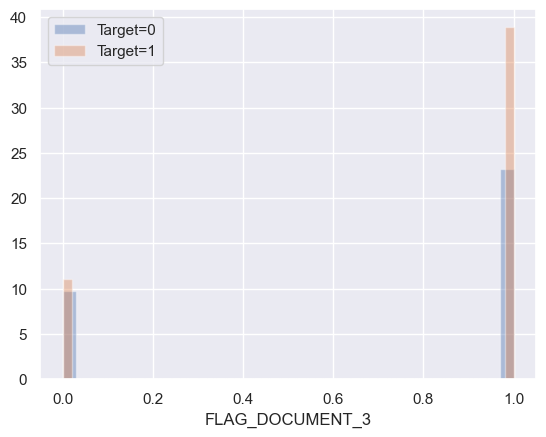

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


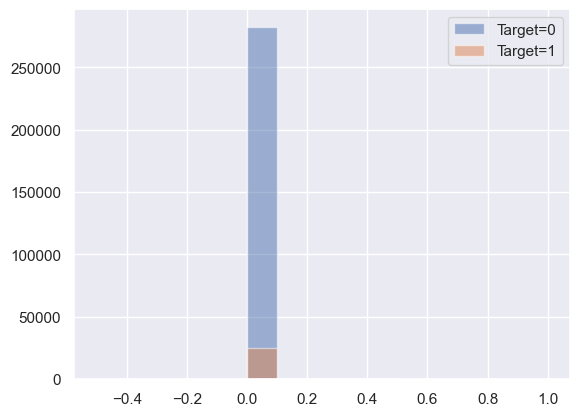

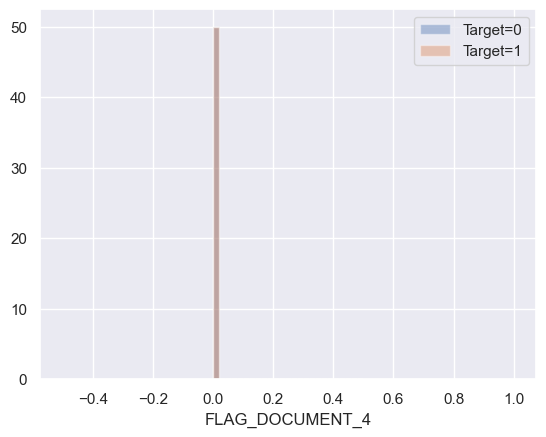

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


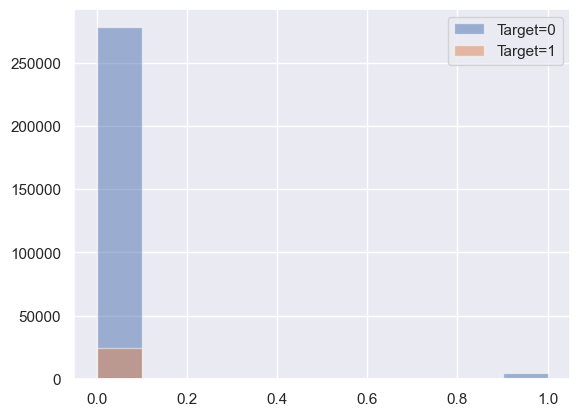

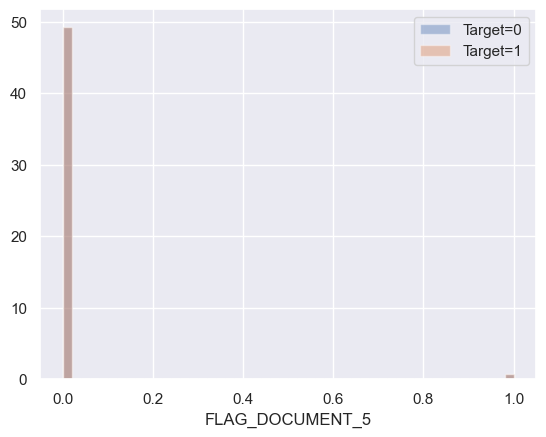

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


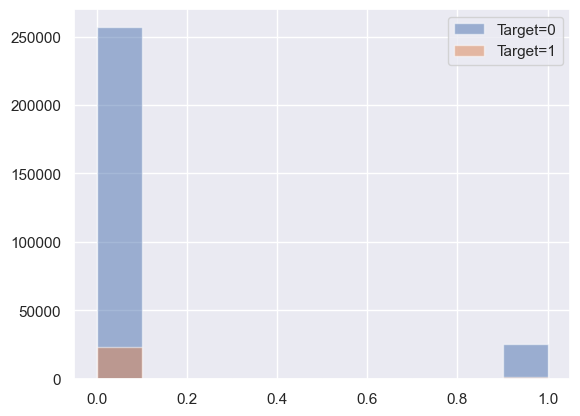

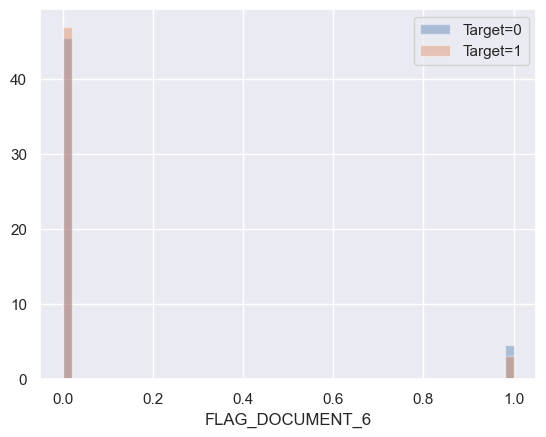

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


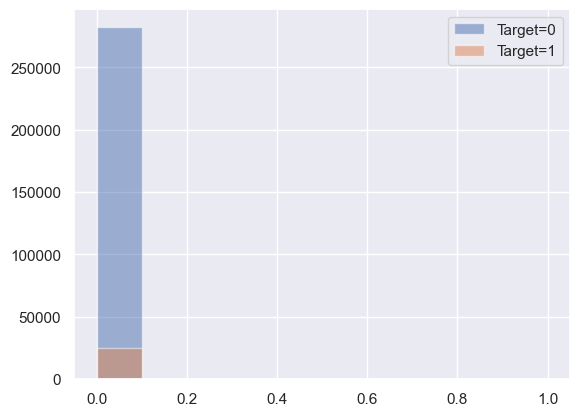

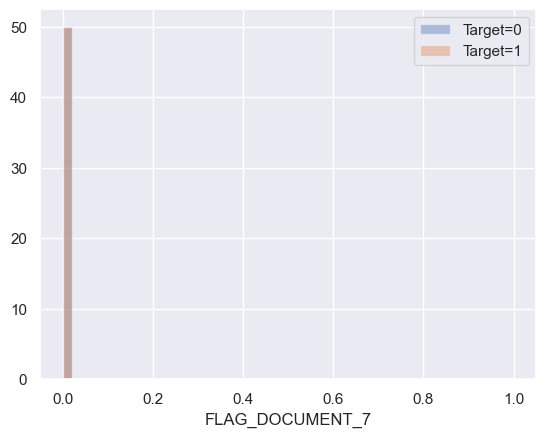

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


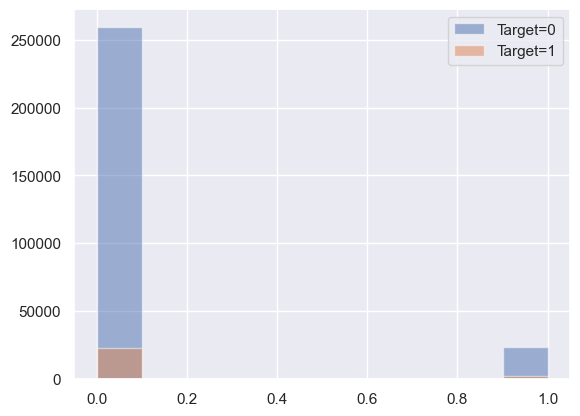

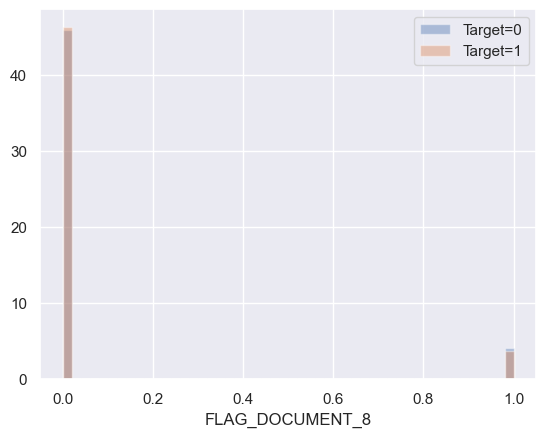

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


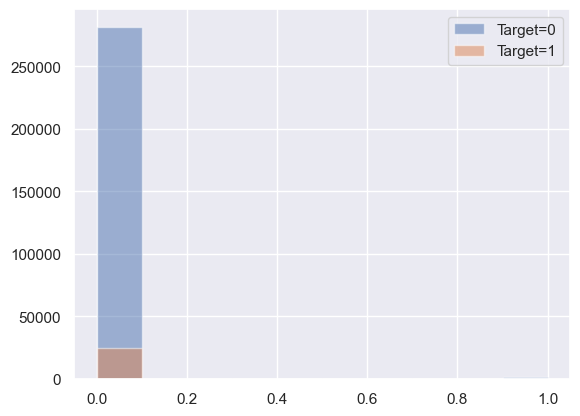

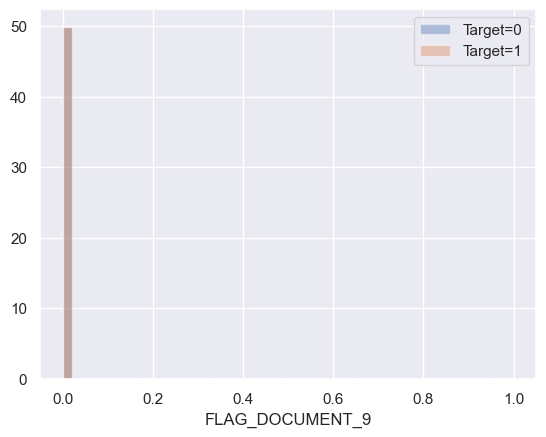

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


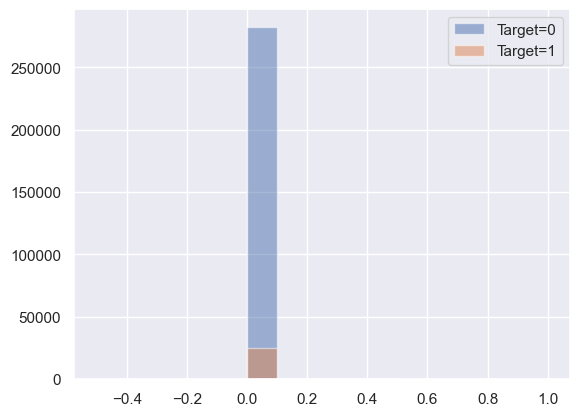

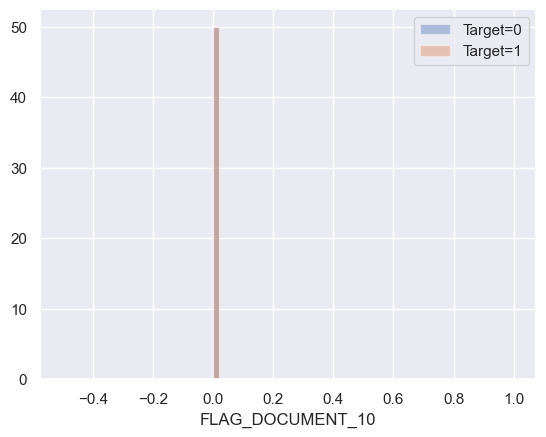

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


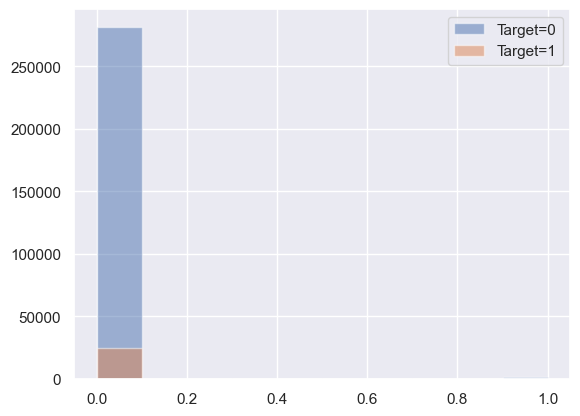

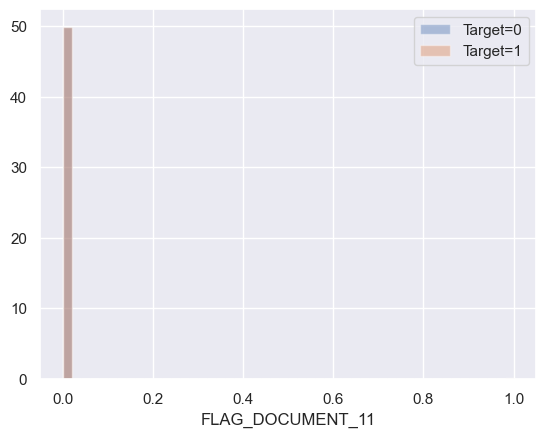

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


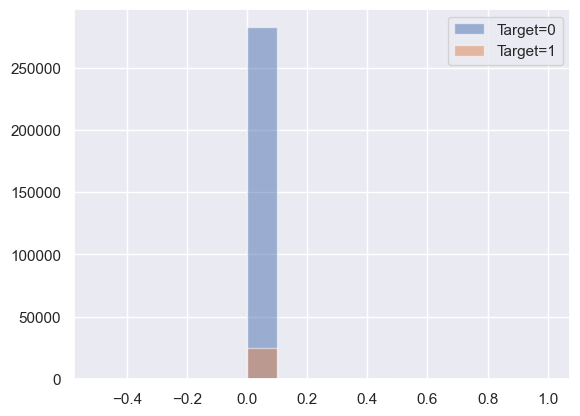

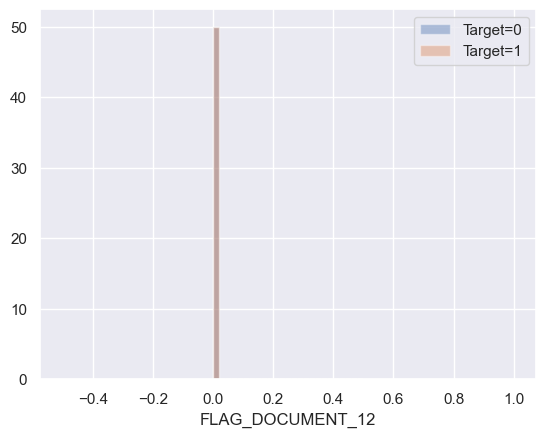

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


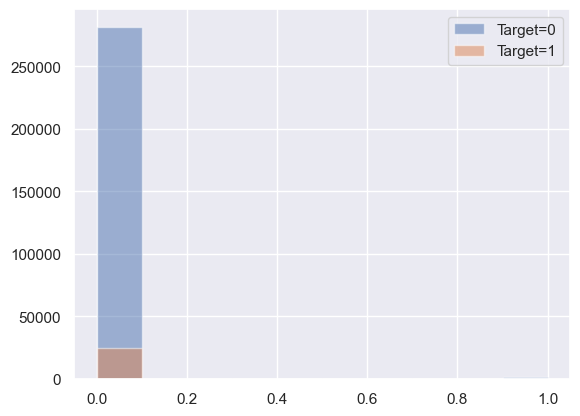

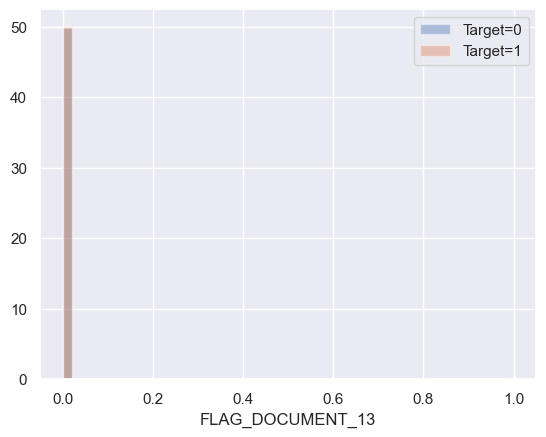

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


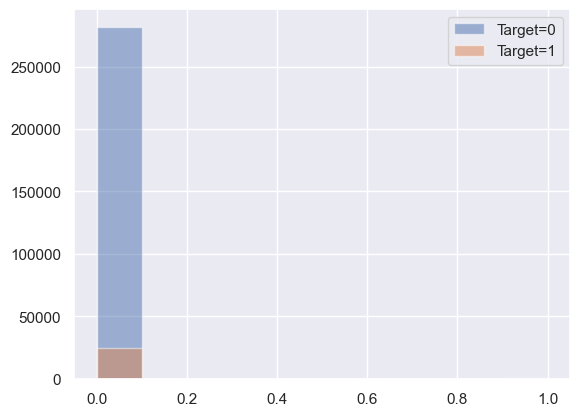

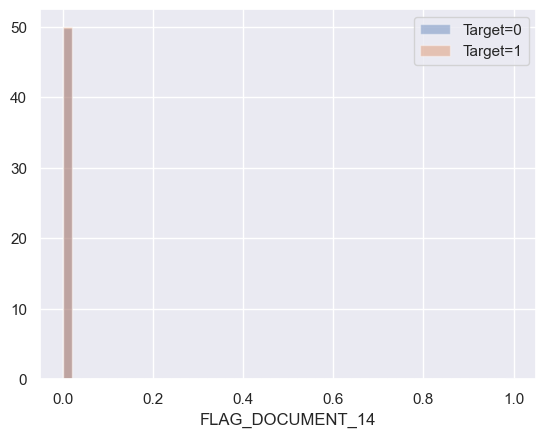

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


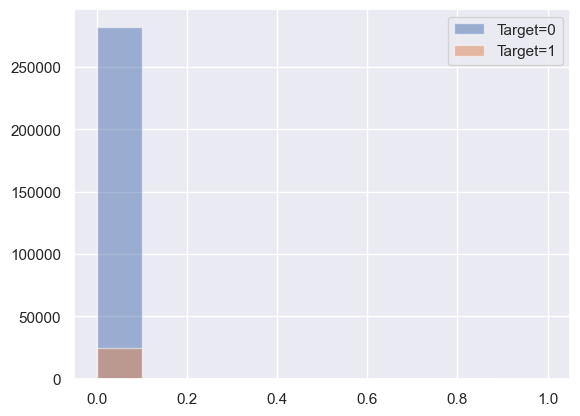

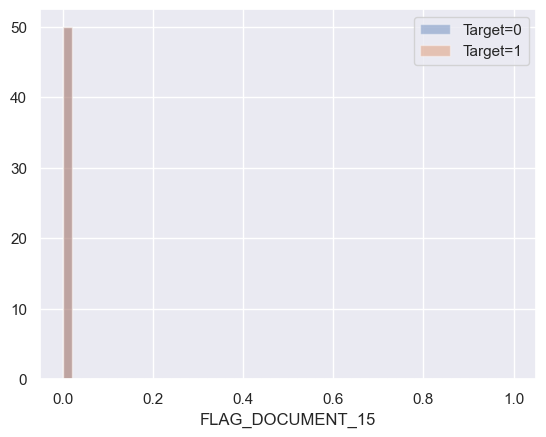

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


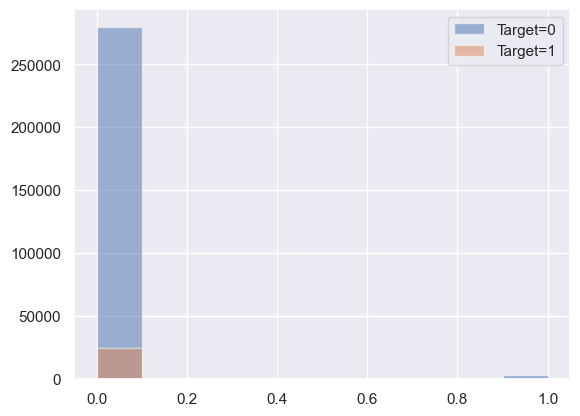

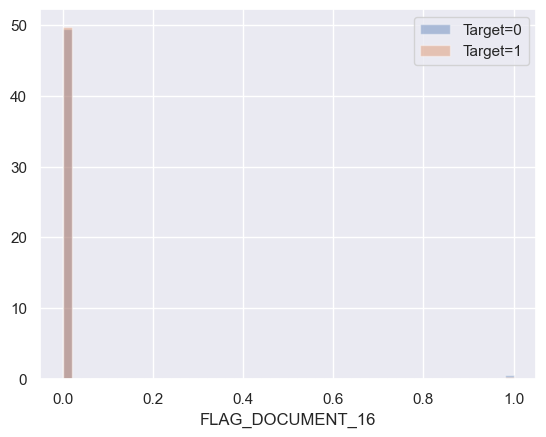

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


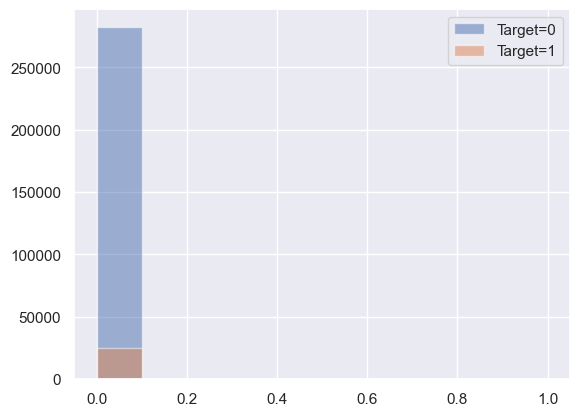

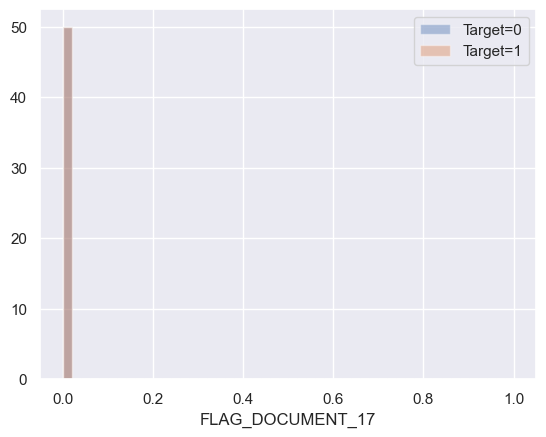

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


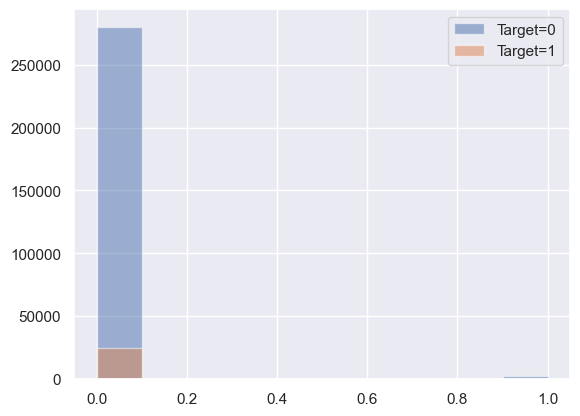

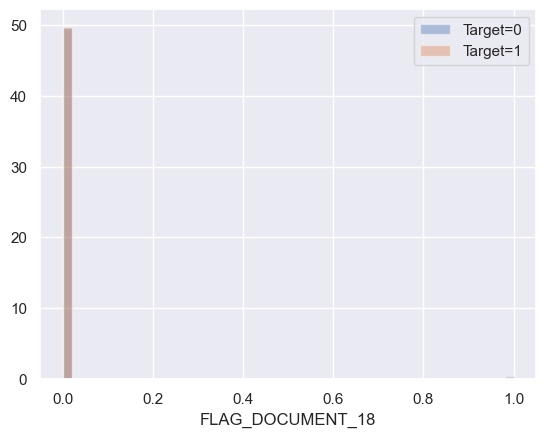

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


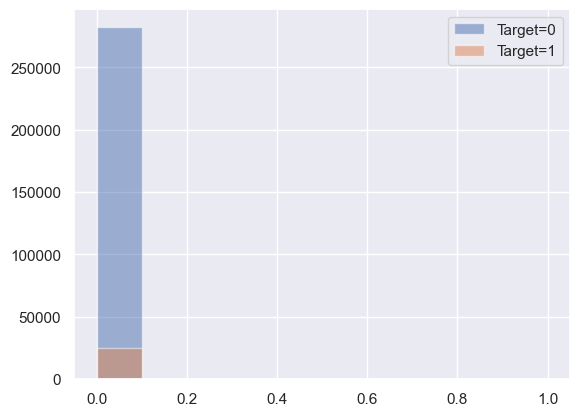

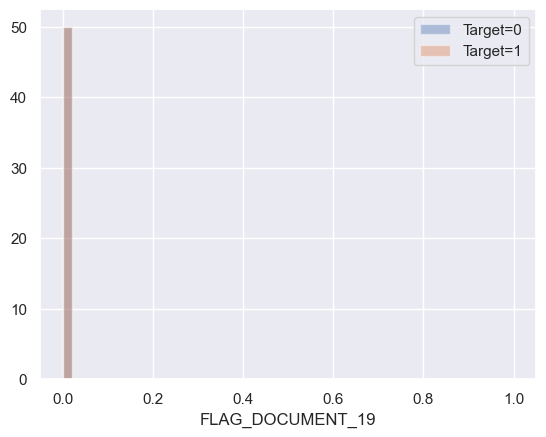

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


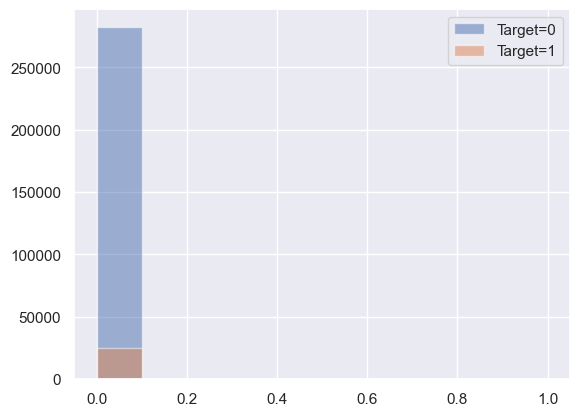

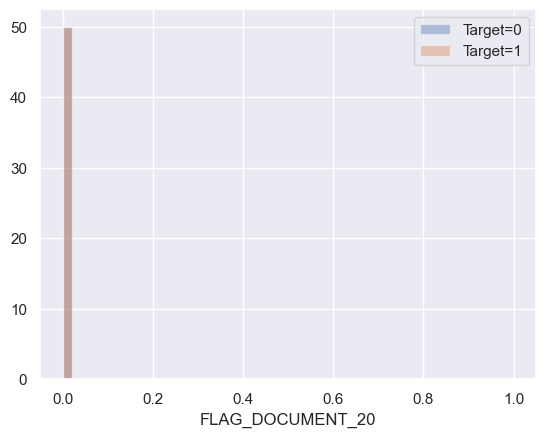

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


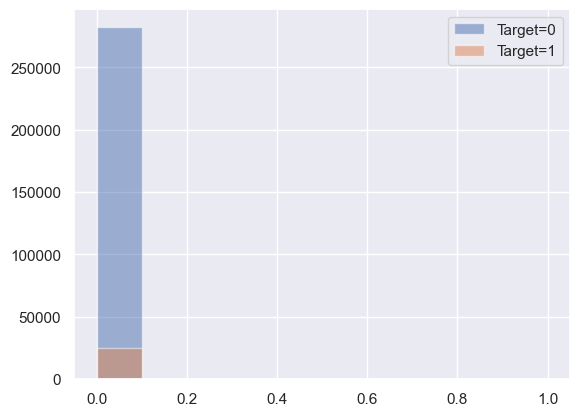

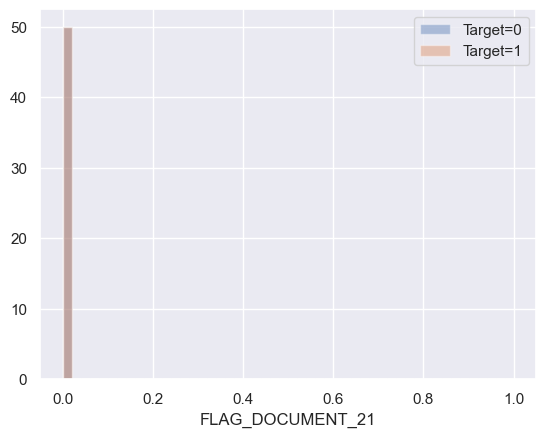

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


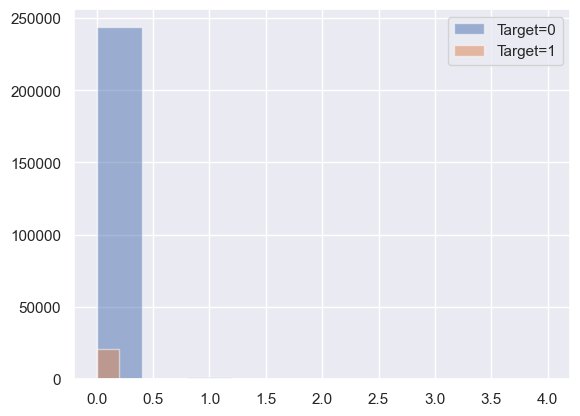

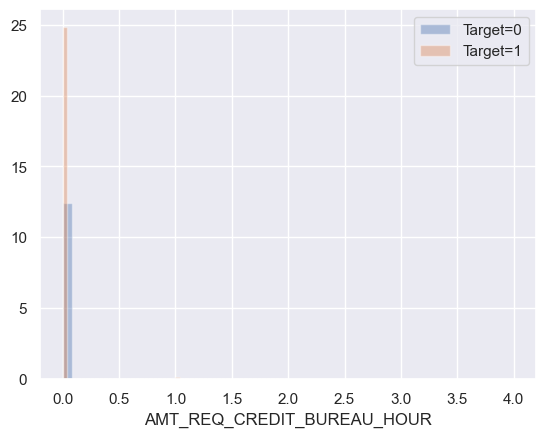

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


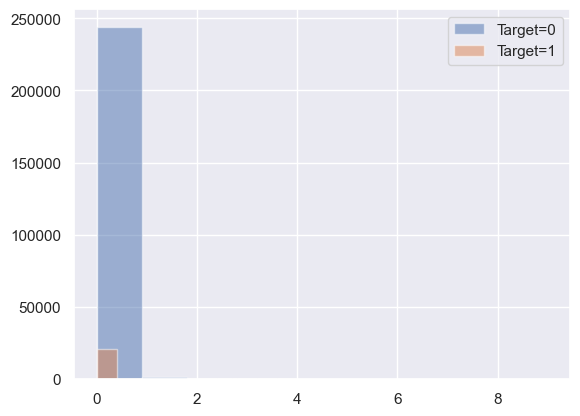

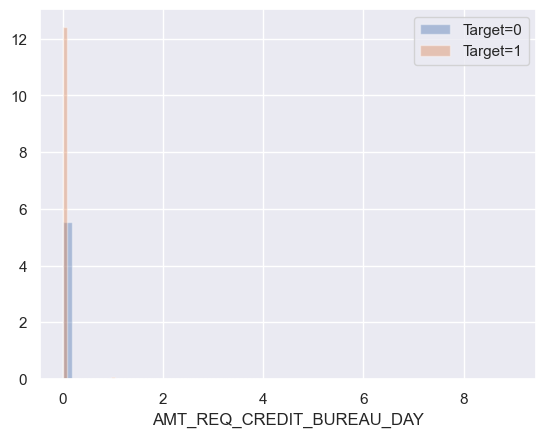

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


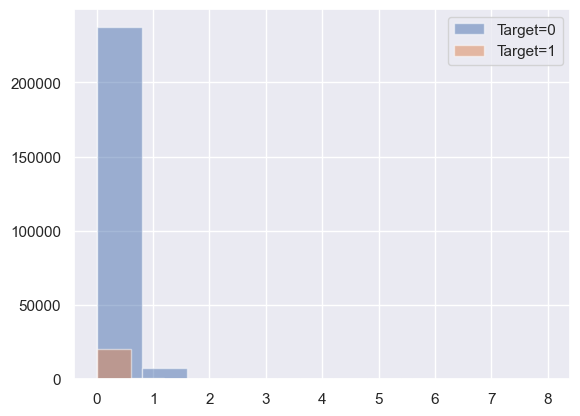

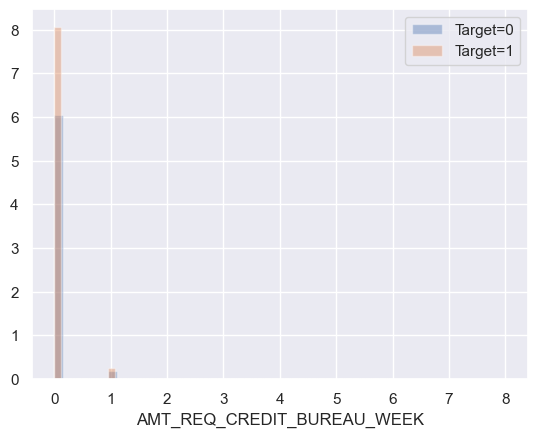

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


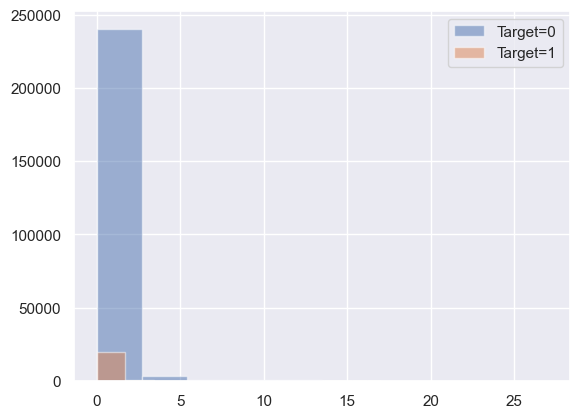

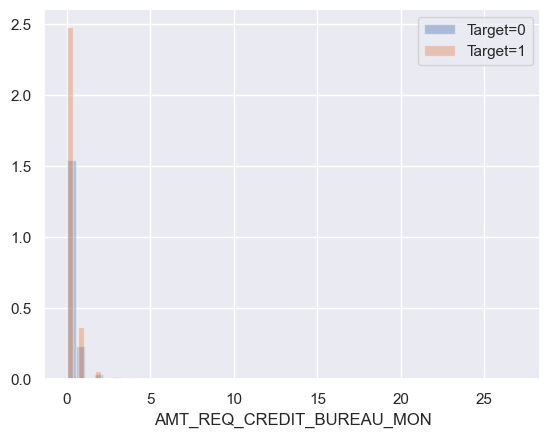

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


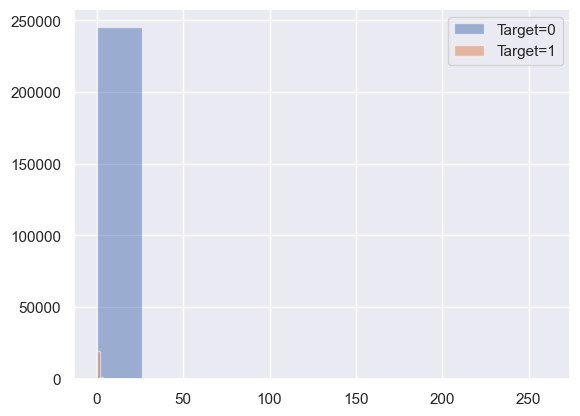

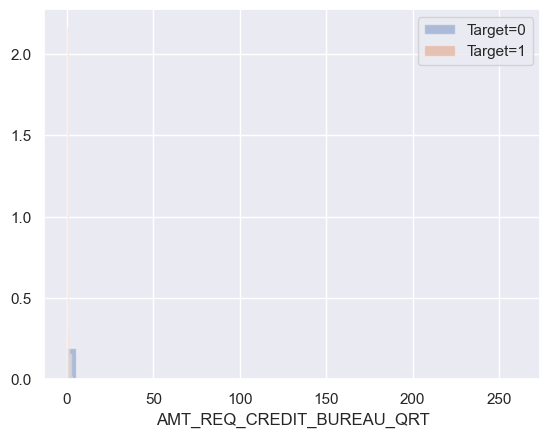

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


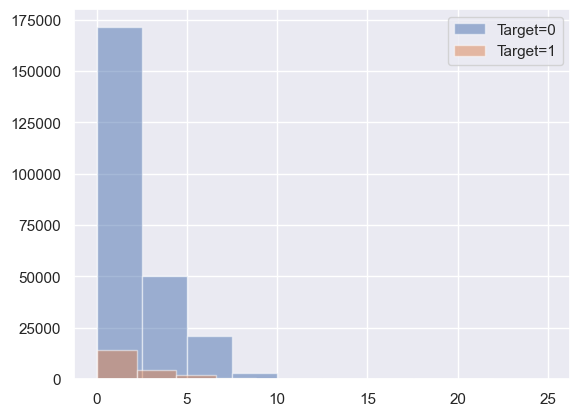

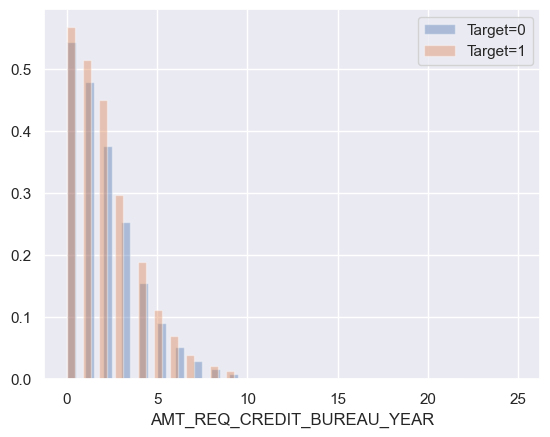

------------------------------------------------------------------------


In [35]:
for column in train_categorical:
    
    title = "Plot of " + column
    print(title)


    plt.hist(train_0[column], alpha=0.5, label='Target=0')  
    plt.hist(train_1[column], alpha=0.5, label='Target=1')  
    plt.legend()  
    plt.show()  


    sns.distplot(train_0[column].dropna(), label='Target=0', kde=False, norm_hist=True) 
    sns.distplot(train_1[column].dropna(), label='Target=1', kde=False, norm_hist=True)  
    plt.legend()  
    plt.show()  

    print("------------------------------------------------------------------------")

The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are:
- AMT_CREDIT:
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

## Reading previous application

In [36]:

previous_application = pd.read_csv('previous_application.csv')

previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [37]:
previous_application.shape

(1670214, 37)

## There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times

In [38]:
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2418762    1
2030495    1
2802425    1
2523466    1
2819243    1
          ..
1715995    1
2579447    1
2367563    1
1656711    1
2315218    1
Name: count, Length: 1670214, dtype: int64

In [39]:
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
353874     1
123460     1
364512     1
195648     1
168750     1
Name: count, Length: 338857, dtype: int64


From the information provided, the shape of the previous application dataset is (1670214, 37), and the count of unique SK_ID_PREV entries matches this, standing at 1670214. However, the count of unique SK_ID_CURR entries is significantly lower, at 338857. This discrepancy indicates that the SK_ID_PREV values contain duplicates, suggesting that multiple entries pertain to the same current application ID (SK_ID_CURR).

## Merging DataFrames: Train and Previous Application Based on SK_ID_PREV
After merging both dataframes using the SK_ID_PREV column as the key, the resulting dataframe will also contain duplicate SK_ID_PREV values.
This duplication is not an issue, as our objective is to explore patterns, including cases where a lender has previously taken out a loan more than once.
Retaining these duplicates allows us to analyze the data comprehensively and identify any recurring trends or behaviors among borrowers with multiple loan histories.

In [40]:
previous_train = train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [41]:
previous_train.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 118 columns]

In [42]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

## The merged dataframe also has multiple values for SK_ID_CURR

In [43]:
previous_application['SK_ID_CURR'].value_counts().head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

## Segregating the dataset on Target = 0 and Target = 1

In [44]:
train_0 = train.loc[train['TARGET'] == '0']

train_1 = train.loc[train['TARGET'] == '1']

In [45]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == '0']

ptrain_1 = previous_train.loc[previous_train['TARGET'] == '1']

## Plotting data


In [46]:
def plotting(column, hue):

    col = column
    hue = hue


    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Distribution of values for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0'] = ((train_0[col].value_counts()) / len(train_0))
    df['1'] = ((train_1[col].value_counts()) / len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Distribution of values by target category')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=0')


    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax=ax4)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=1')


    fig.tight_layout()


    plt.show()

# Task 7 - Bivariate Analysis

### Plotting NAME_EDUCATION_TYPE

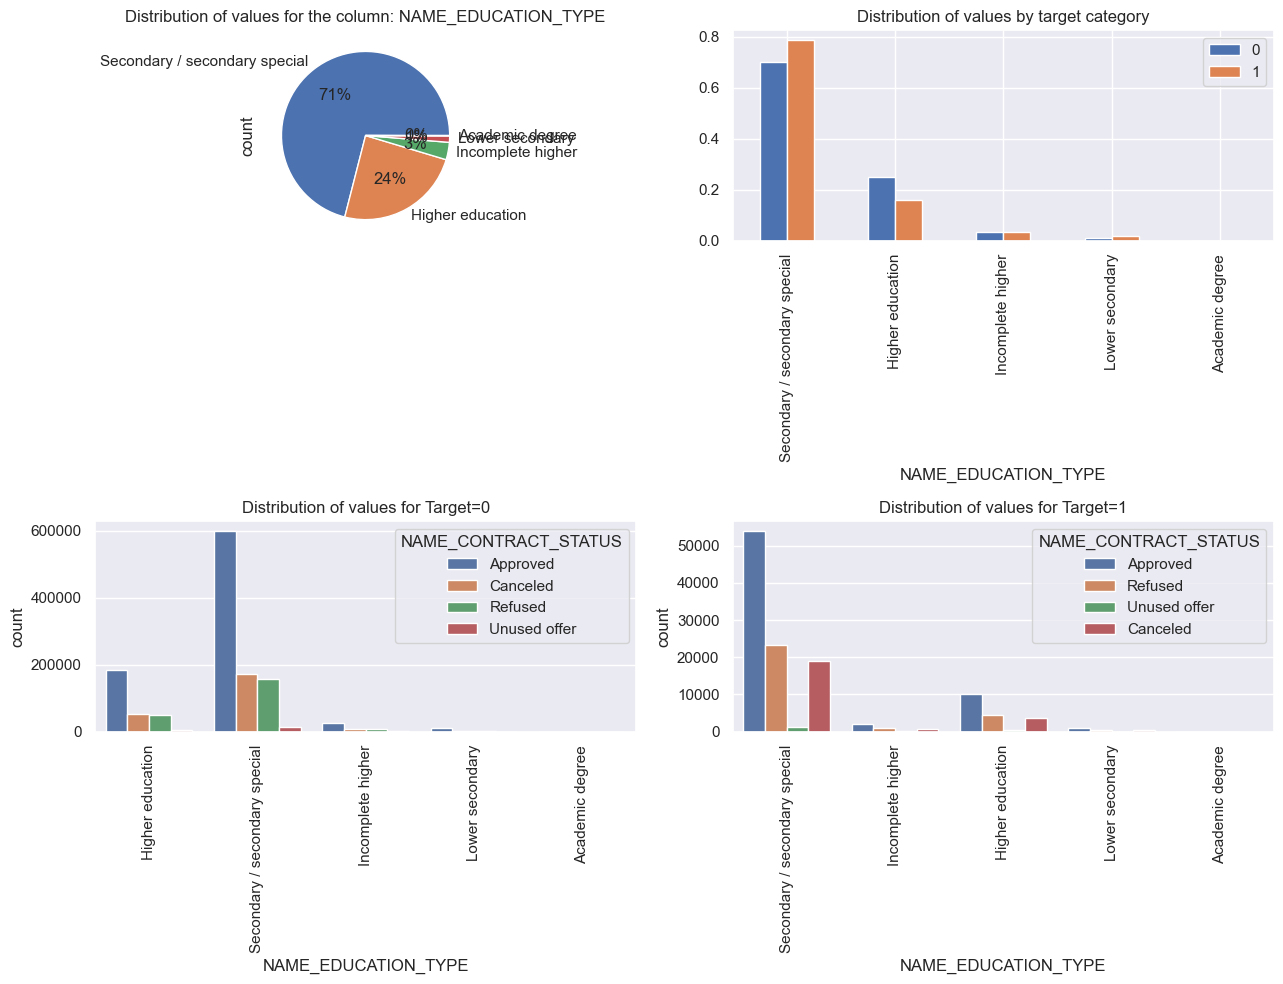

In [47]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

Observation: People tend to make more loan for 'Secondary special' and their loan is also approved.

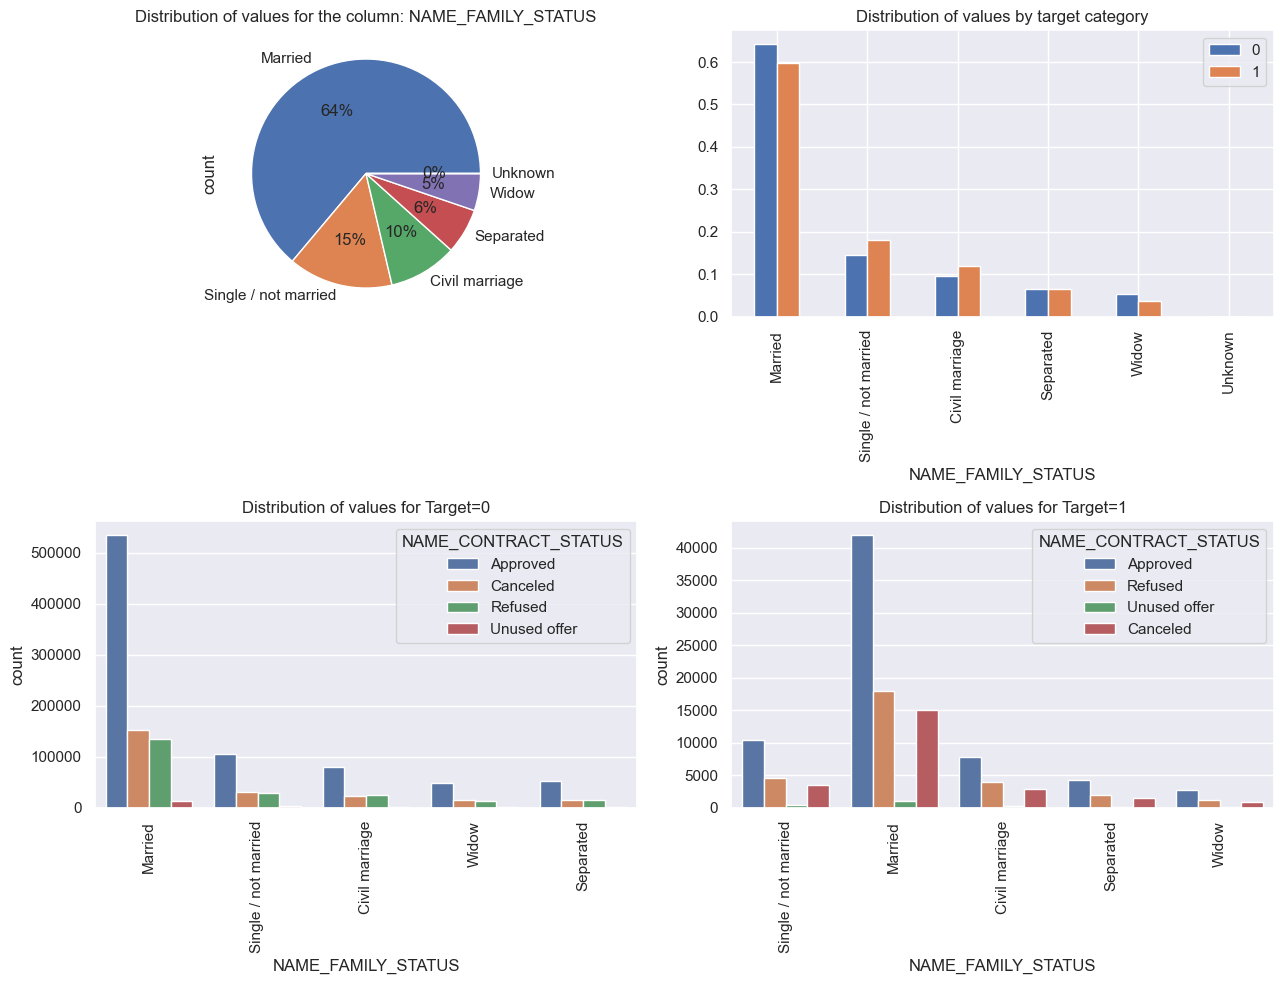

In [48]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

Observation: Married people are more likely to pay back their loans on time compared to single people, as indicated by the differences in loan approval statuses.

## Conclusion

Through the series of tasks performed in this practice session, we gained valuable insights into the loan applicant dataset. We successfully identified missing values, explored the distribution of variables, analyzed outliers, and examined relationships between different attributes.

This analysis provides a foundational understanding of the dataset and its potential implications for loan management and risk assessment. Moving forward, these insights can guide decision-making processes, such as developing predictive models or refining loan approval criteria, ultimately enhancing the effectiveness of lending practices and minimizing default risks